# ML Model for Auto Insurance Industry

## Importing Required Libraries

In [63]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Data Exploration
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [65]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
sns.set(color_codes=True, font_scale=1)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# Scaling and Train Test Split
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
# Resampling Modules from sklearn
from sklearn.datasets import make_classification
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [68]:
# Machine Learning Models and Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [69]:
# To calculate the performace of the models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [70]:
# Use this when running from Google Colab
train = pd.read_csv('train(1).csv')

train.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   
1              0              0              0              0          0   
2              0              0              0              0          0   
3              0              0              0              0          0   
4              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2   0.718070             10              1             -1   
1        0.4   0.766078             11              1             -1   
2        0.0  -1.000000              7              1             -1   
3        0.2   0.580948              7              1              0   
4        0.6   0.840759             11              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   
1              0             -1             11              1              1   
2              0             -1             14              1              1   
3              0              1             11              1              1   
4              0             -1             14              1              1   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2   0.400000   
1              2              1             19          3   0.316228   
2              2              1             60          1   0.316228   
3              3              1            104          1   0.374166   
4              2              1             82          3   0.316070   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679   0.370810   3.605551         0.6         0.5         0.2   
1   0.618817   0.388716   2.449490         0.3         0.1         0.3   
2   0.641586   0.347275   3.316625         0.5         0.7         0.1   
3   0.542949   0.294958   2.000000         0.6         0.9         0.1   
4   0.565832   0.365103   2.000000         0.4         0.6         0.0   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   
1           2           1           9           5           8           1   
2           2           2           9           1           8           2   
3           2           4           7           1           8           4   
4           2           2           6   

## Exploratory Data Analysis

In [71]:
# Dimensionality of the DataFrame
print("Dimensionality of Dataset:")
print("- Number of Rows:\t{}".format(len(train.axes[0])))
print("- Number of Columns:\t{}".format(len(train.axes[1])))

Dimensionality of Dataset:
- Number of Rows:	595212
- Number of Columns:	59


In [72]:
# Checking for number of missing values in each column
train.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [73]:
print('Summary of the basic information about the DataFrame and its data:')
print('------------------------------------------------------------------\n')
print(train.info())

Summary of the basic information about the DataFrame and its data:
------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin

In [74]:
# Check and Drop for duplicates
train.drop_duplicates()
train.shape

(595212, 59)

### Question 1 - Important Inferences
<ol>
<li> Dimensionality of the dataset
<ul>
<li> 59 - Columns
<li> 595212 - Rows with no duplicate rows present in the dataset
</ul>
<li> With the info() method we see that
<ul>
<li> The data type is either <b> integer or float </b>
<li> No null values are present: because missing values have been replaced by -1.
</ul>
<li> Feature Classification
<ul>
<li> Binary - has 0 or 1
<li> Categorical/Nominal - has two or more categories, but no intrinsic ordering to the categories
<li> Ordinal - similar to Categorical but Ordinal has clear ordering of the variables
</ul>
<li> No duplicate values are found in the dataset
</ol>

### Question 2 - Data Imbalance or not?
<ul>
<li> To determine if the dataset is imbalanced, we will take look at the count of unique values within Target column
<li> The count of
<ul>
<li> Unclaimed Insurance, represented by 0 is 573518
<li> Claimed Insurance, represented by 1 is 21694
</ul>
<li> With the the above data is very apprent that the <b> dataset is heavily imbalanced
</ul>

In [75]:
# Unique values in Target columns
print('Unique values in the Target Column is: ', train.target.unique())

Unique values in the Target Column is:  [0 1]


In [76]:
print('Dimension of the Target Column is:', train.target.shape)

Dimension of the Target Column is: (595212,)


In [77]:
# object containing counts of unique values
unique_df = train.target.value_counts().rename_axis(
    'Unique Values').to_frame('Counts')

unique_df

Counts
Unique Values        
0              573518
1               21694

In [78]:
tar_count = train.target.value_counts()
tar_count0 = tar_count[0] / train.shape[0] * 100
tar_count1 = tar_count[1] / train.shape[0] * 100
print('Target Column Data Distribution for (Zero & One):', tar_count0, tar_count1)

Target Column Data Distribution for (Zero & One): 96.3552482140817 3.6447517859182947


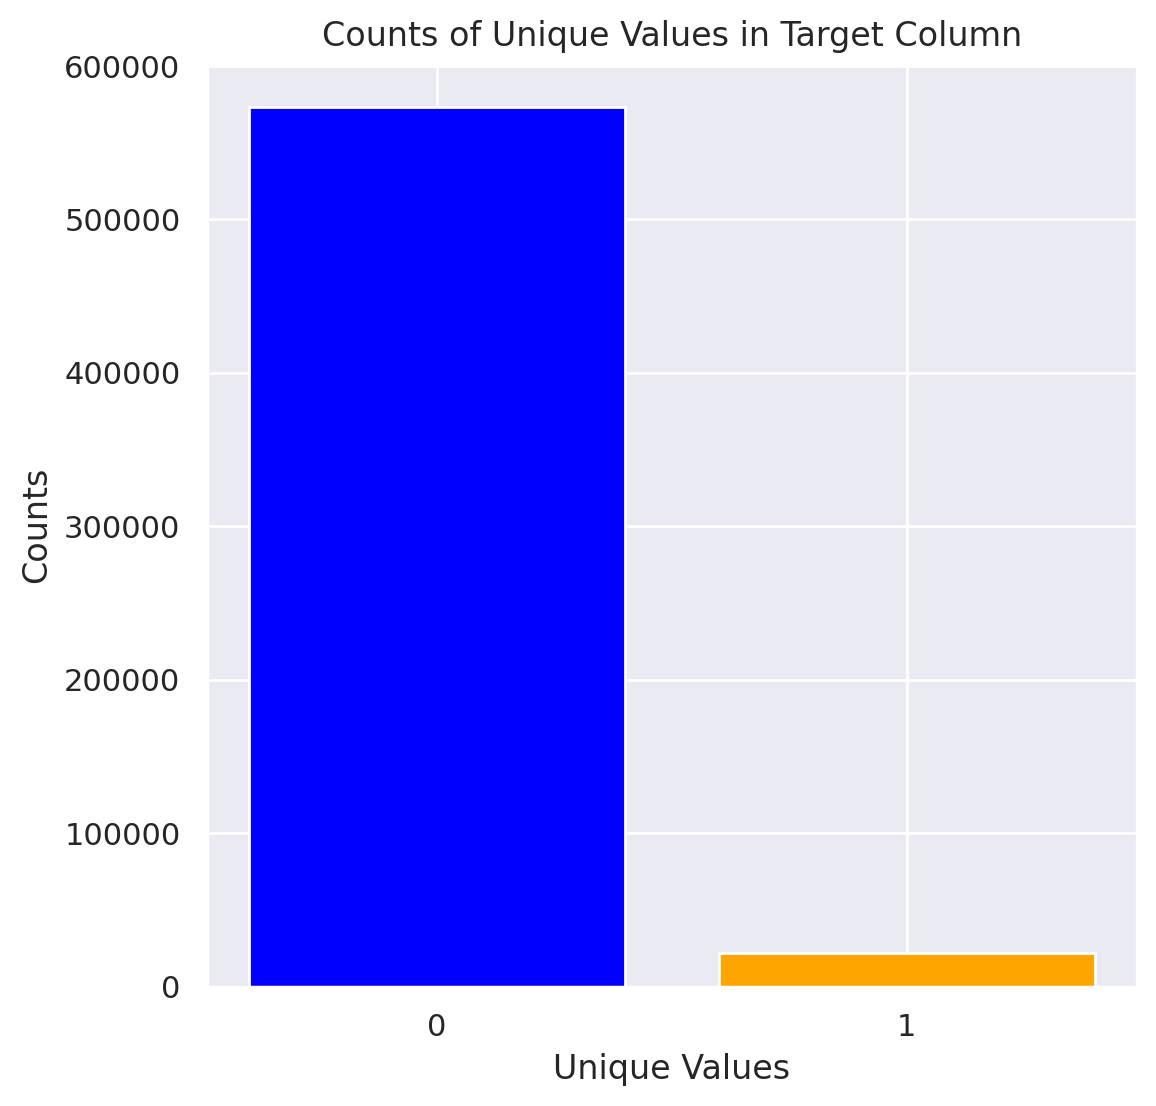

In [79]:
plt.figure(figsize=(6, 6))
plt.bar(unique_df.index, unique_df['Counts'], color=['blue', 'orange'])
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in Target Column')
plt.xticks(unique_df.index, ['0', '1'])  # Set x-tick labels for clarity
plt.show()

In [80]:
data = []

for i in train.columns:

    # Defining the feature type
    if 'bin' in i:
        ftype = 'binary'

    elif 'cat' in i:
        ftype = 'categorical'
        train[i] = train[i].astype(str)

    elif 'bin' not in i and train[i].dtype == float:
        ftype = 'interval'

    elif 'cat' not in i and train[i].dtype == float:
        ftype = 'interval'

    elif 'bin' not in i and train[i].dtype == int:
        ftype = 'ordinal'

    elif 'cat' not in i and train[i].dtype == int:
        ftype = 'ordinal'

    # Defining the data type
    dtype = train[i].dtype

    # Initialize keep to True for all variables except for id
    keep = True
    if i == 'id':
        keep = False

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'Col_Name': i,
        'Feature_Type': ftype,
        'Keep': keep,
        'Data_Type': dtype
    }
    data.append(f_dict)

train.replace({'-1': np.NaN, 'nan': np.nan}, inplace=True)

meta = pd.DataFrame(
    data, columns=['Col_Name', 'Feature_Type', 'Keep', 'Data_Type'])

meta.set_index('Col_Name', inplace=True)

meta.head()

Feature_Type   Keep Data_Type
Col_Name                                   
id                 ordinal  False     int64
target             ordinal   True     int64
ps_ind_01          ordinal   True     int64
ps_ind_02_cat  categorical   True    object
ps_ind_03          ordinal   True     int64

In [81]:
# Count of variables per Role and Feature Type
ft_cnt = pd.DataFrame({'Count': meta.groupby(['Feature_Type'])[
                      'Data_Type'].size()}).reset_index()
ft_cnt

Feature_Type  Count
0       binary     17
1  categorical     14
2     interval     10
3      ordinal     18

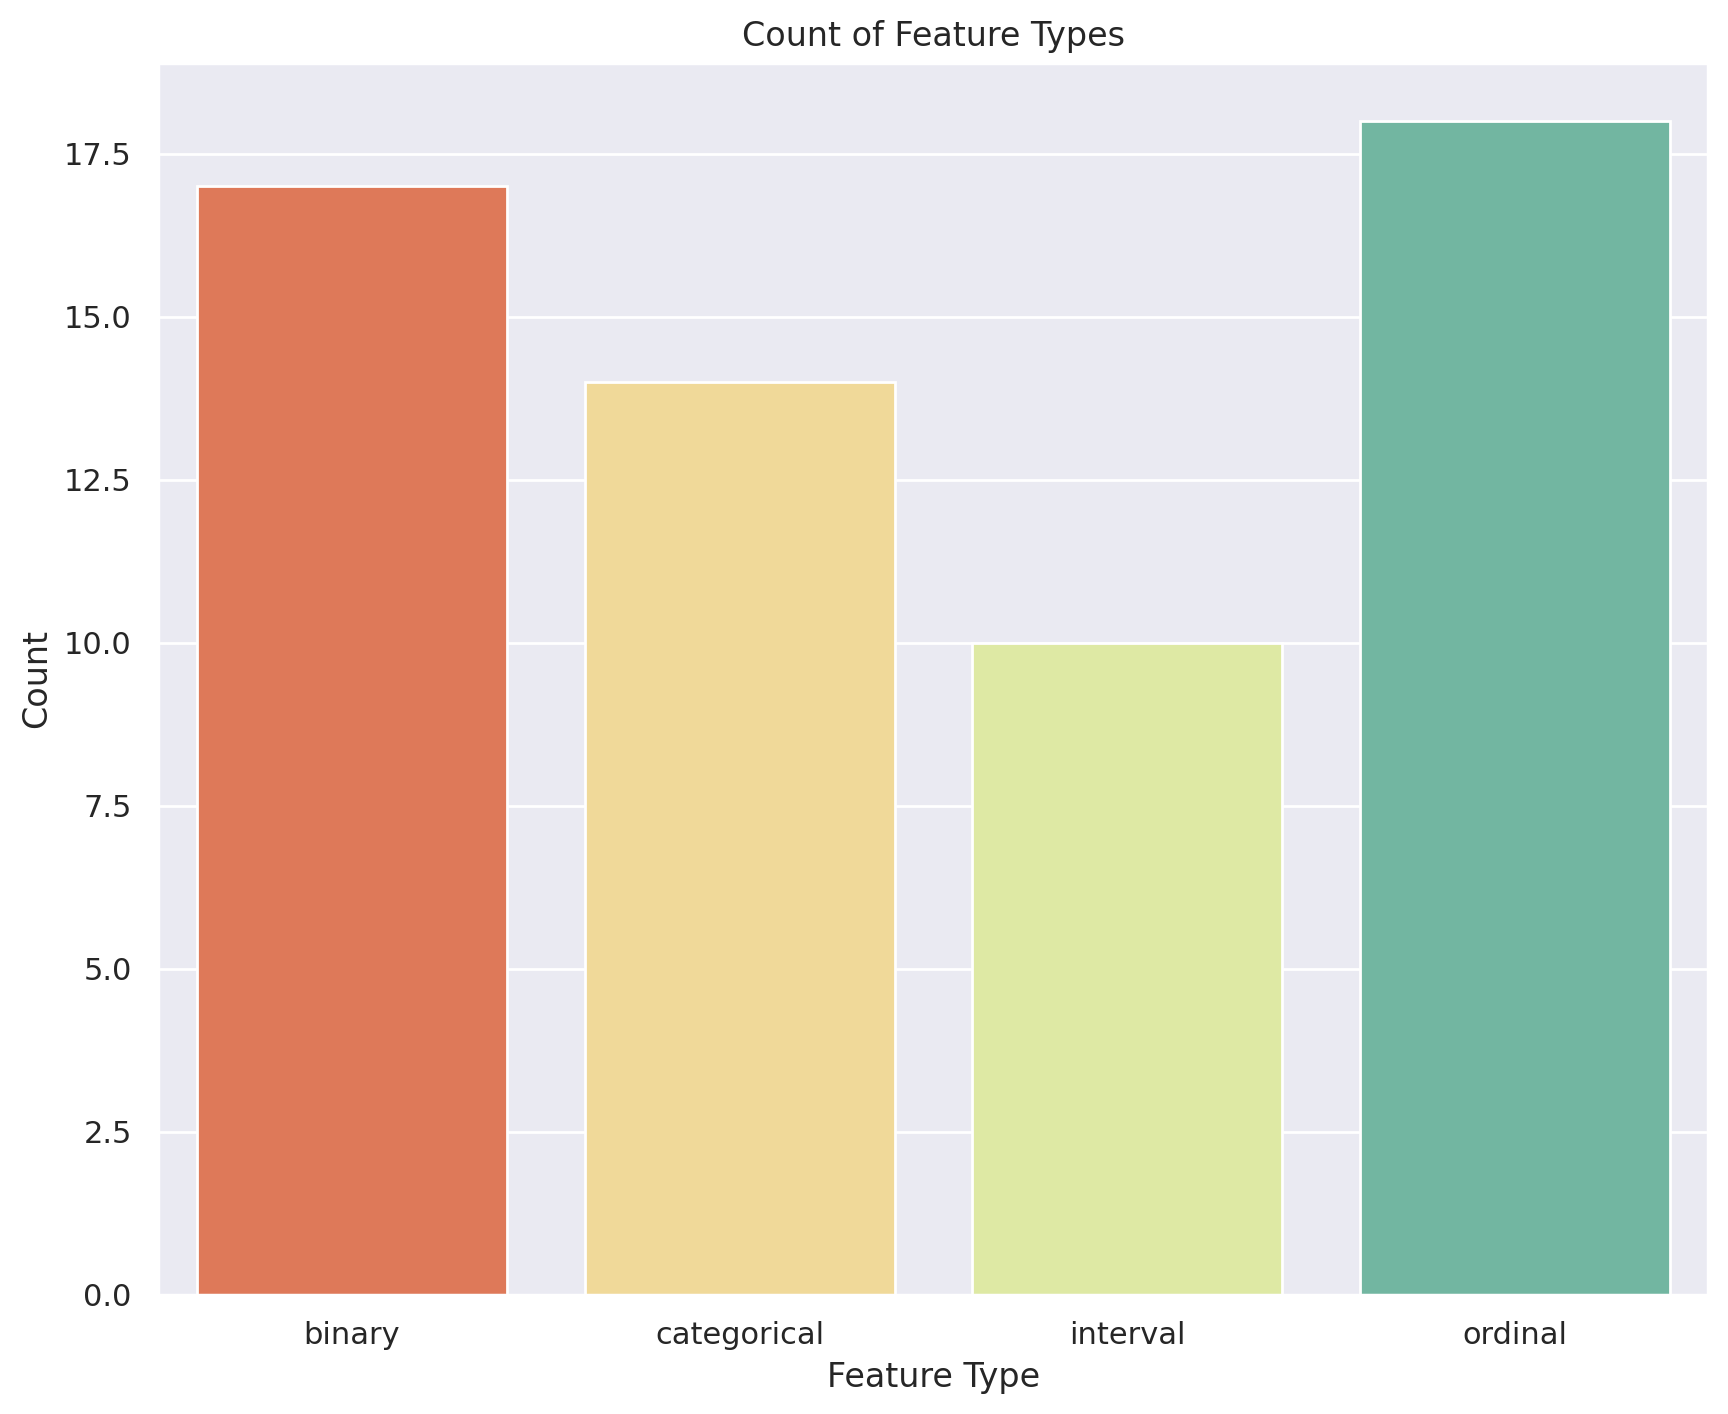

In [82]:
plt.figure(figsize=(10, 8))
plt.title('Count of Feature Types')
sns.barplot(x='Feature_Type', y='Count', data=ft_cnt, palette='Spectral')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.show()

### Question 3 - Number of Categorical Features
<ul>
<li> Based on the count of the Feature Type, we see that there are <b> 14 Categorical Features </b> in the dataset

### Question 4 - Number of Binary Features
<ul>
<li> Based on the count of the Feature Type, we see that there are <b> 17 Binary Features </b> in the dataset.

### Question 5 - Interval Variable Inferences
<ul>
<li> 28 Continous Features
<li> 10 Interval Features
<li> Data Type = <b> float64() </b> is Continous Features are Interval Variables

### Question 6 - Ordinal Variable Inferences
<ul>
<li> Ordinal Variables are similar to Categorical but in this case there is a clear ordering of the variables
<li> 28 Continous Features
<li> 18 Interval Features
<li> Data Type = <b> int64() </b> is Continuous Features are Ordinal Variables

### Question 7 - Binary Variable Inferences
<ul>
<li> Binary variables are discrete
<li> Binary Variables following <b> either/or </b> pattern, usually designated using <b> 0 and 1 </b>
<li> 17 Binary Variables in the dataset

### Exploratory Data Visualization
<ul>
<li> Now let's check which variable is more correlated with the claimed insurance (<b>target = 1</b>)
<li> This will be used to determine the features that do not have significantly different distributions between the two classes (i.e. will not contribute to our model)

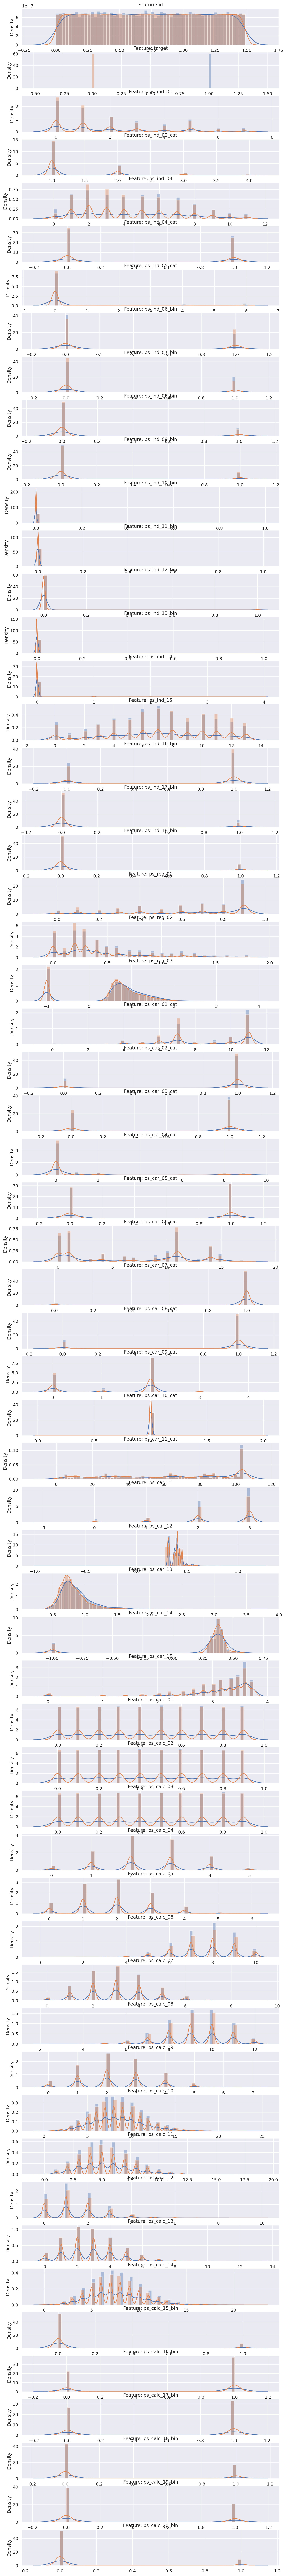

In [83]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12, 30*4))

features = train.iloc[:, 0:59].columns
gs = gridspec.GridSpec(59, 1)

for i, feature in enumerate(train[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[feature][train.target == 1], bins=60)
    sns.distplot(train[feature][train.target == 0], bins=60)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

<ul>
<li> Categorical variables and the proportion of customers with <b>target = 1</b>

<Figure size 700x700 with 0 Axes>

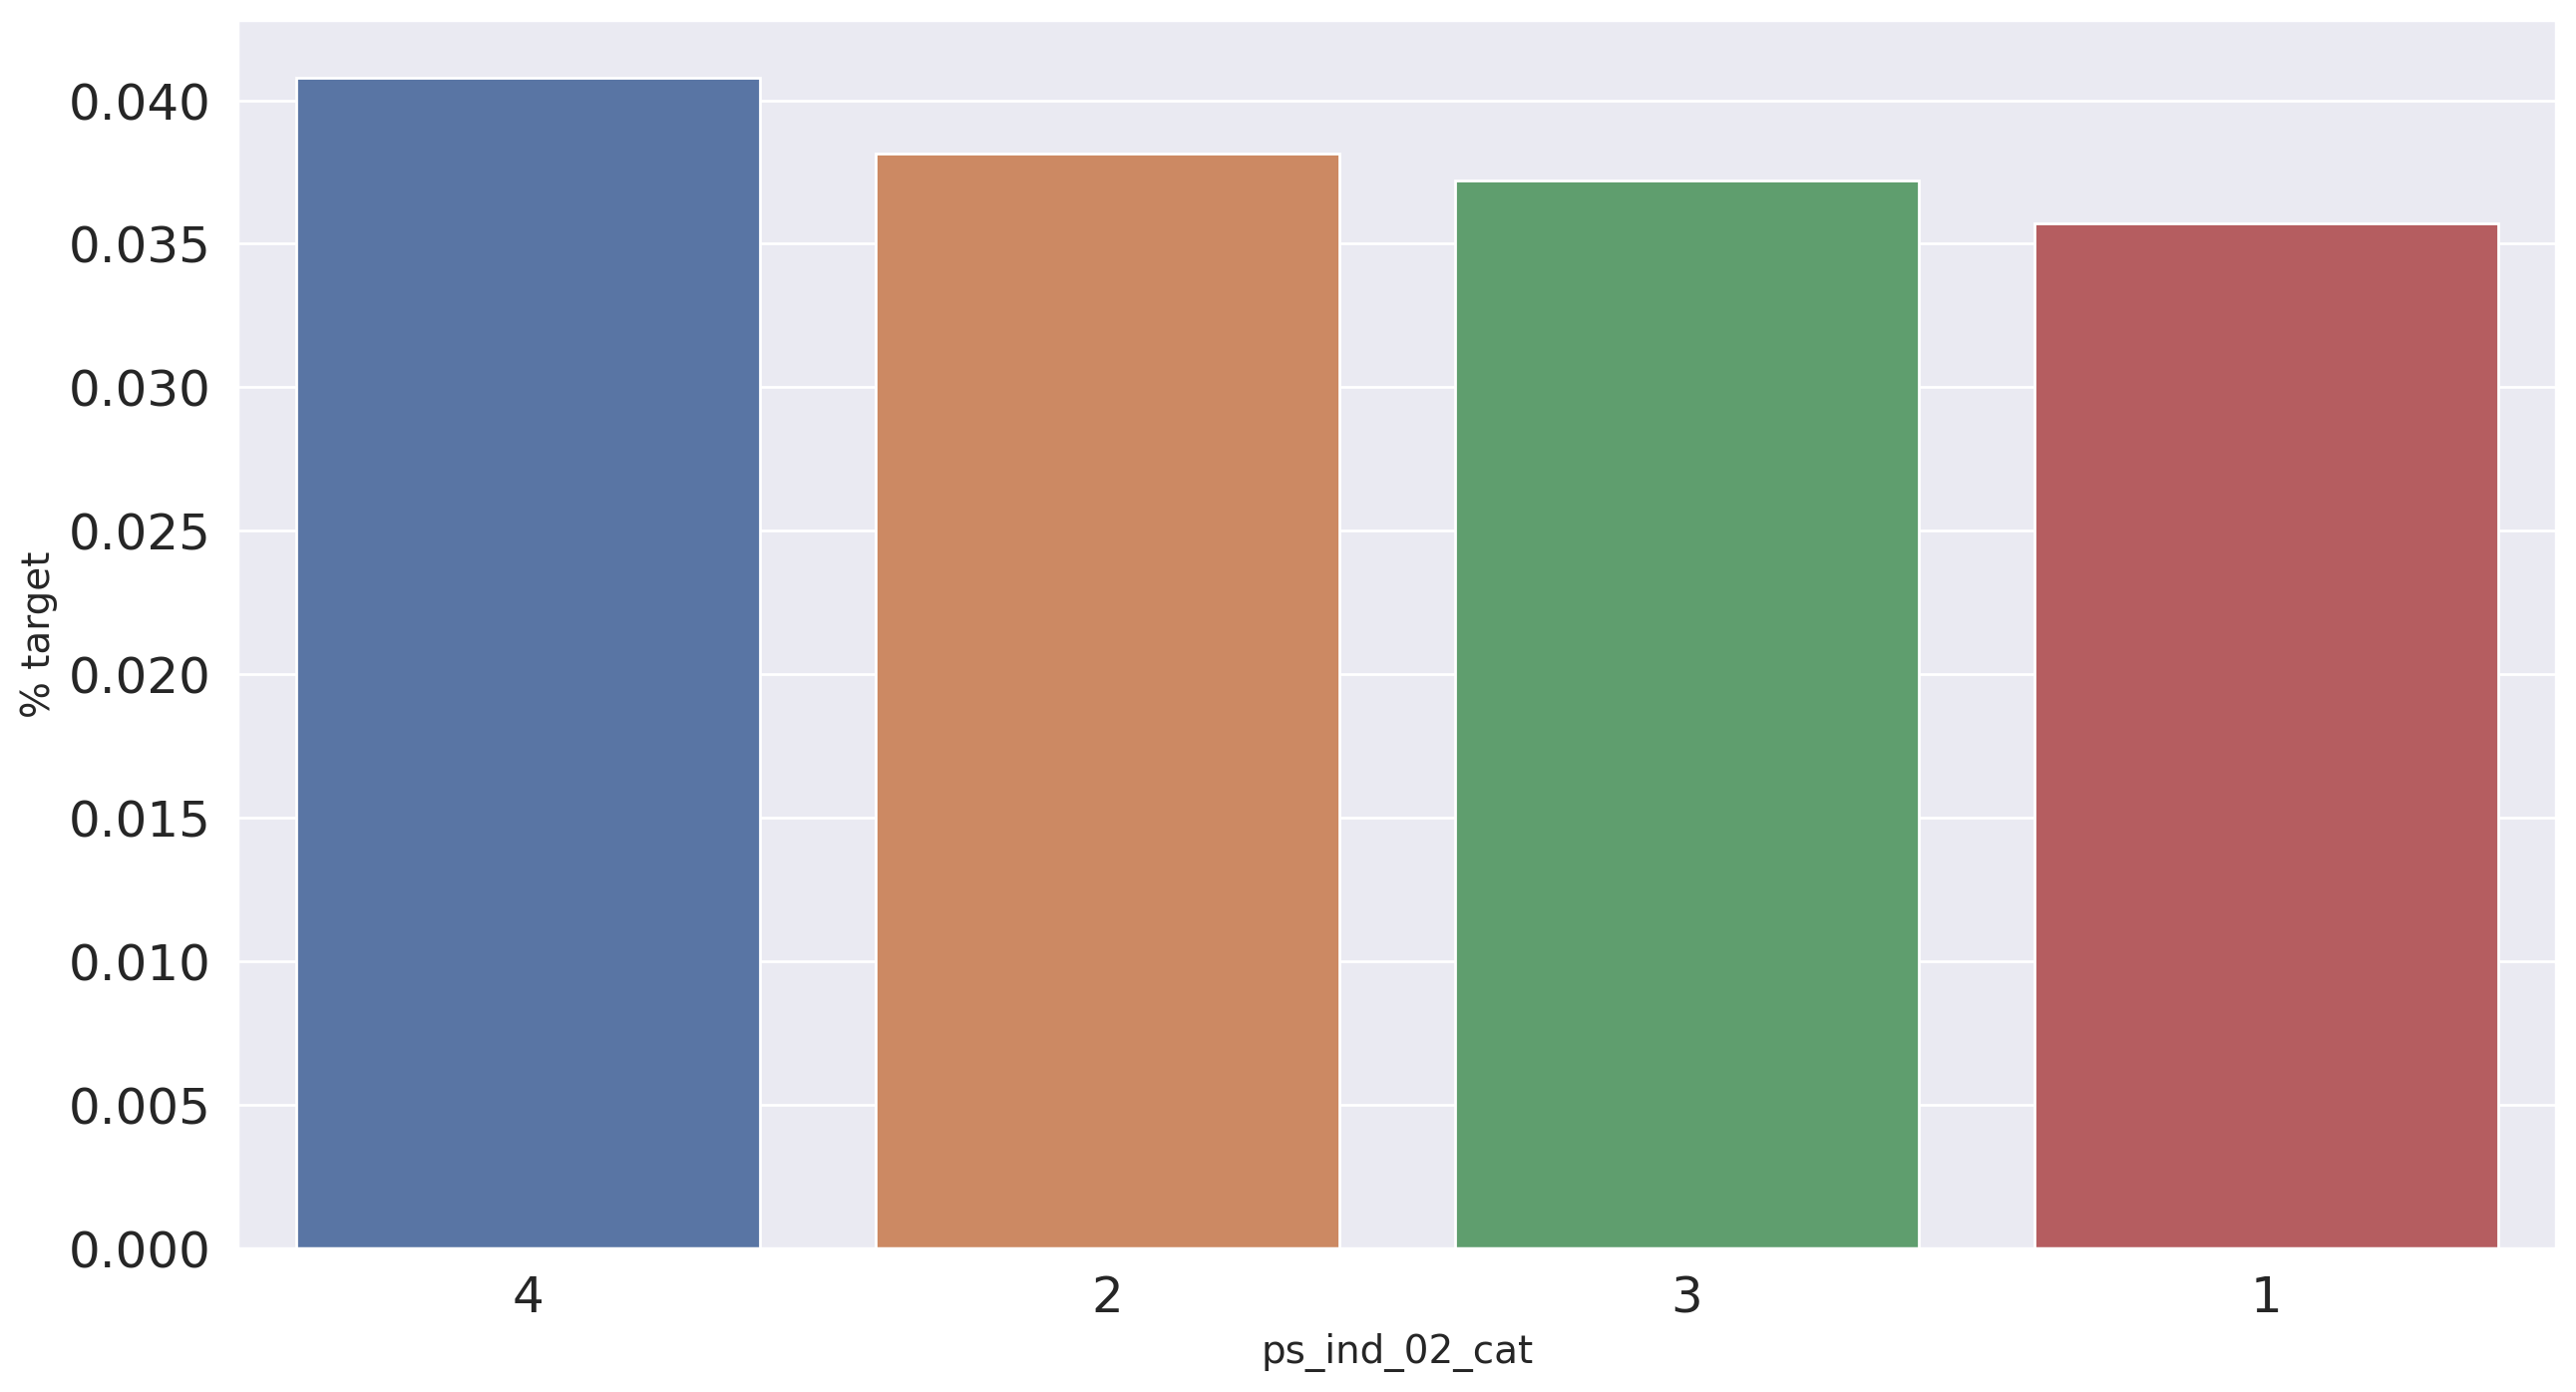

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

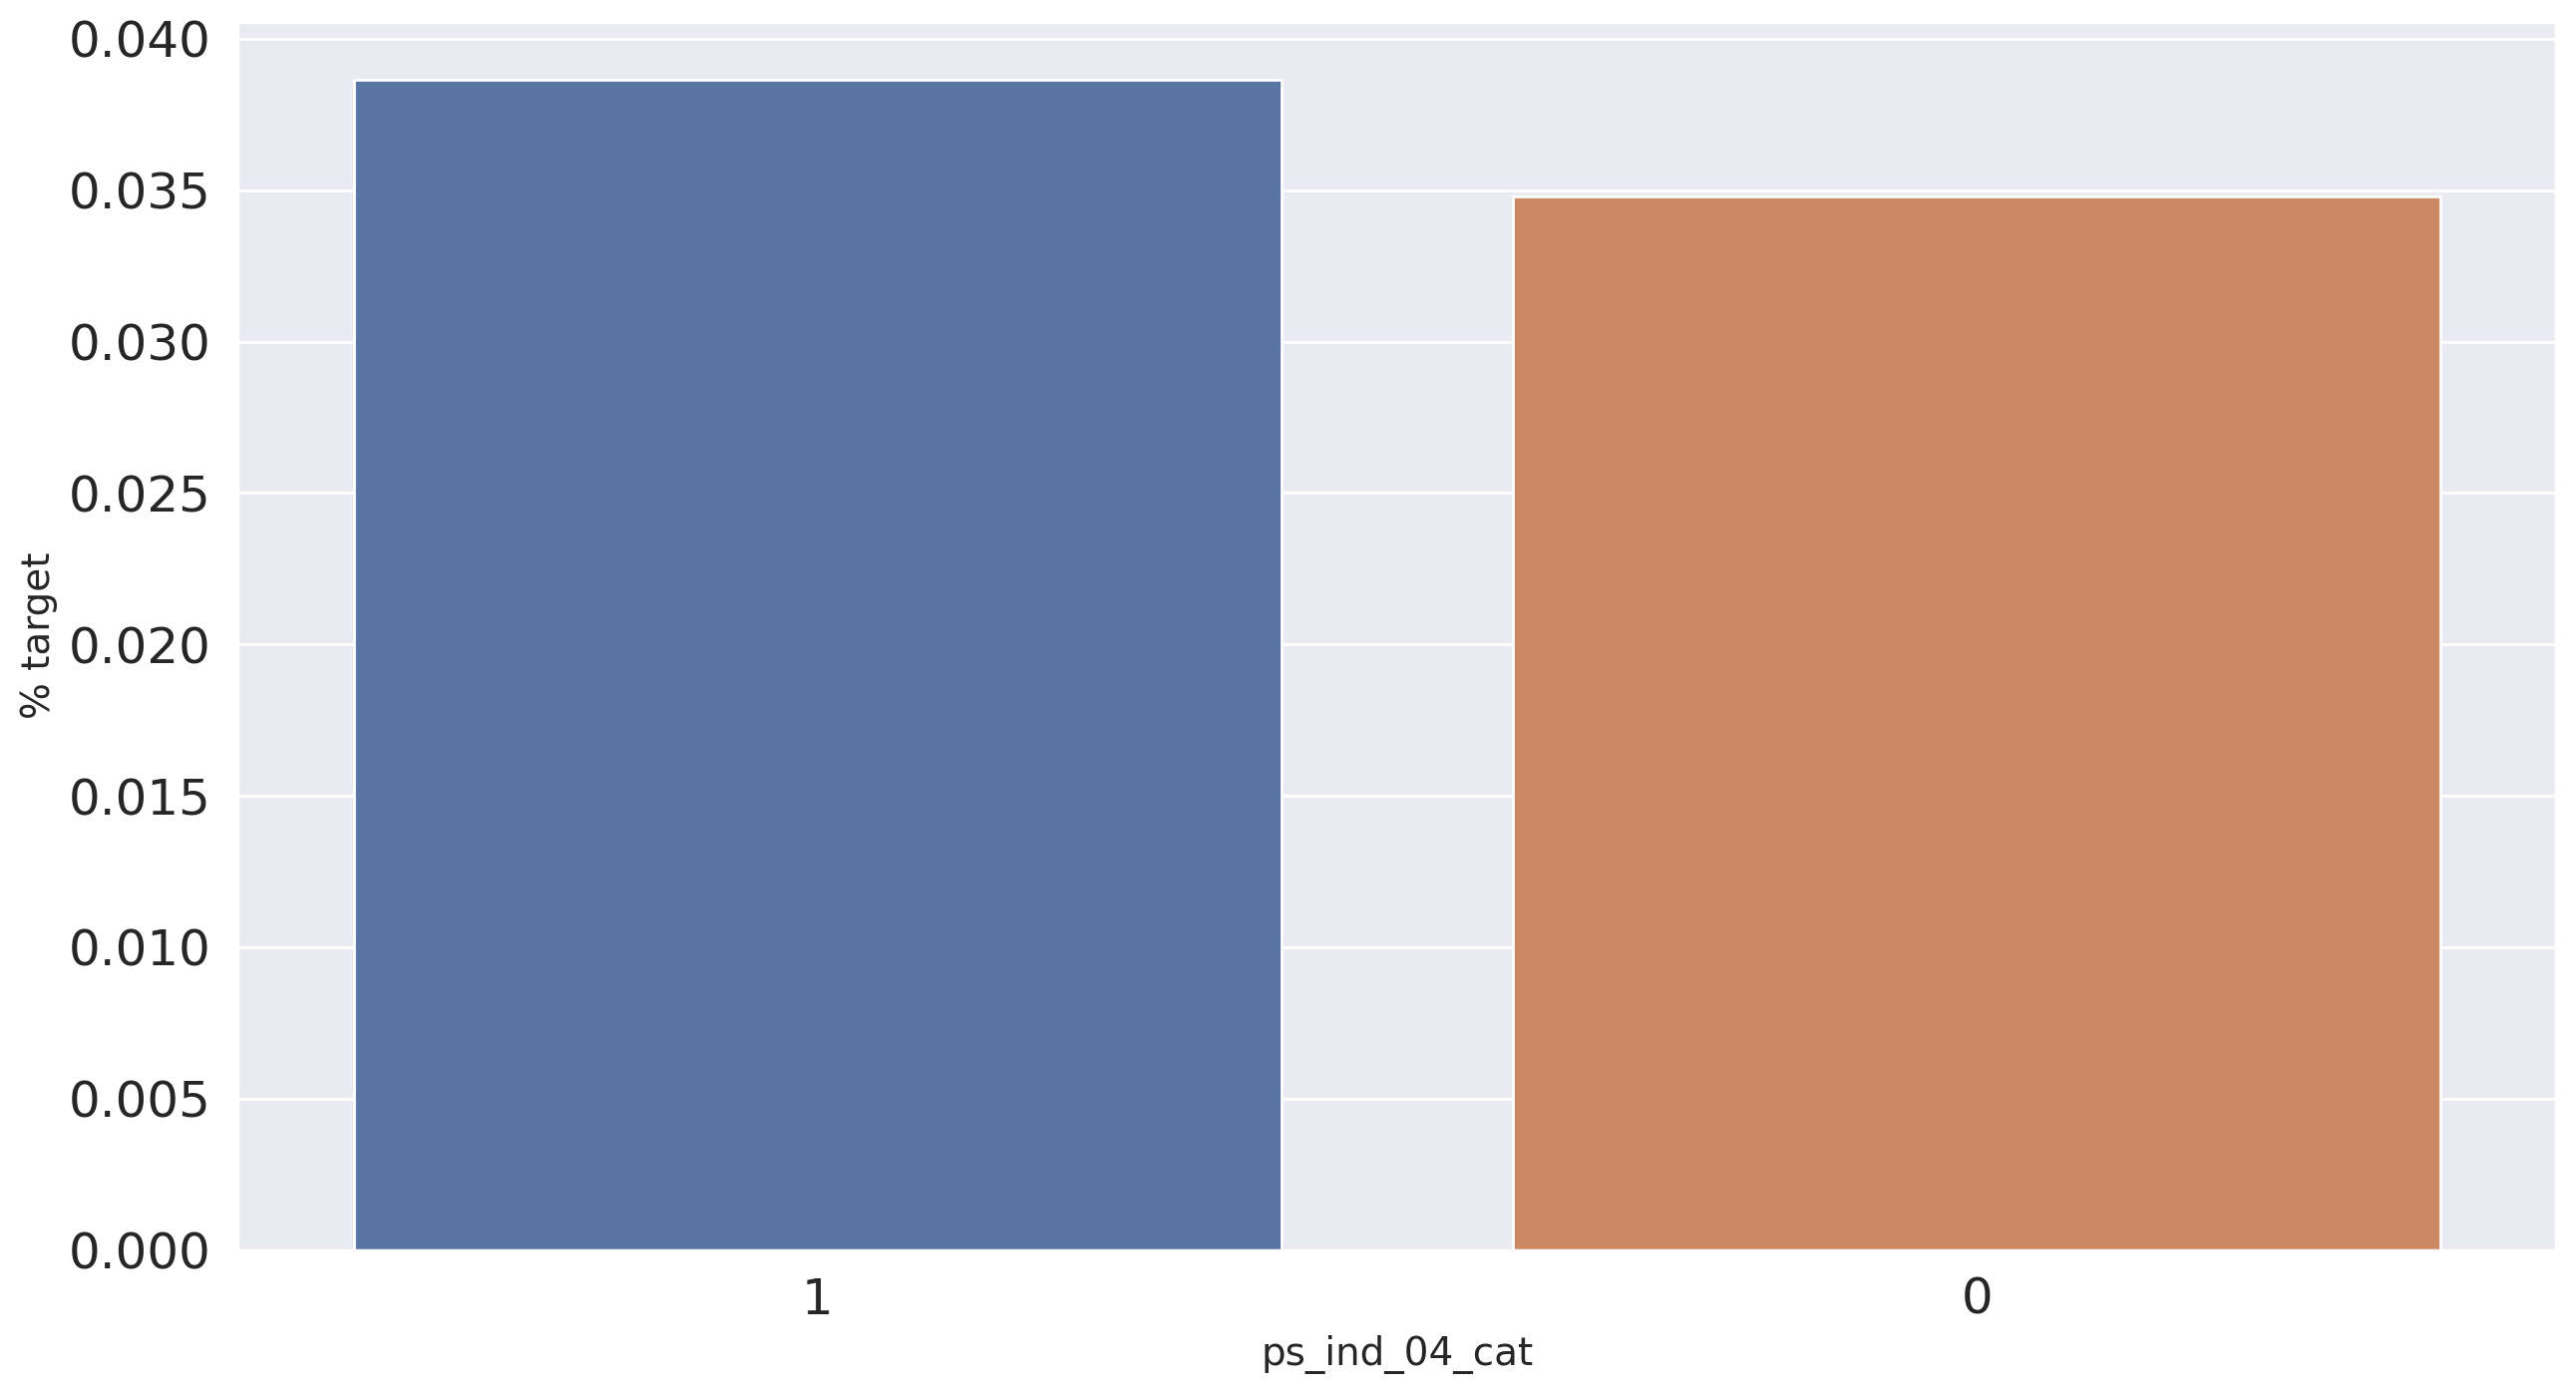

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

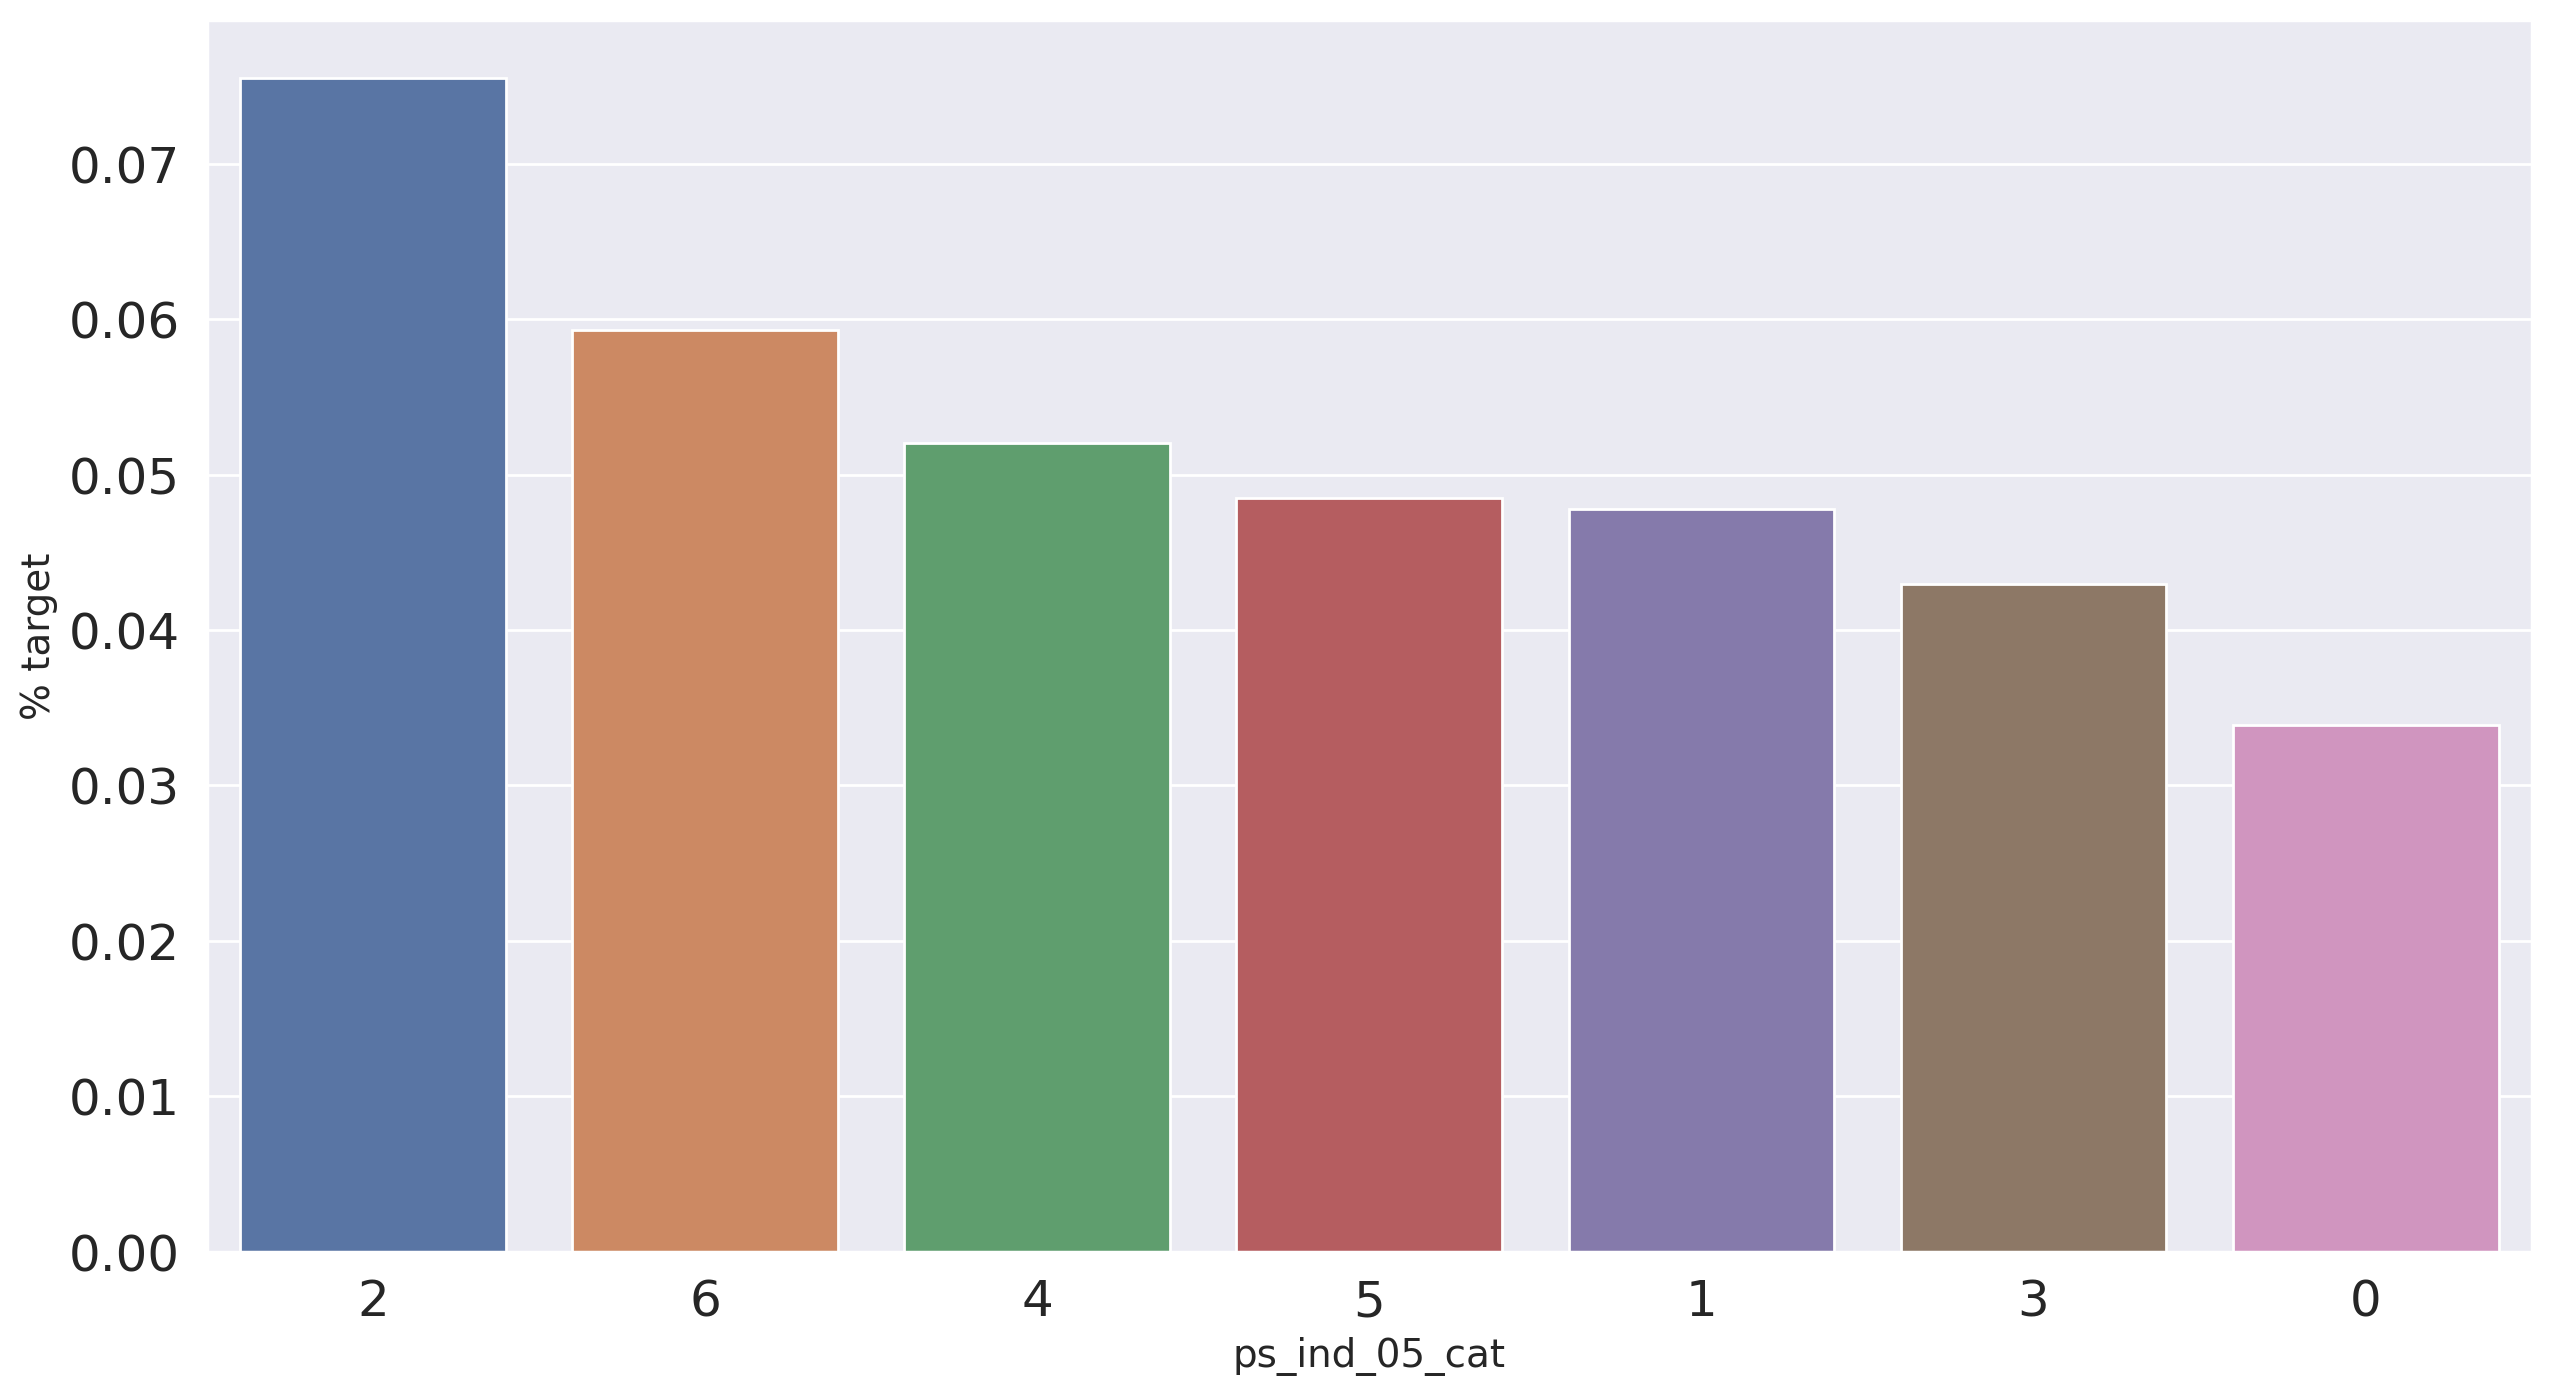

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

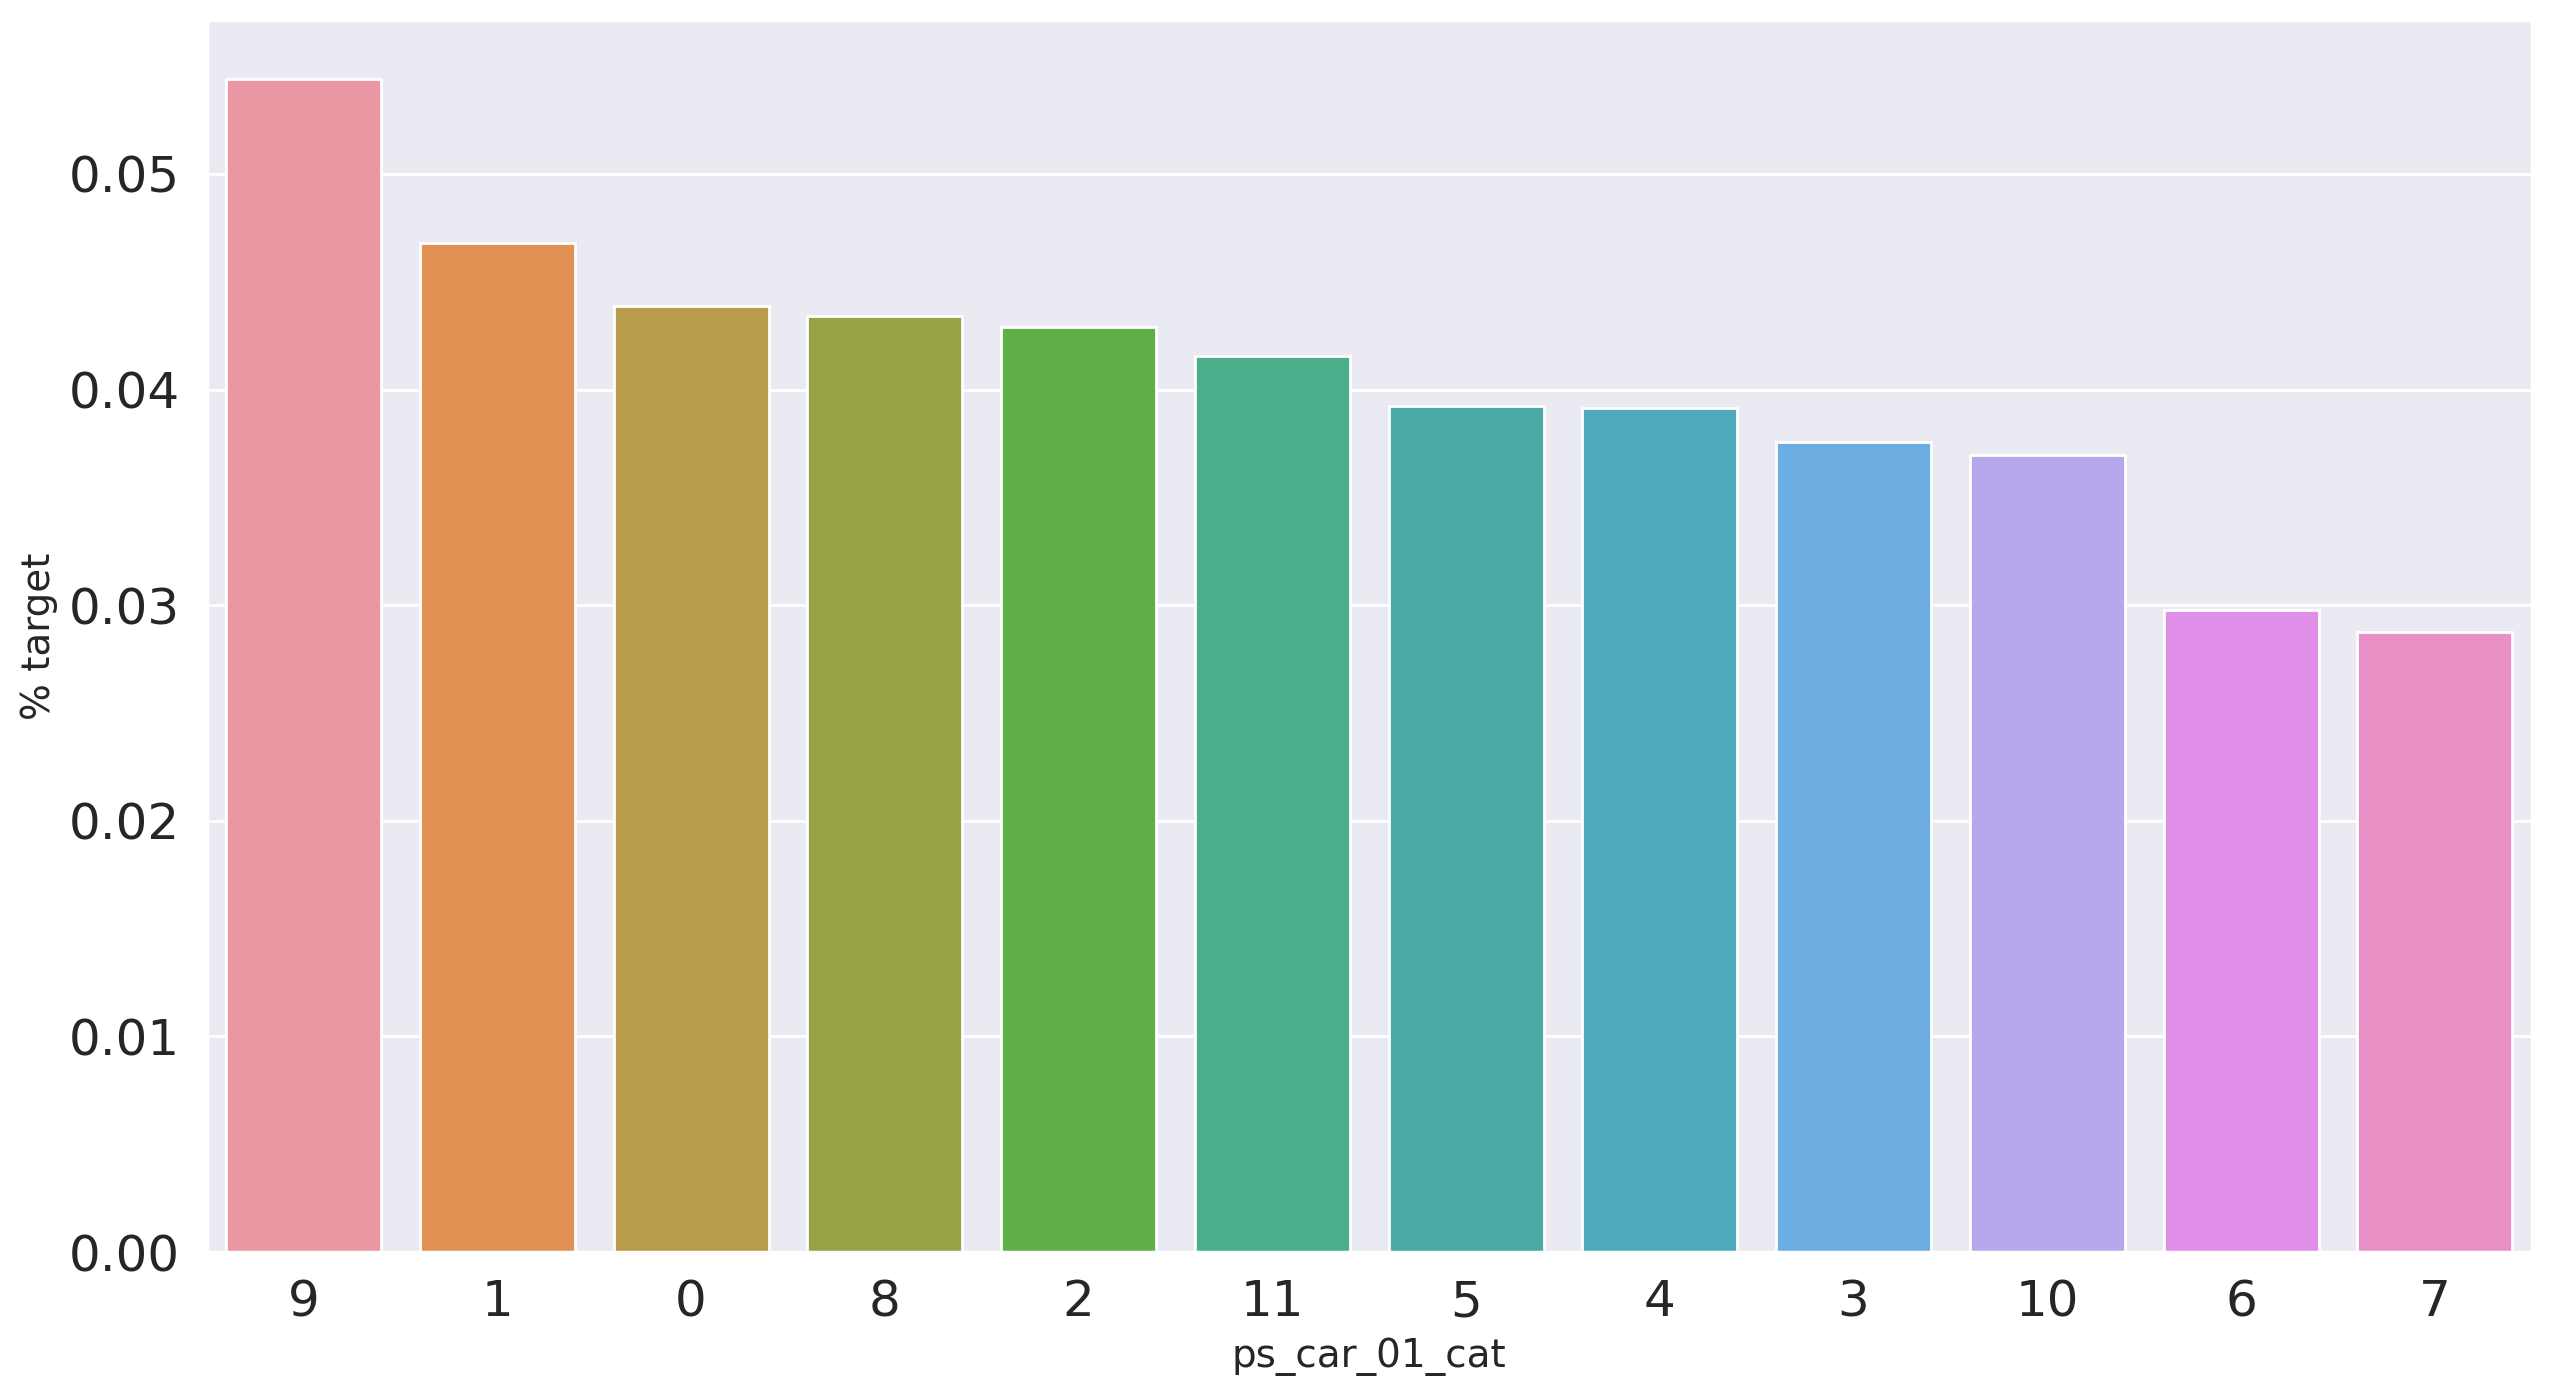

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

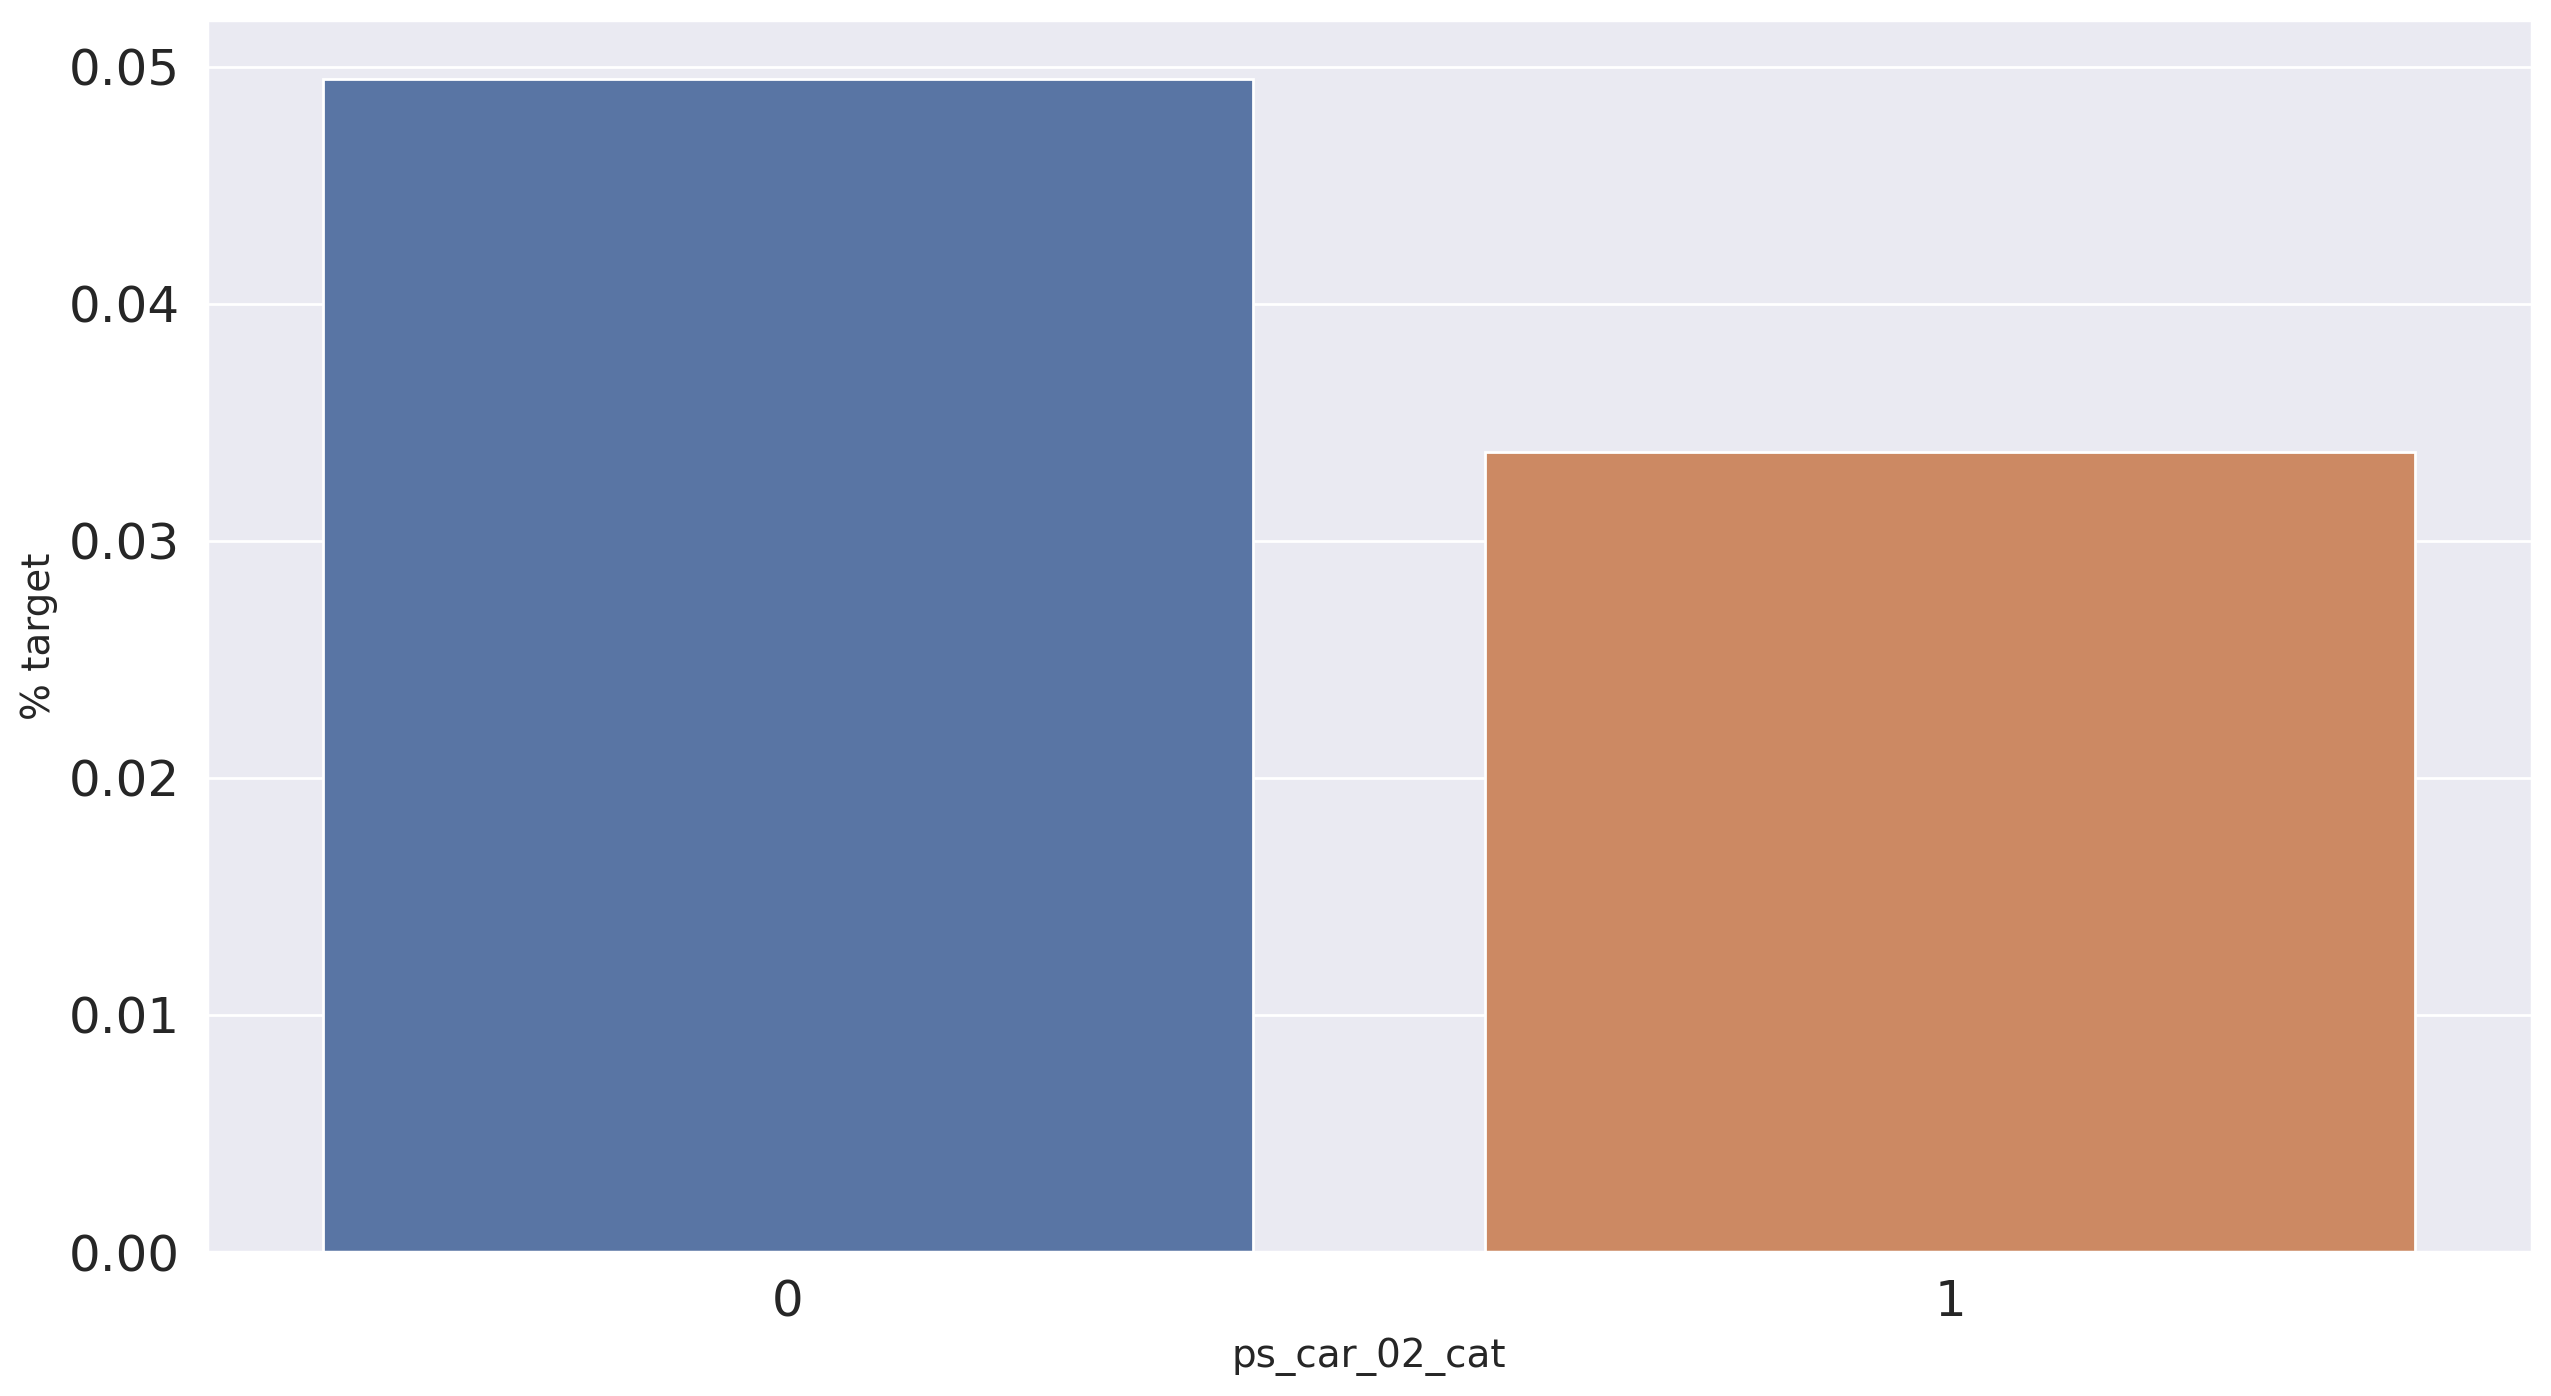

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

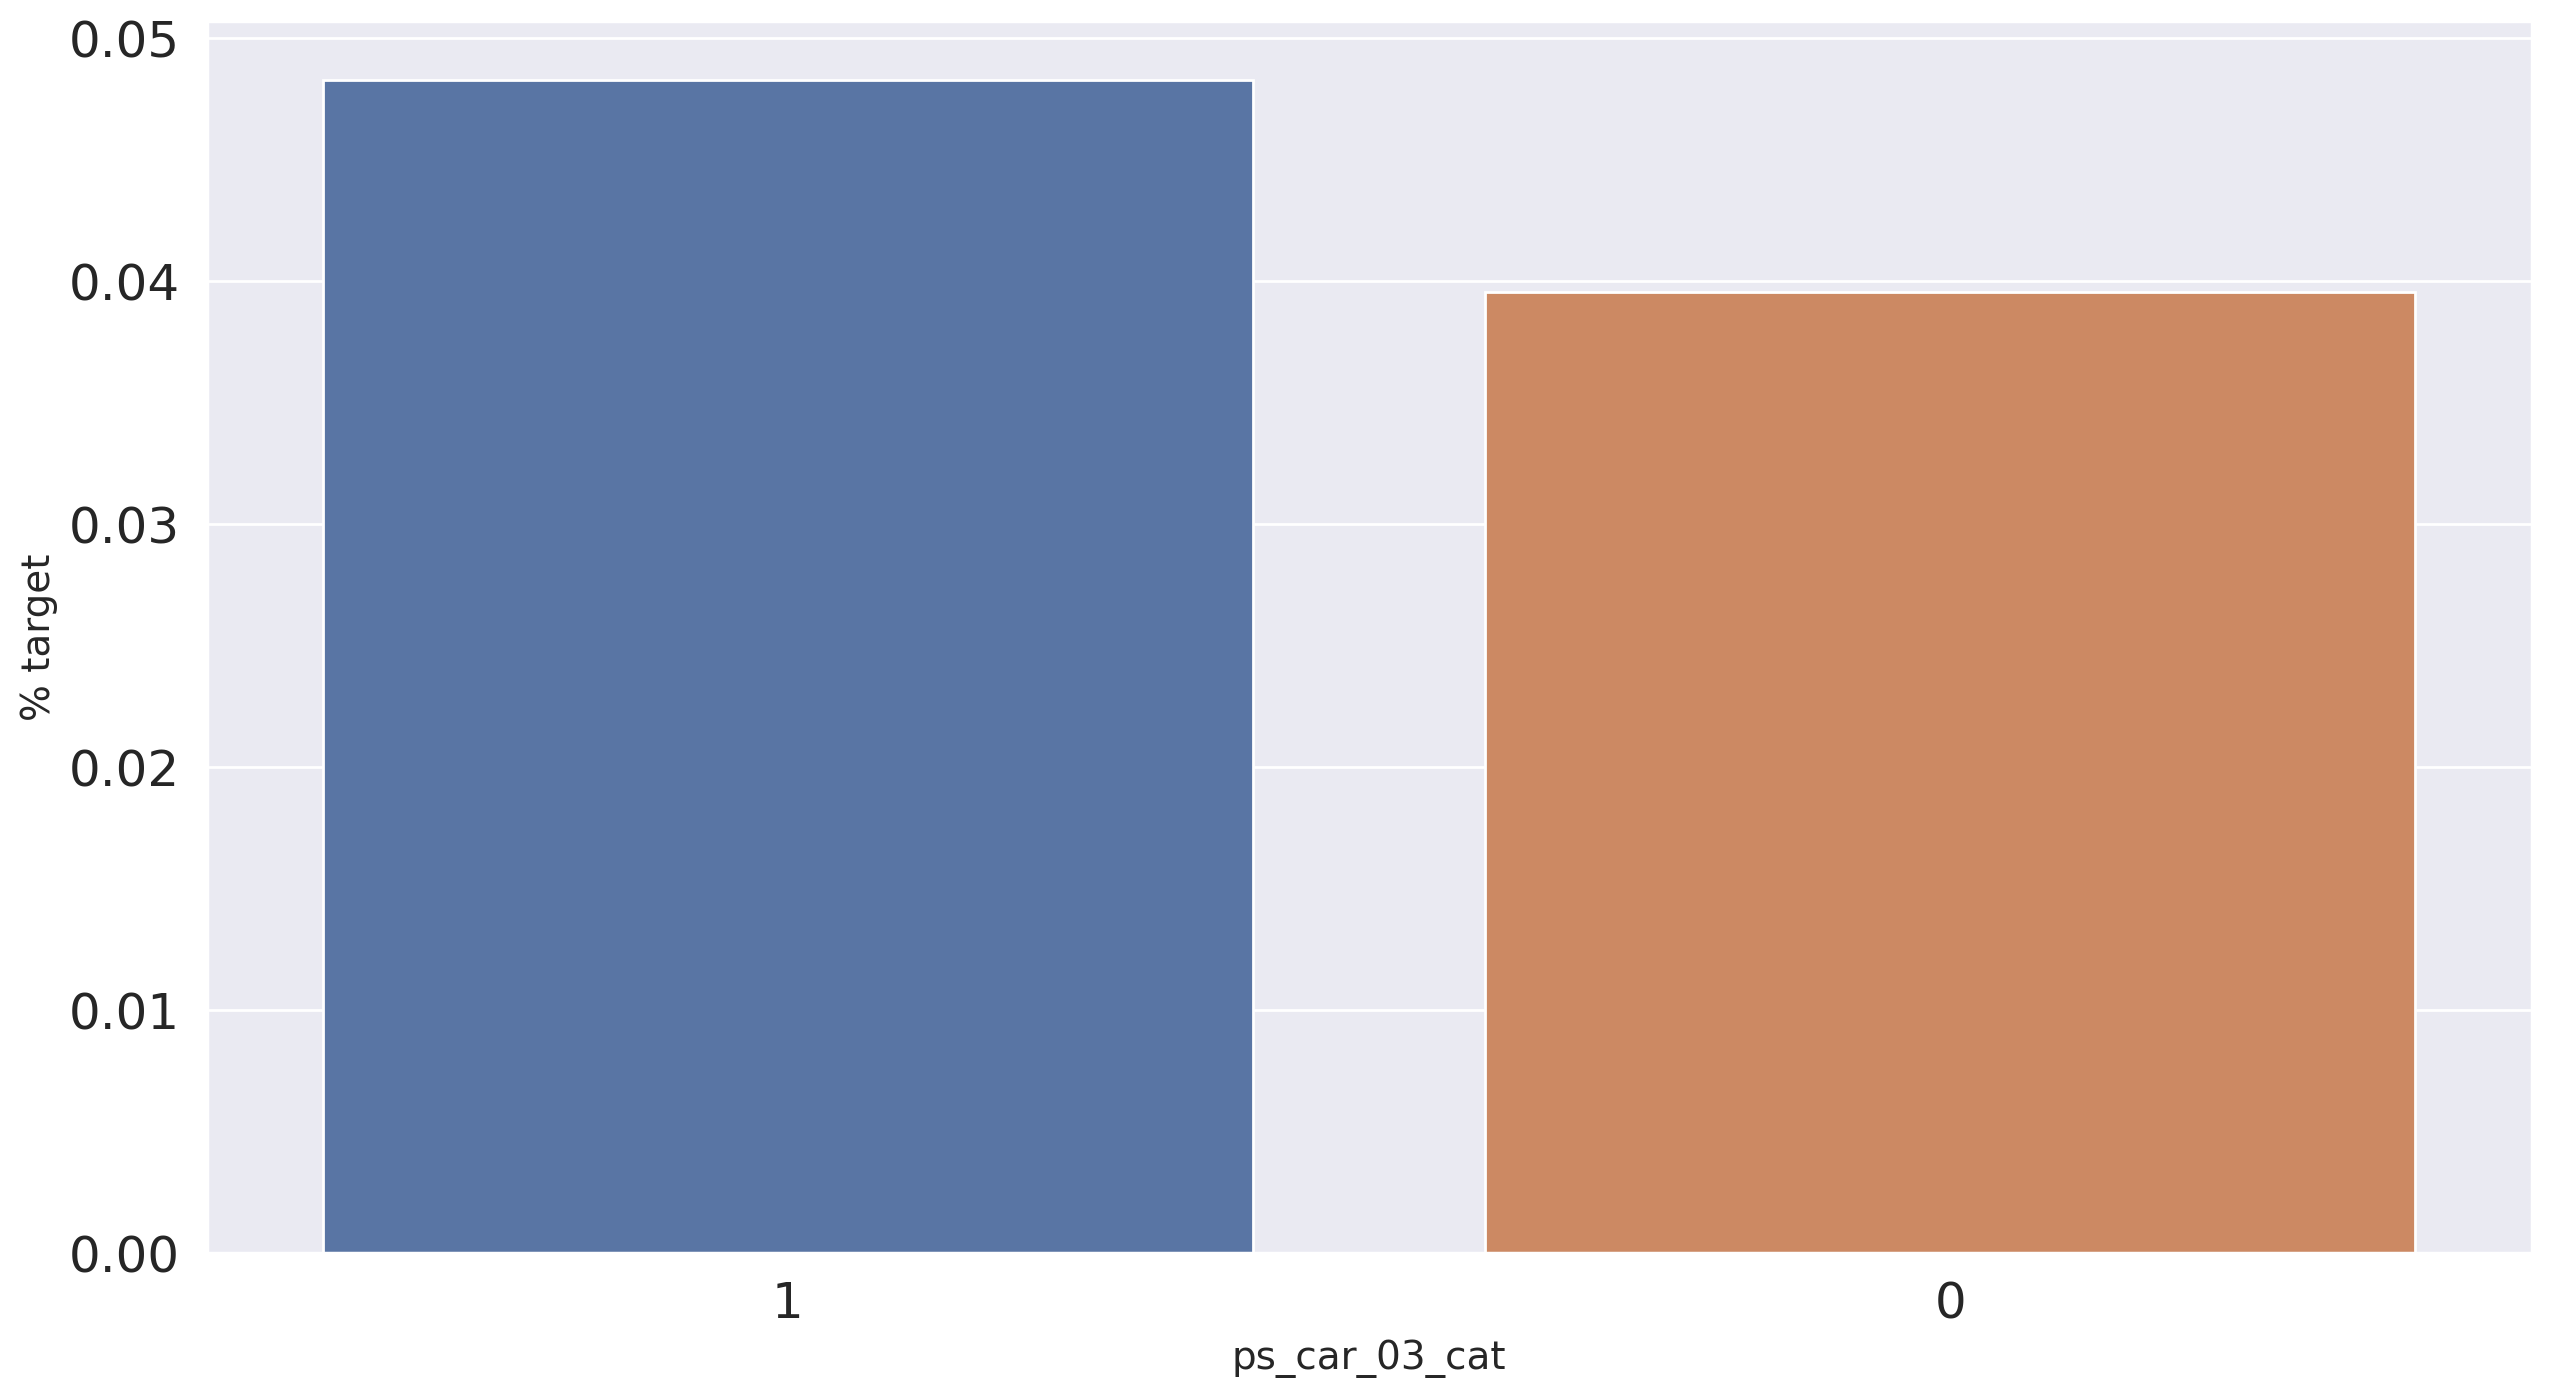

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

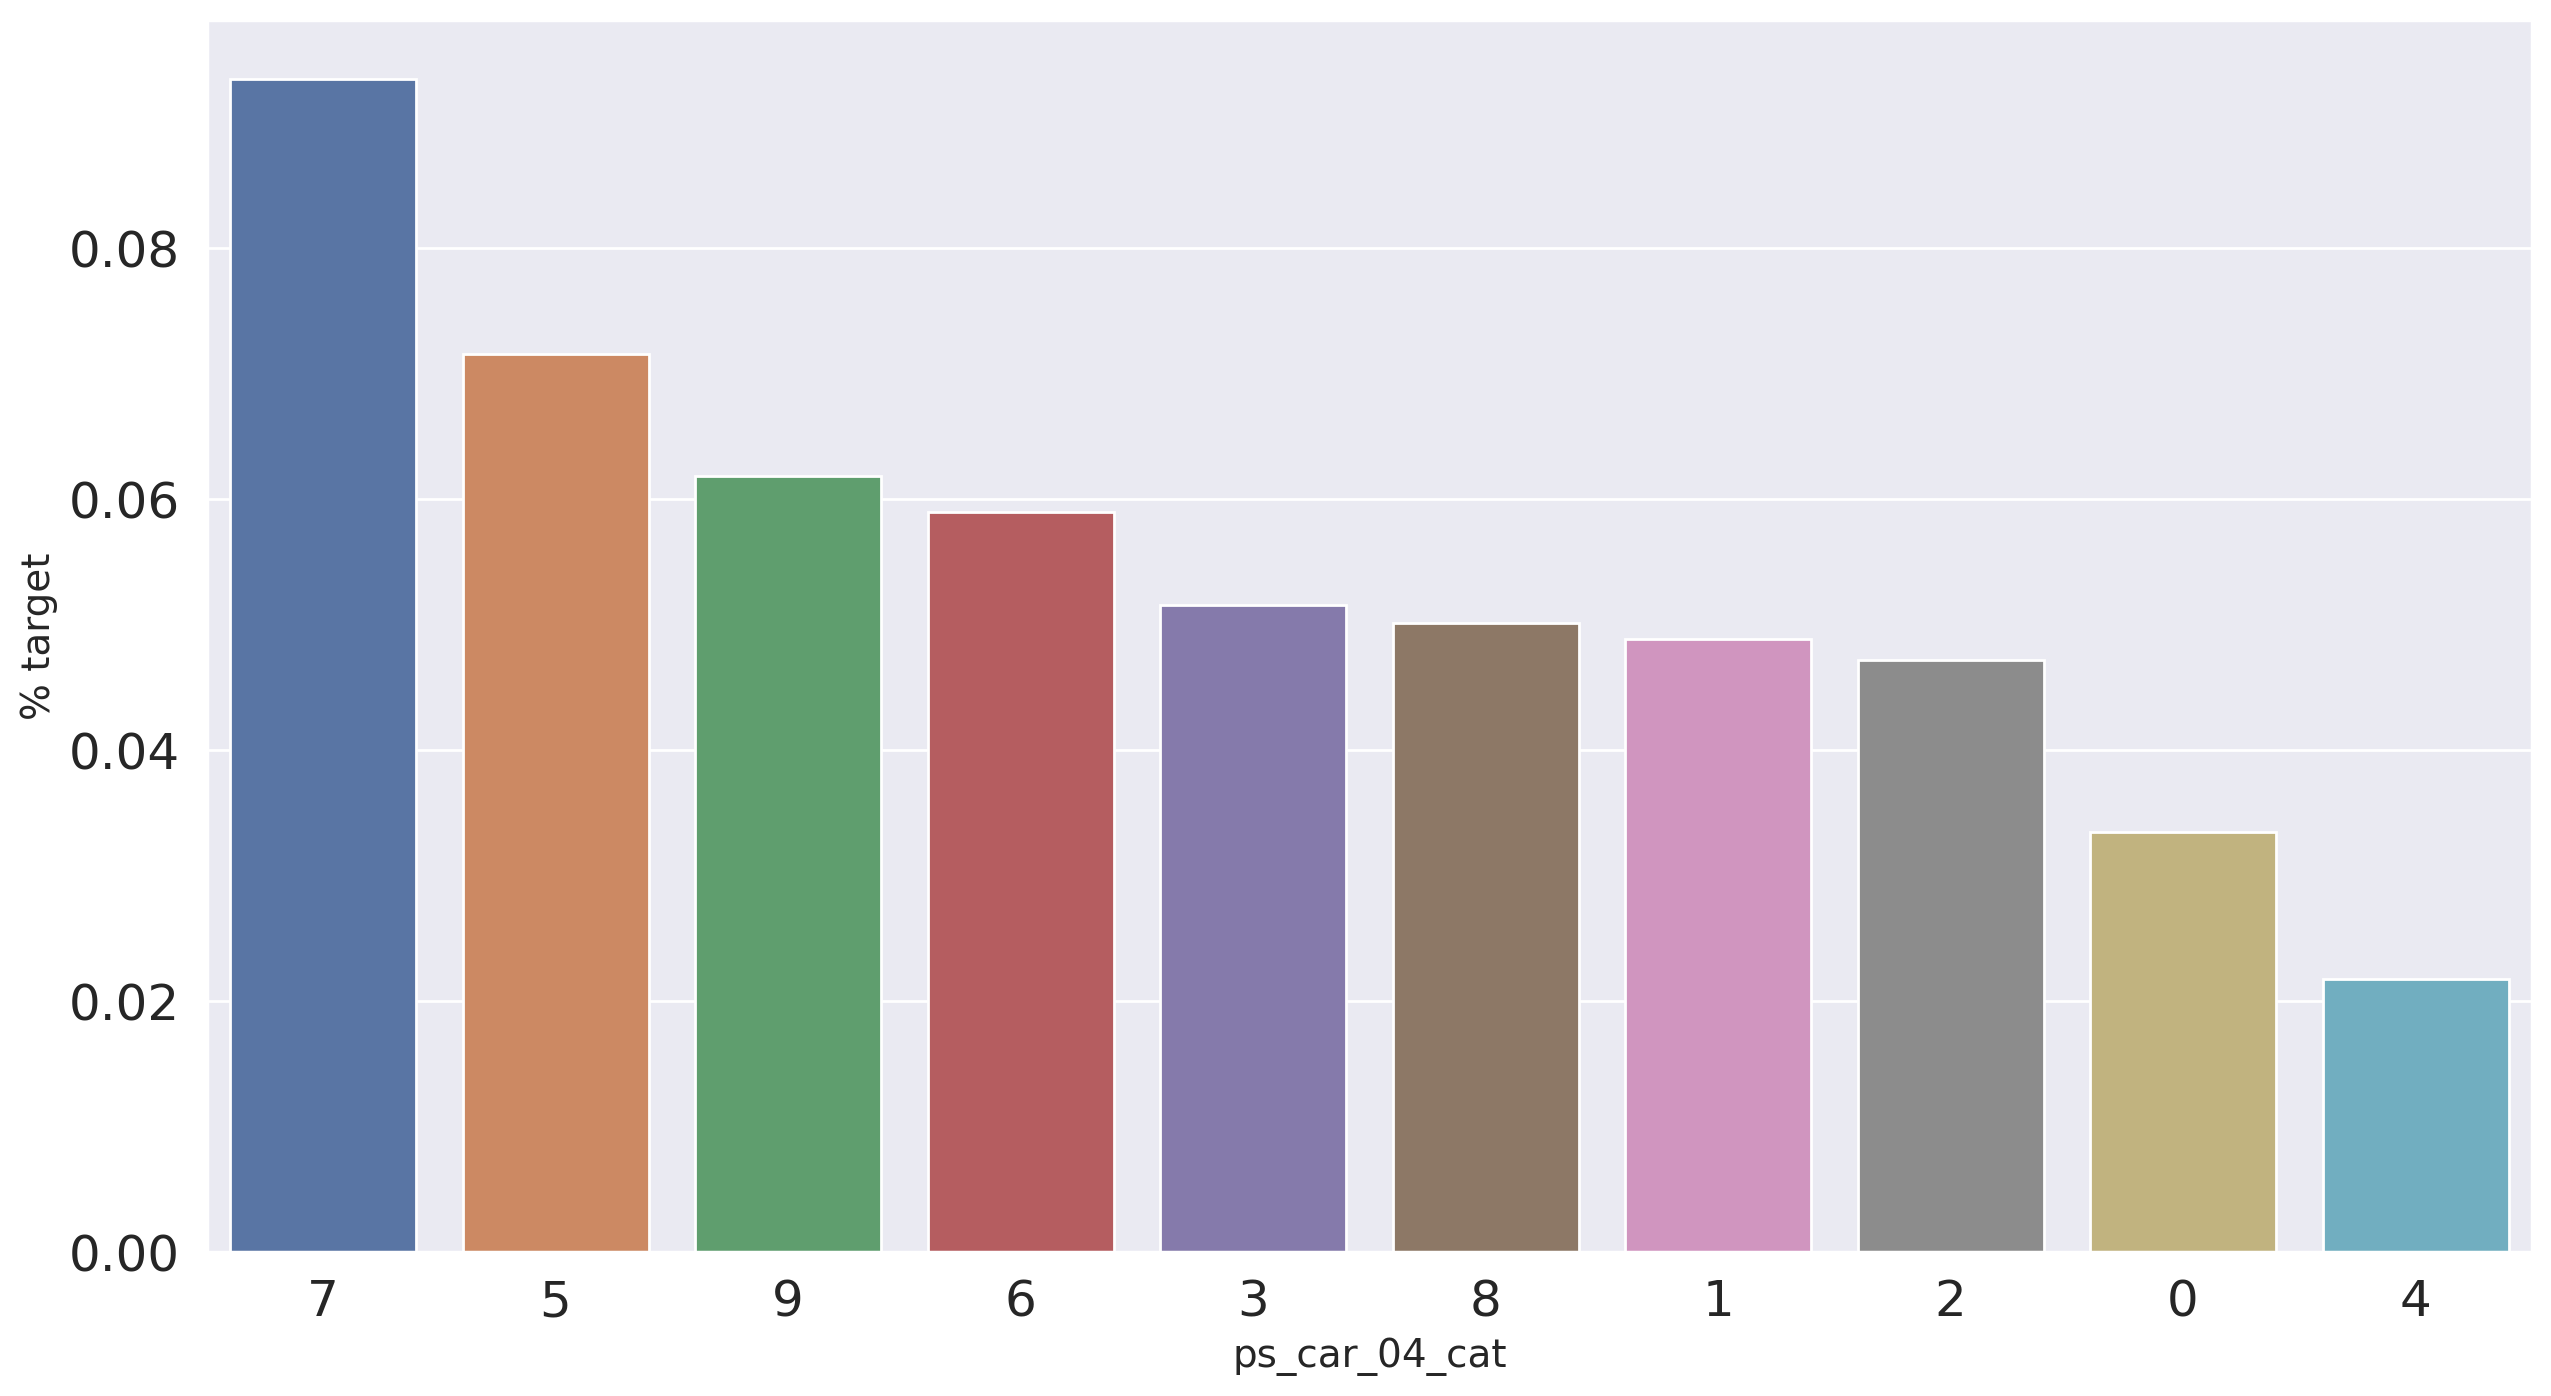

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

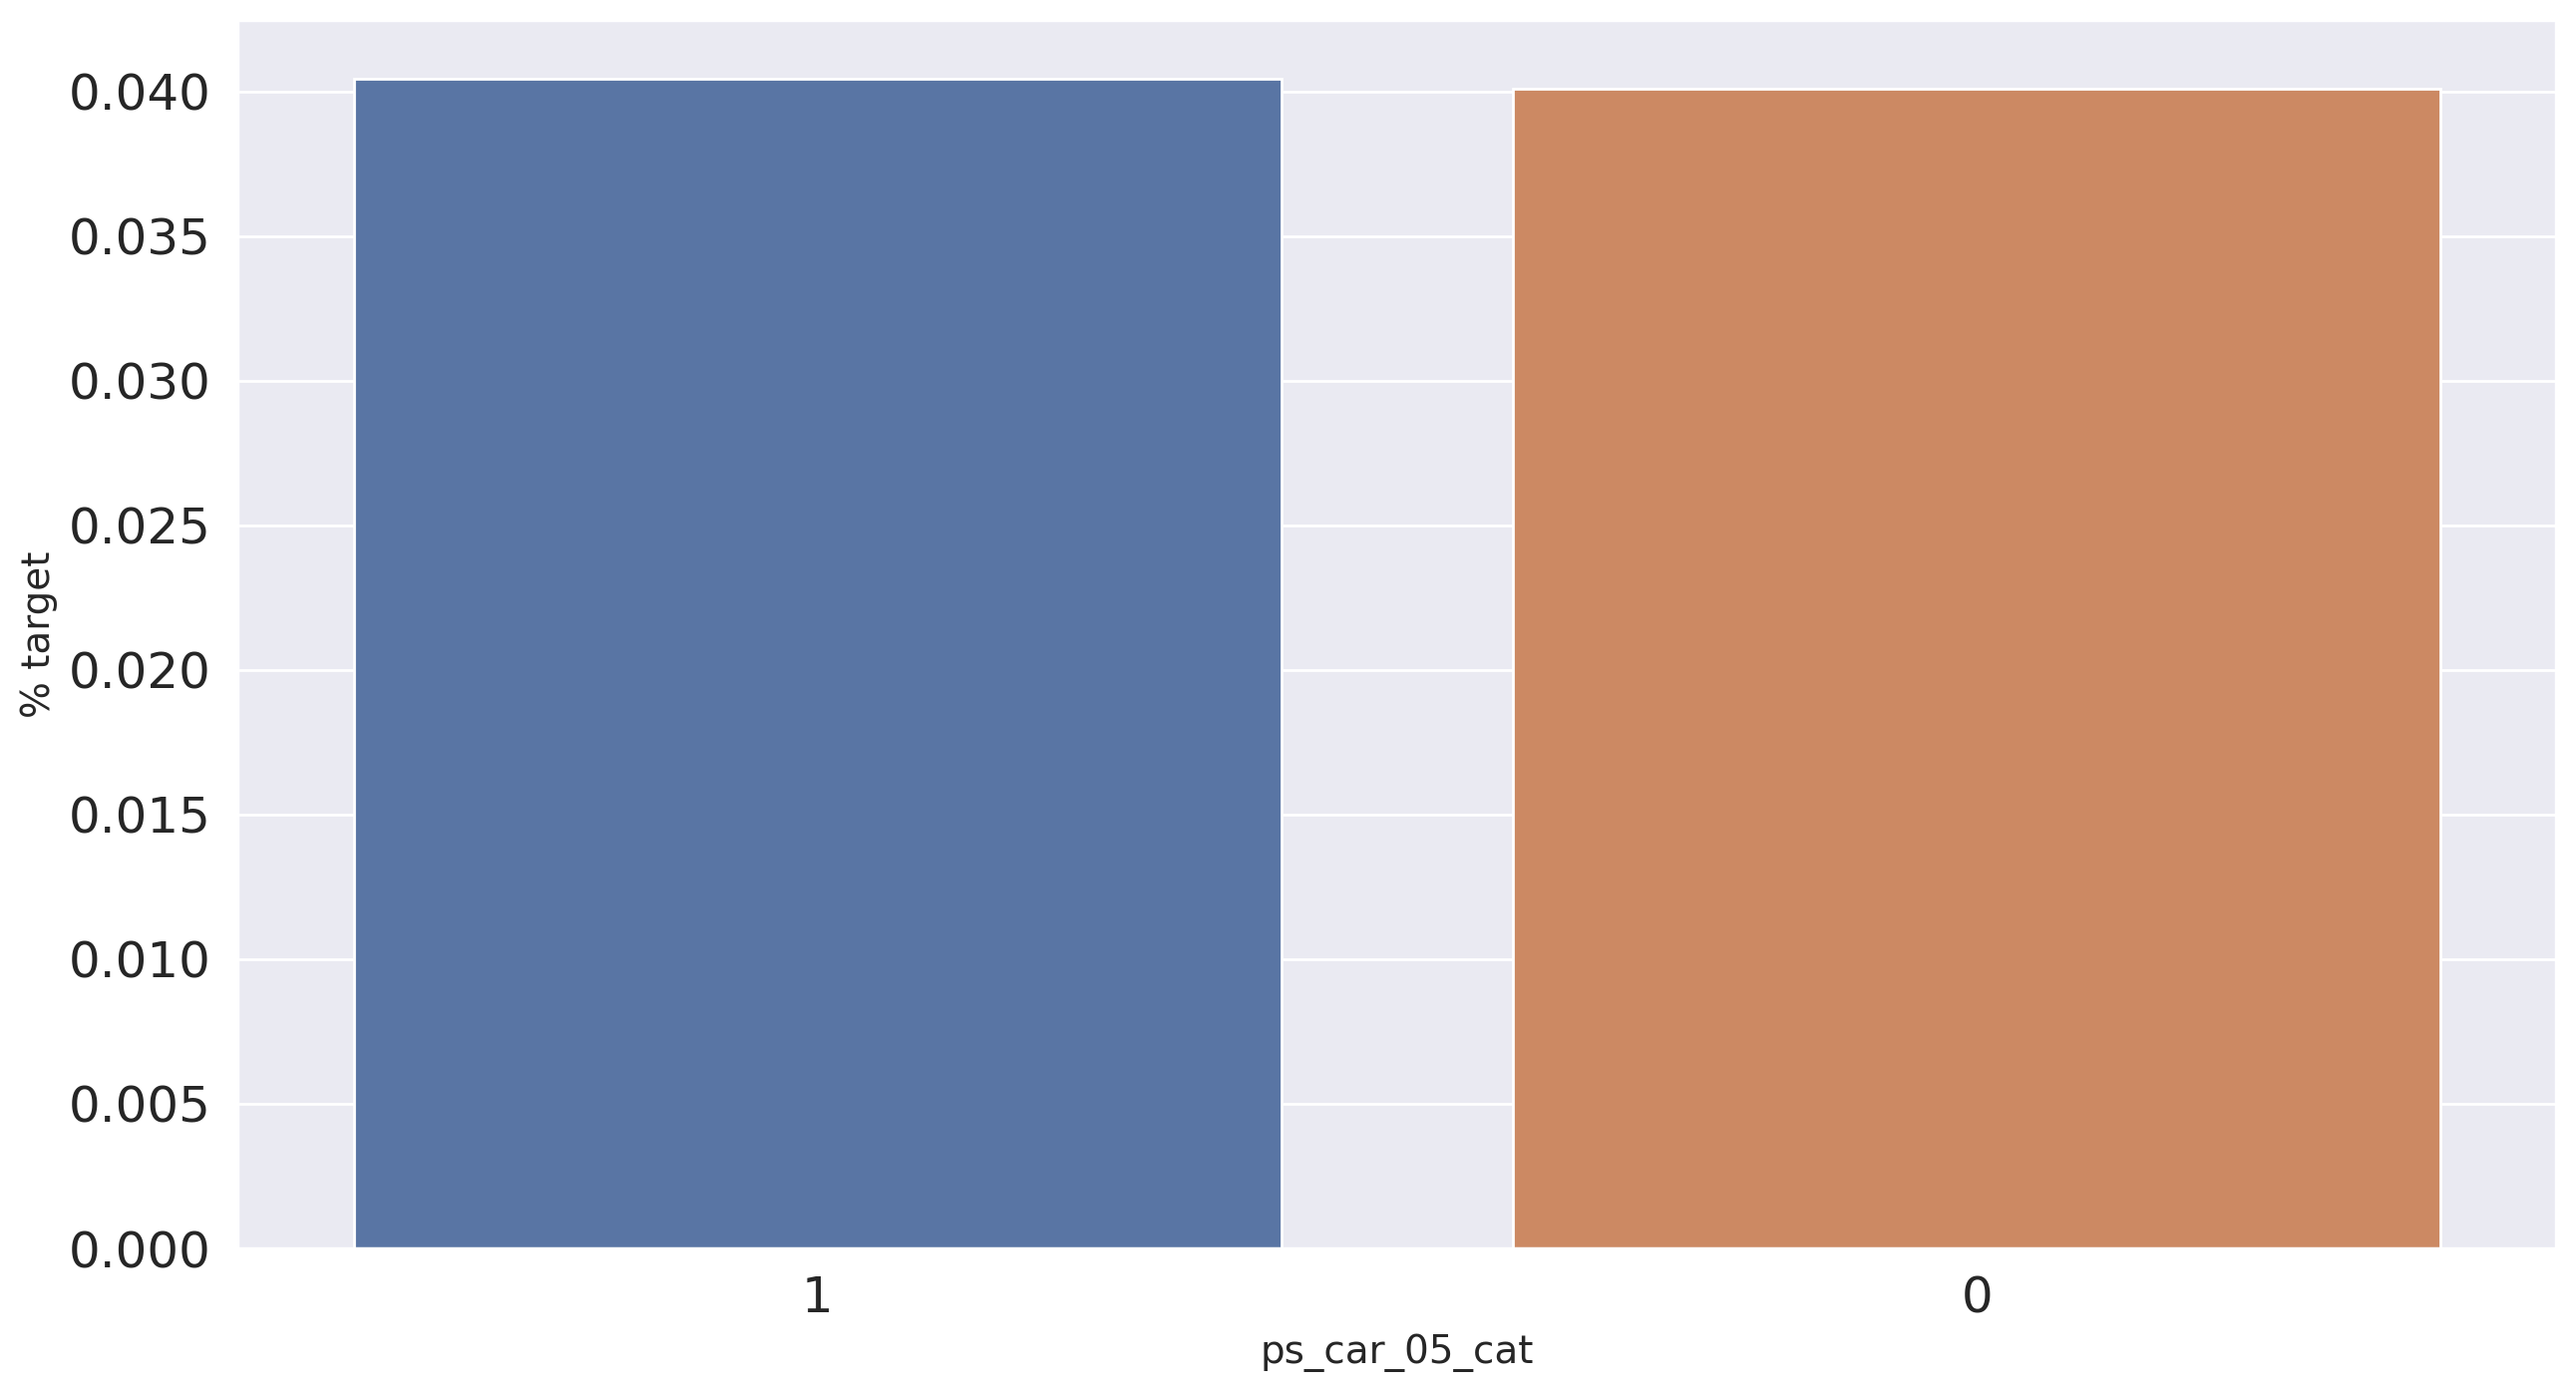

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

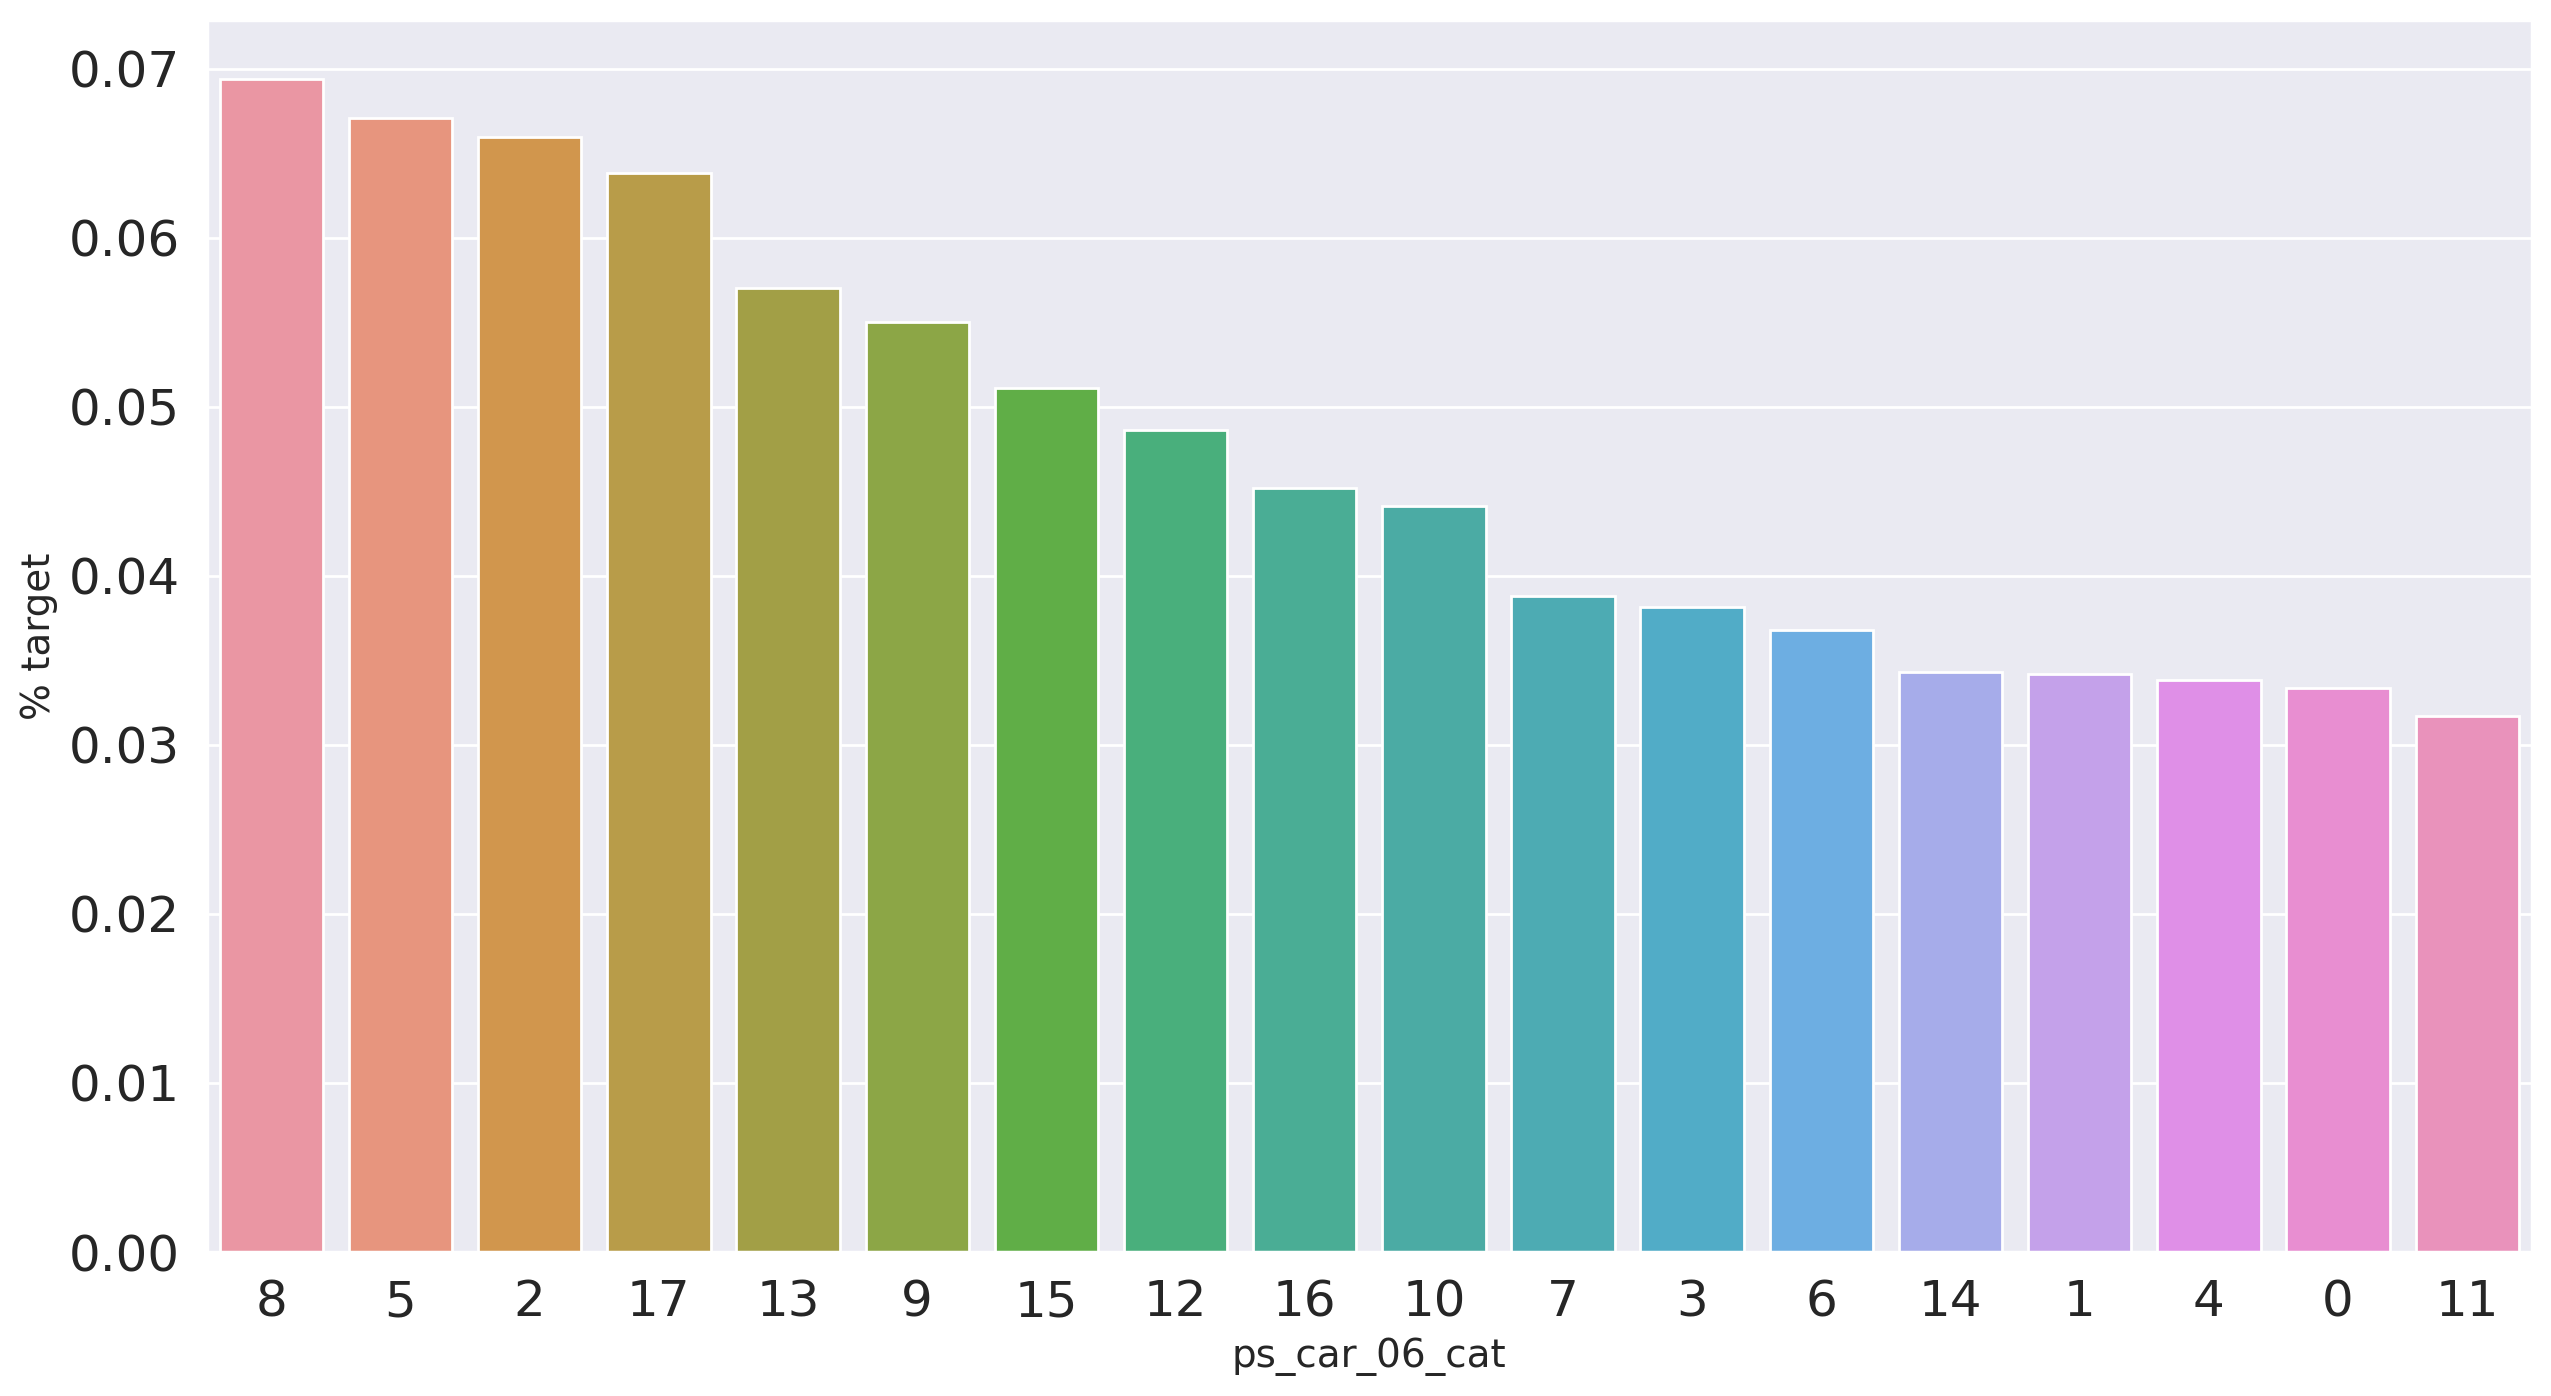

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

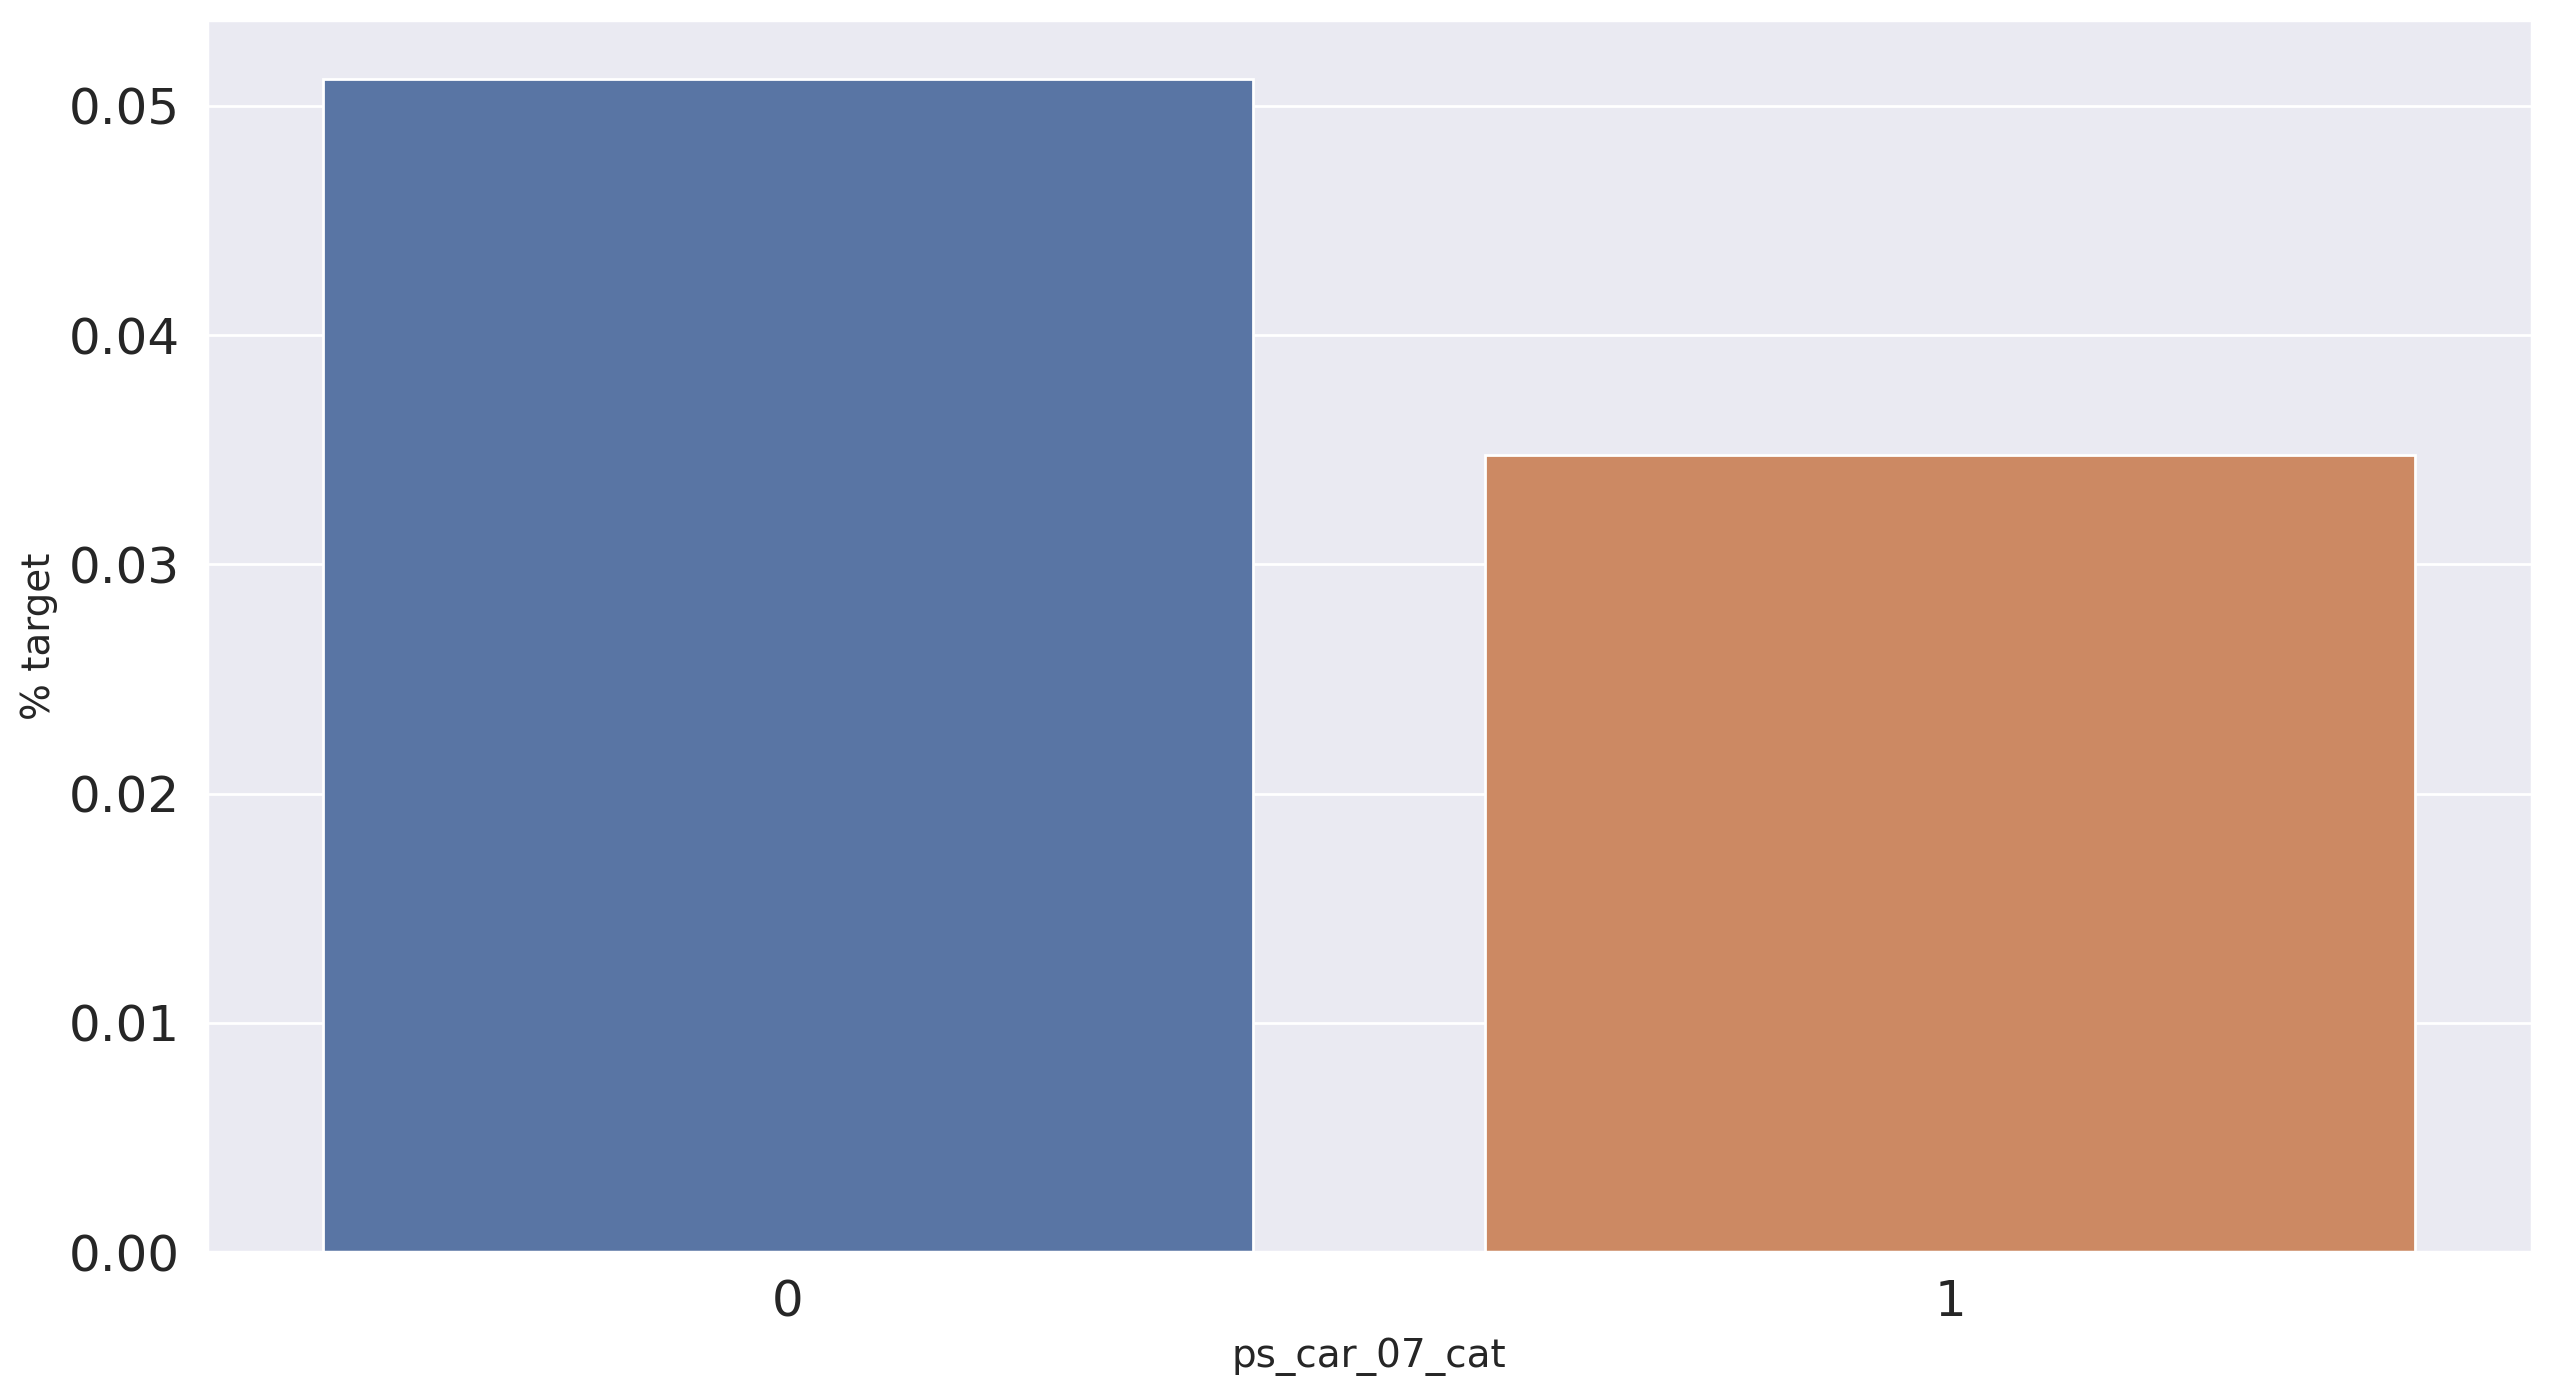

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

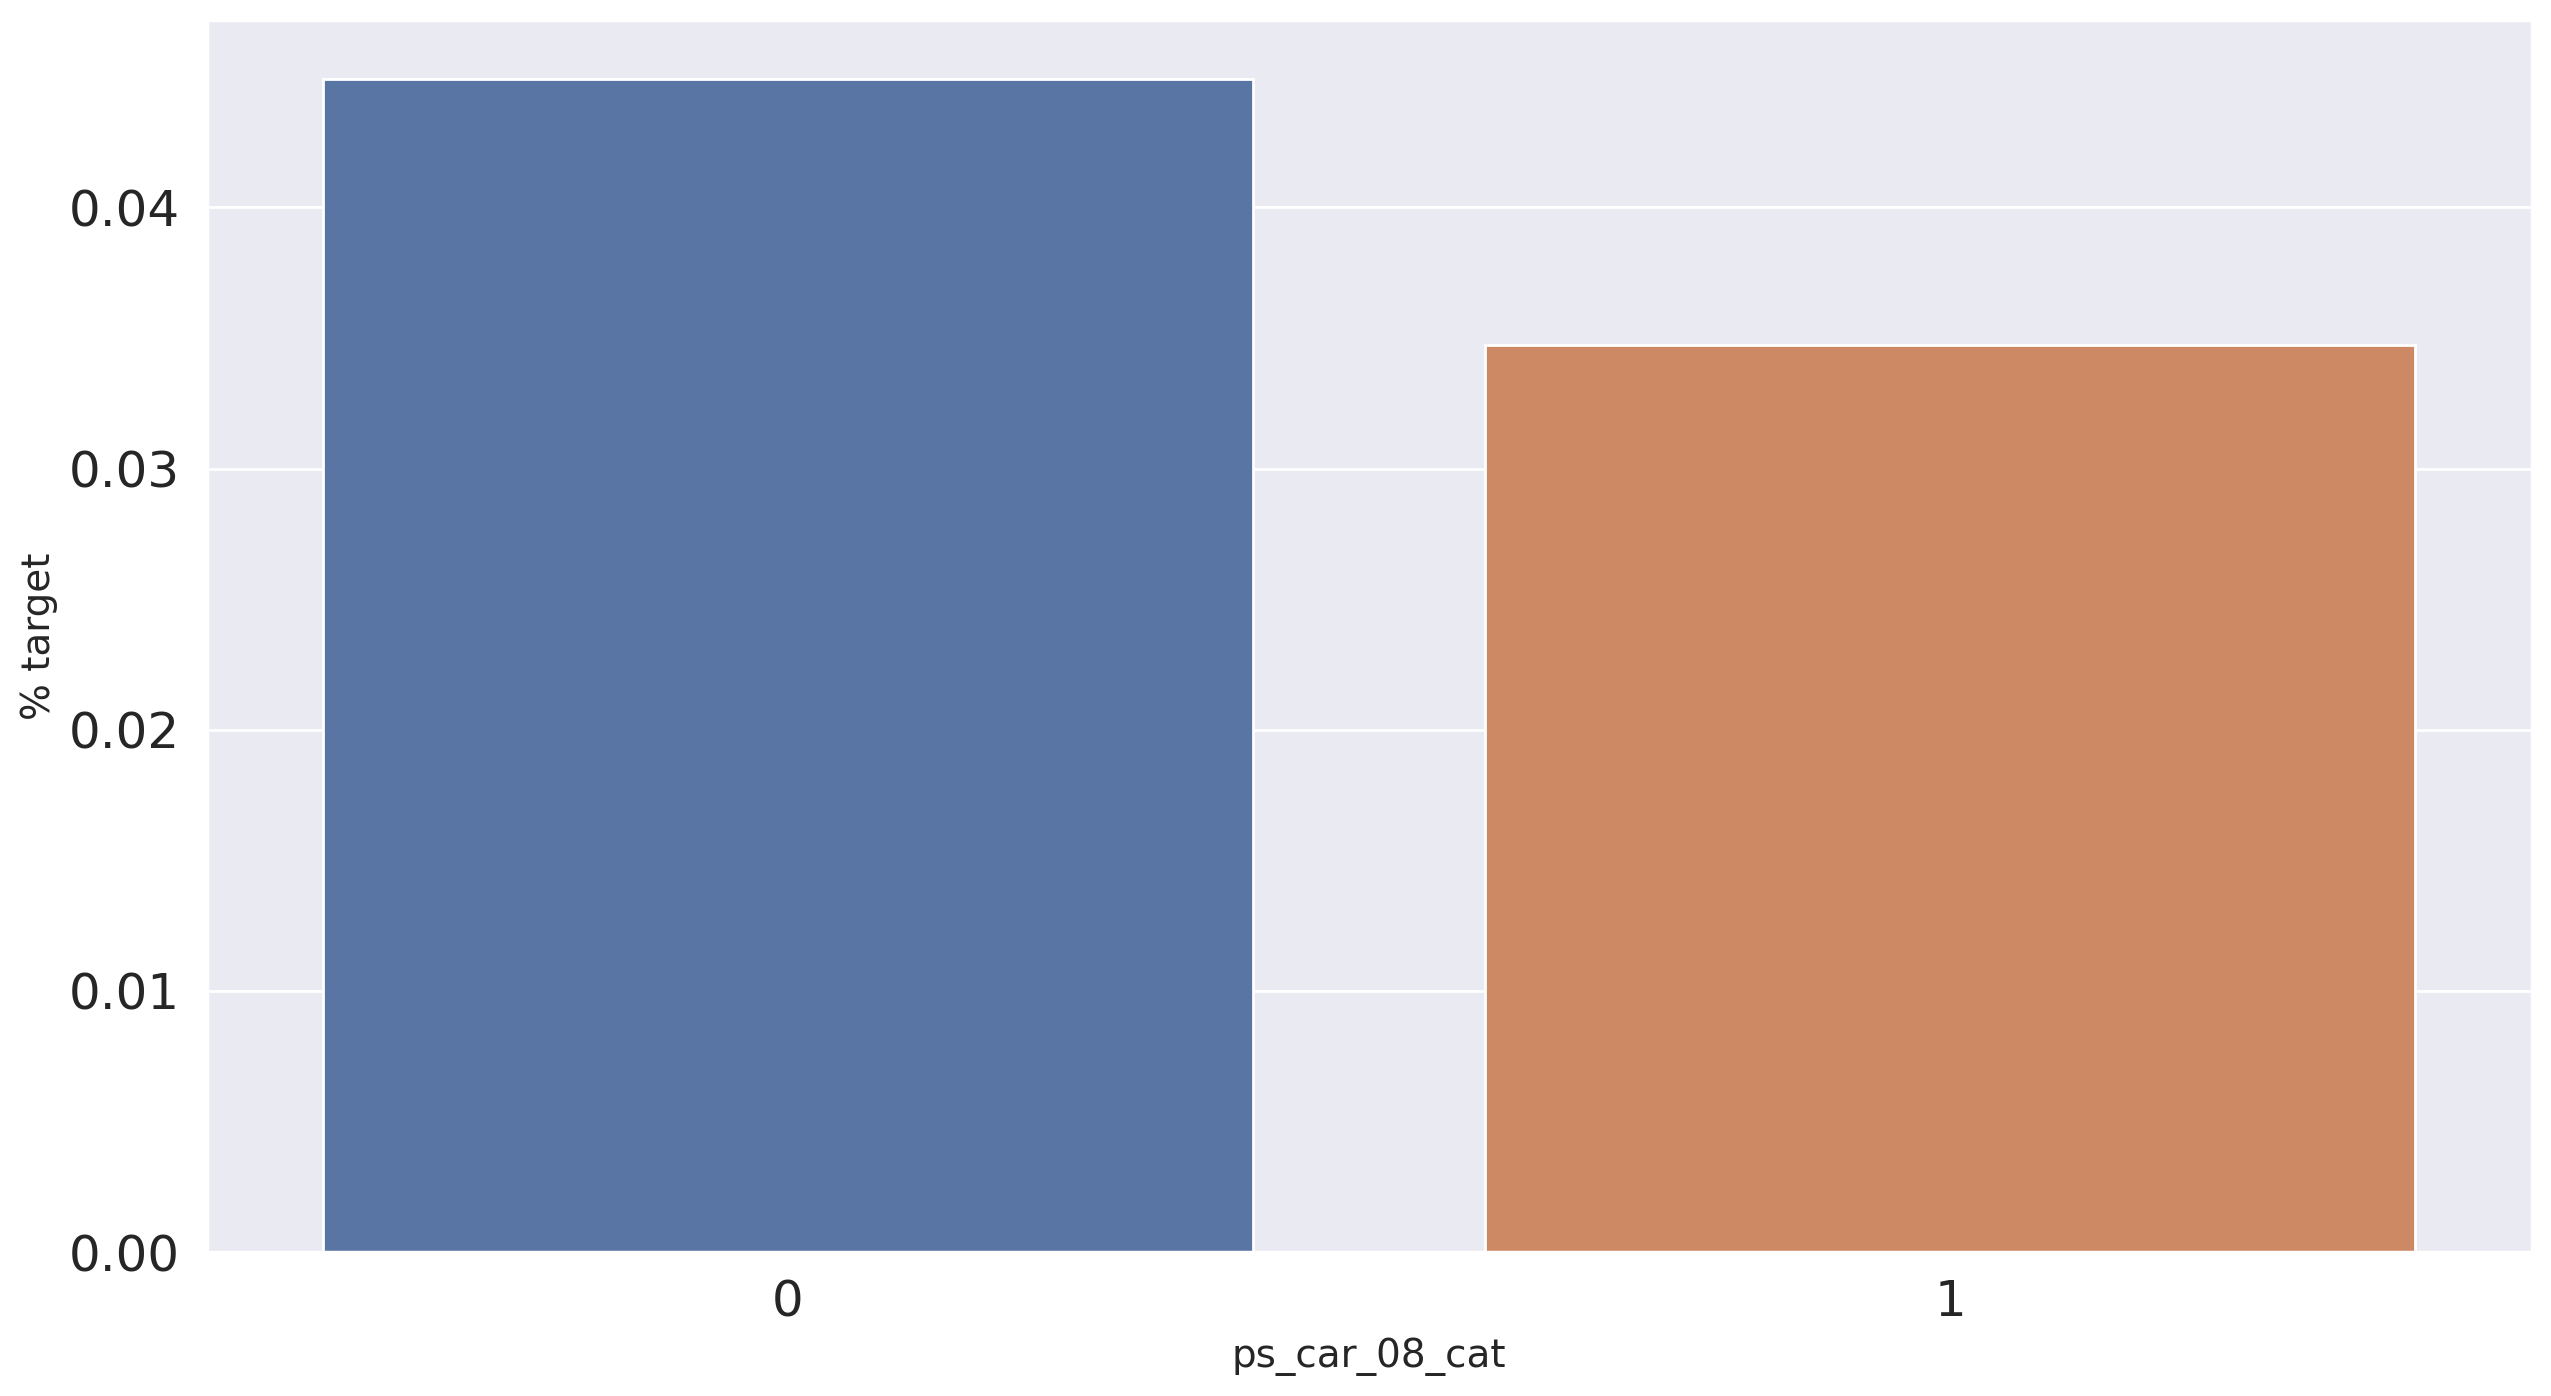

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

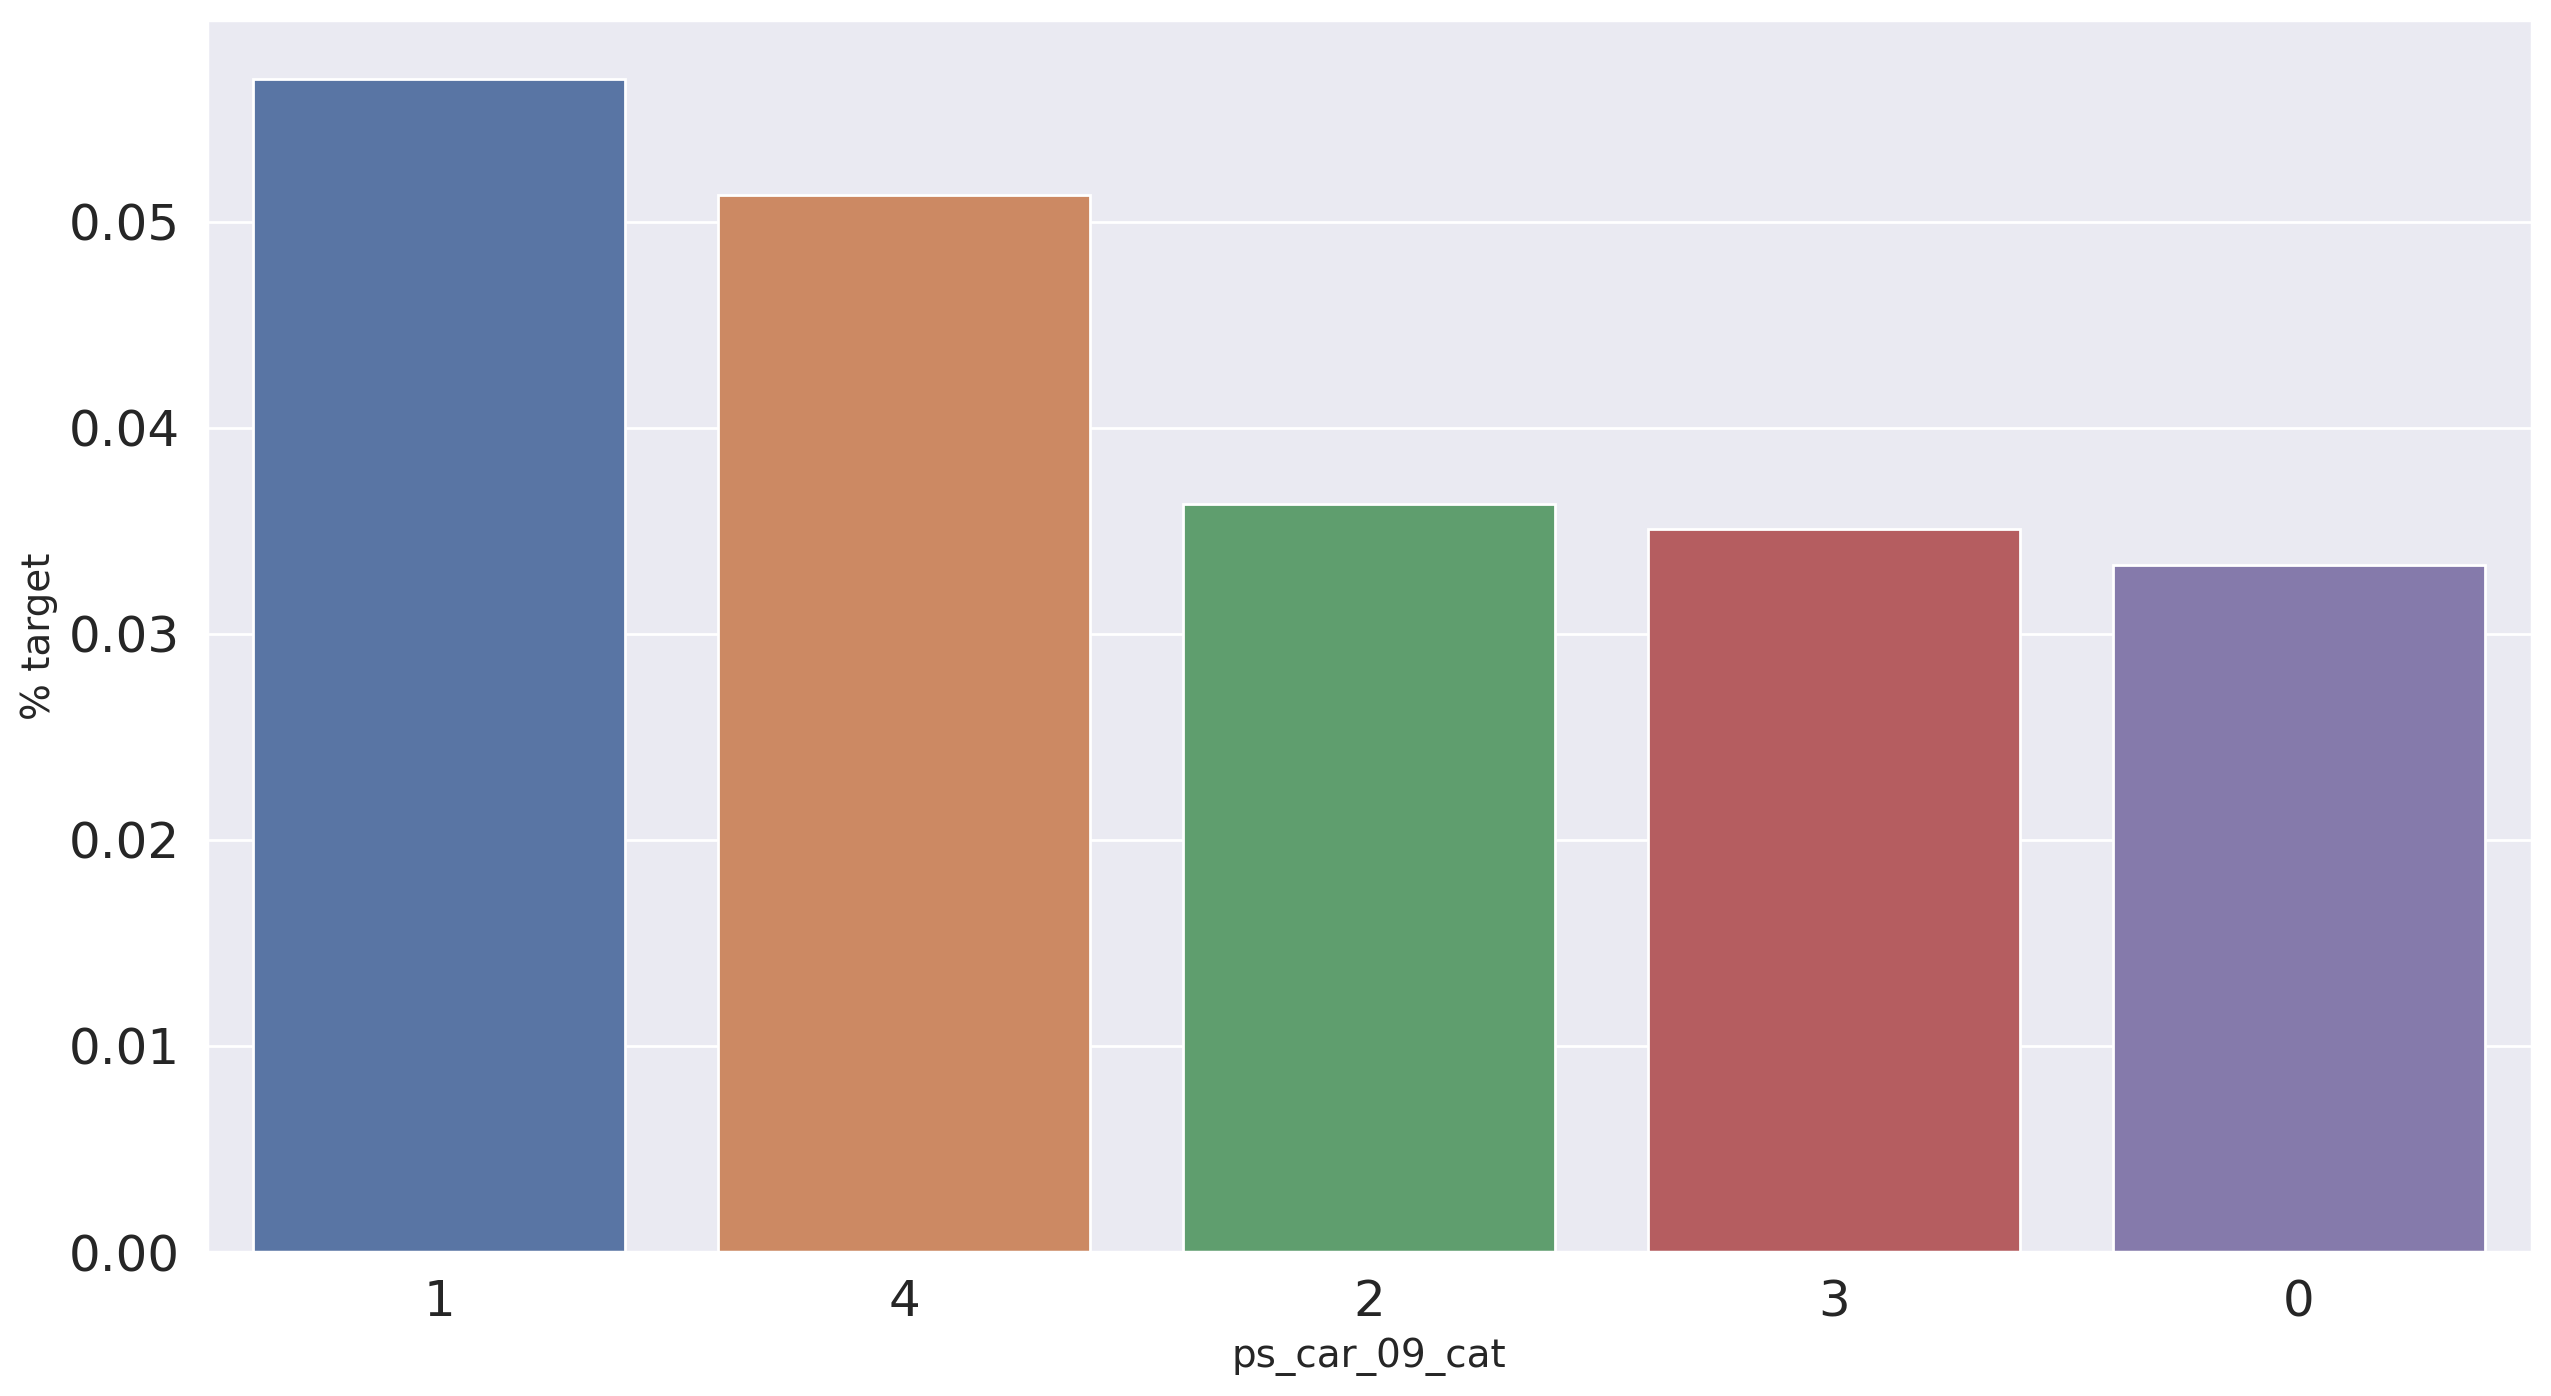

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

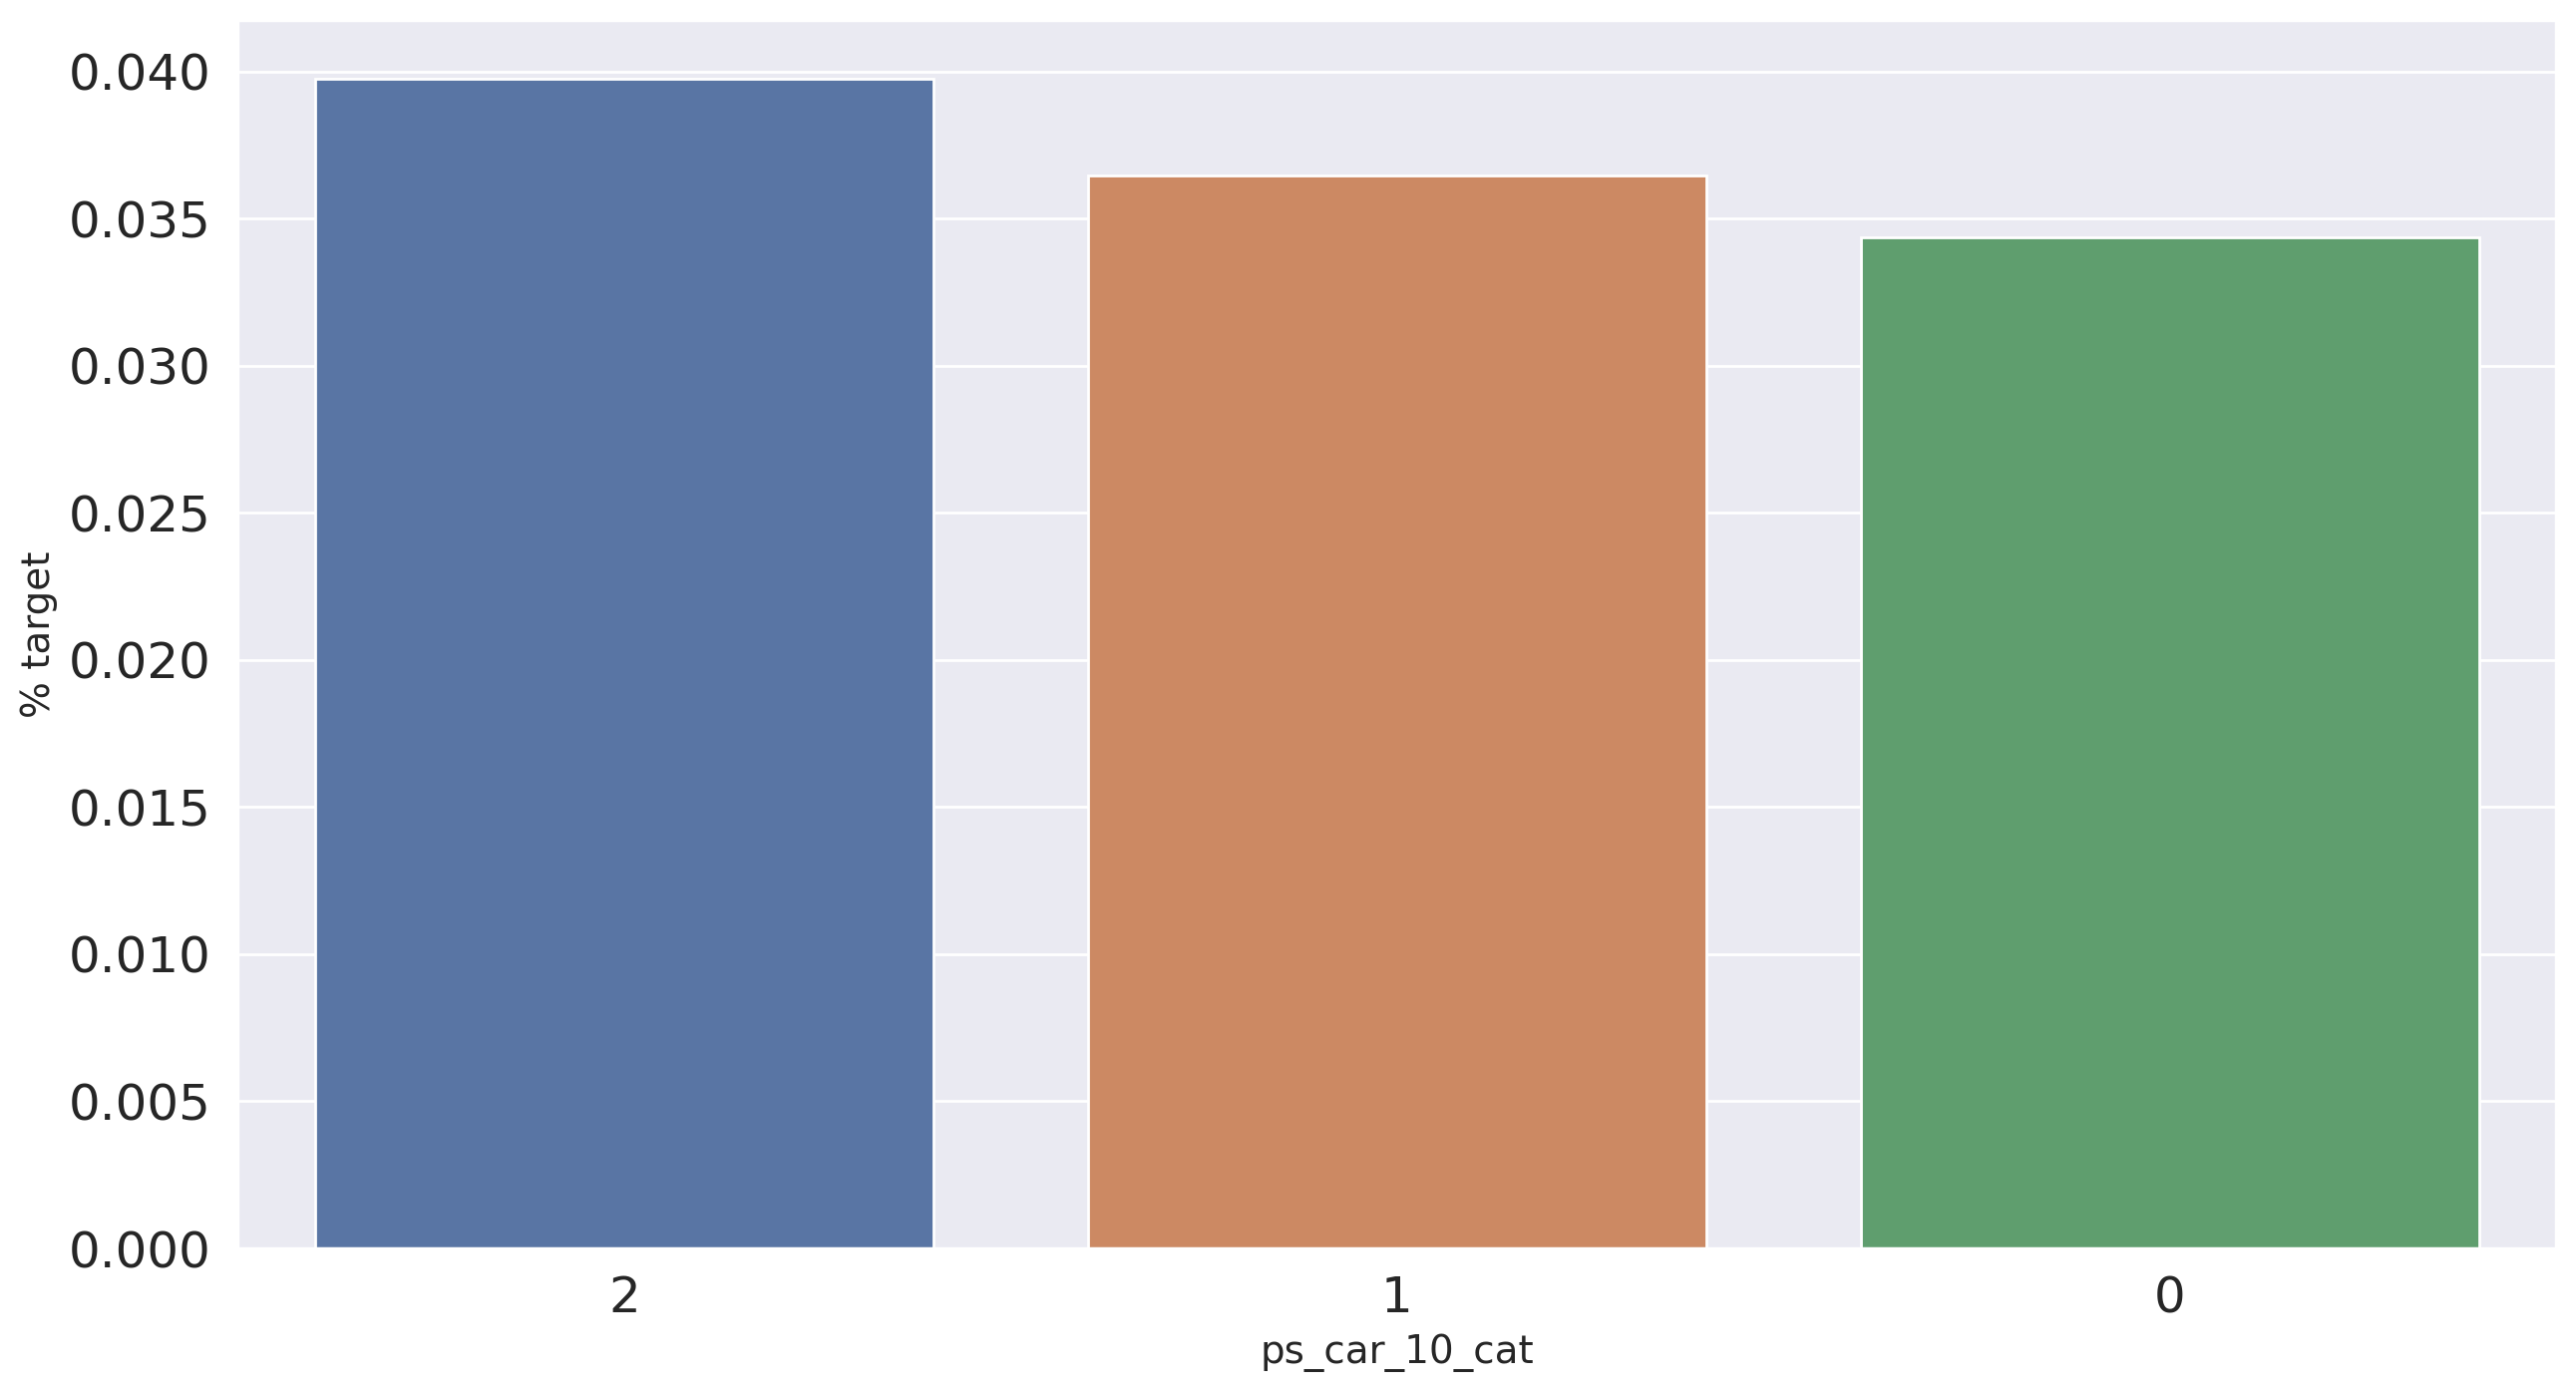

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

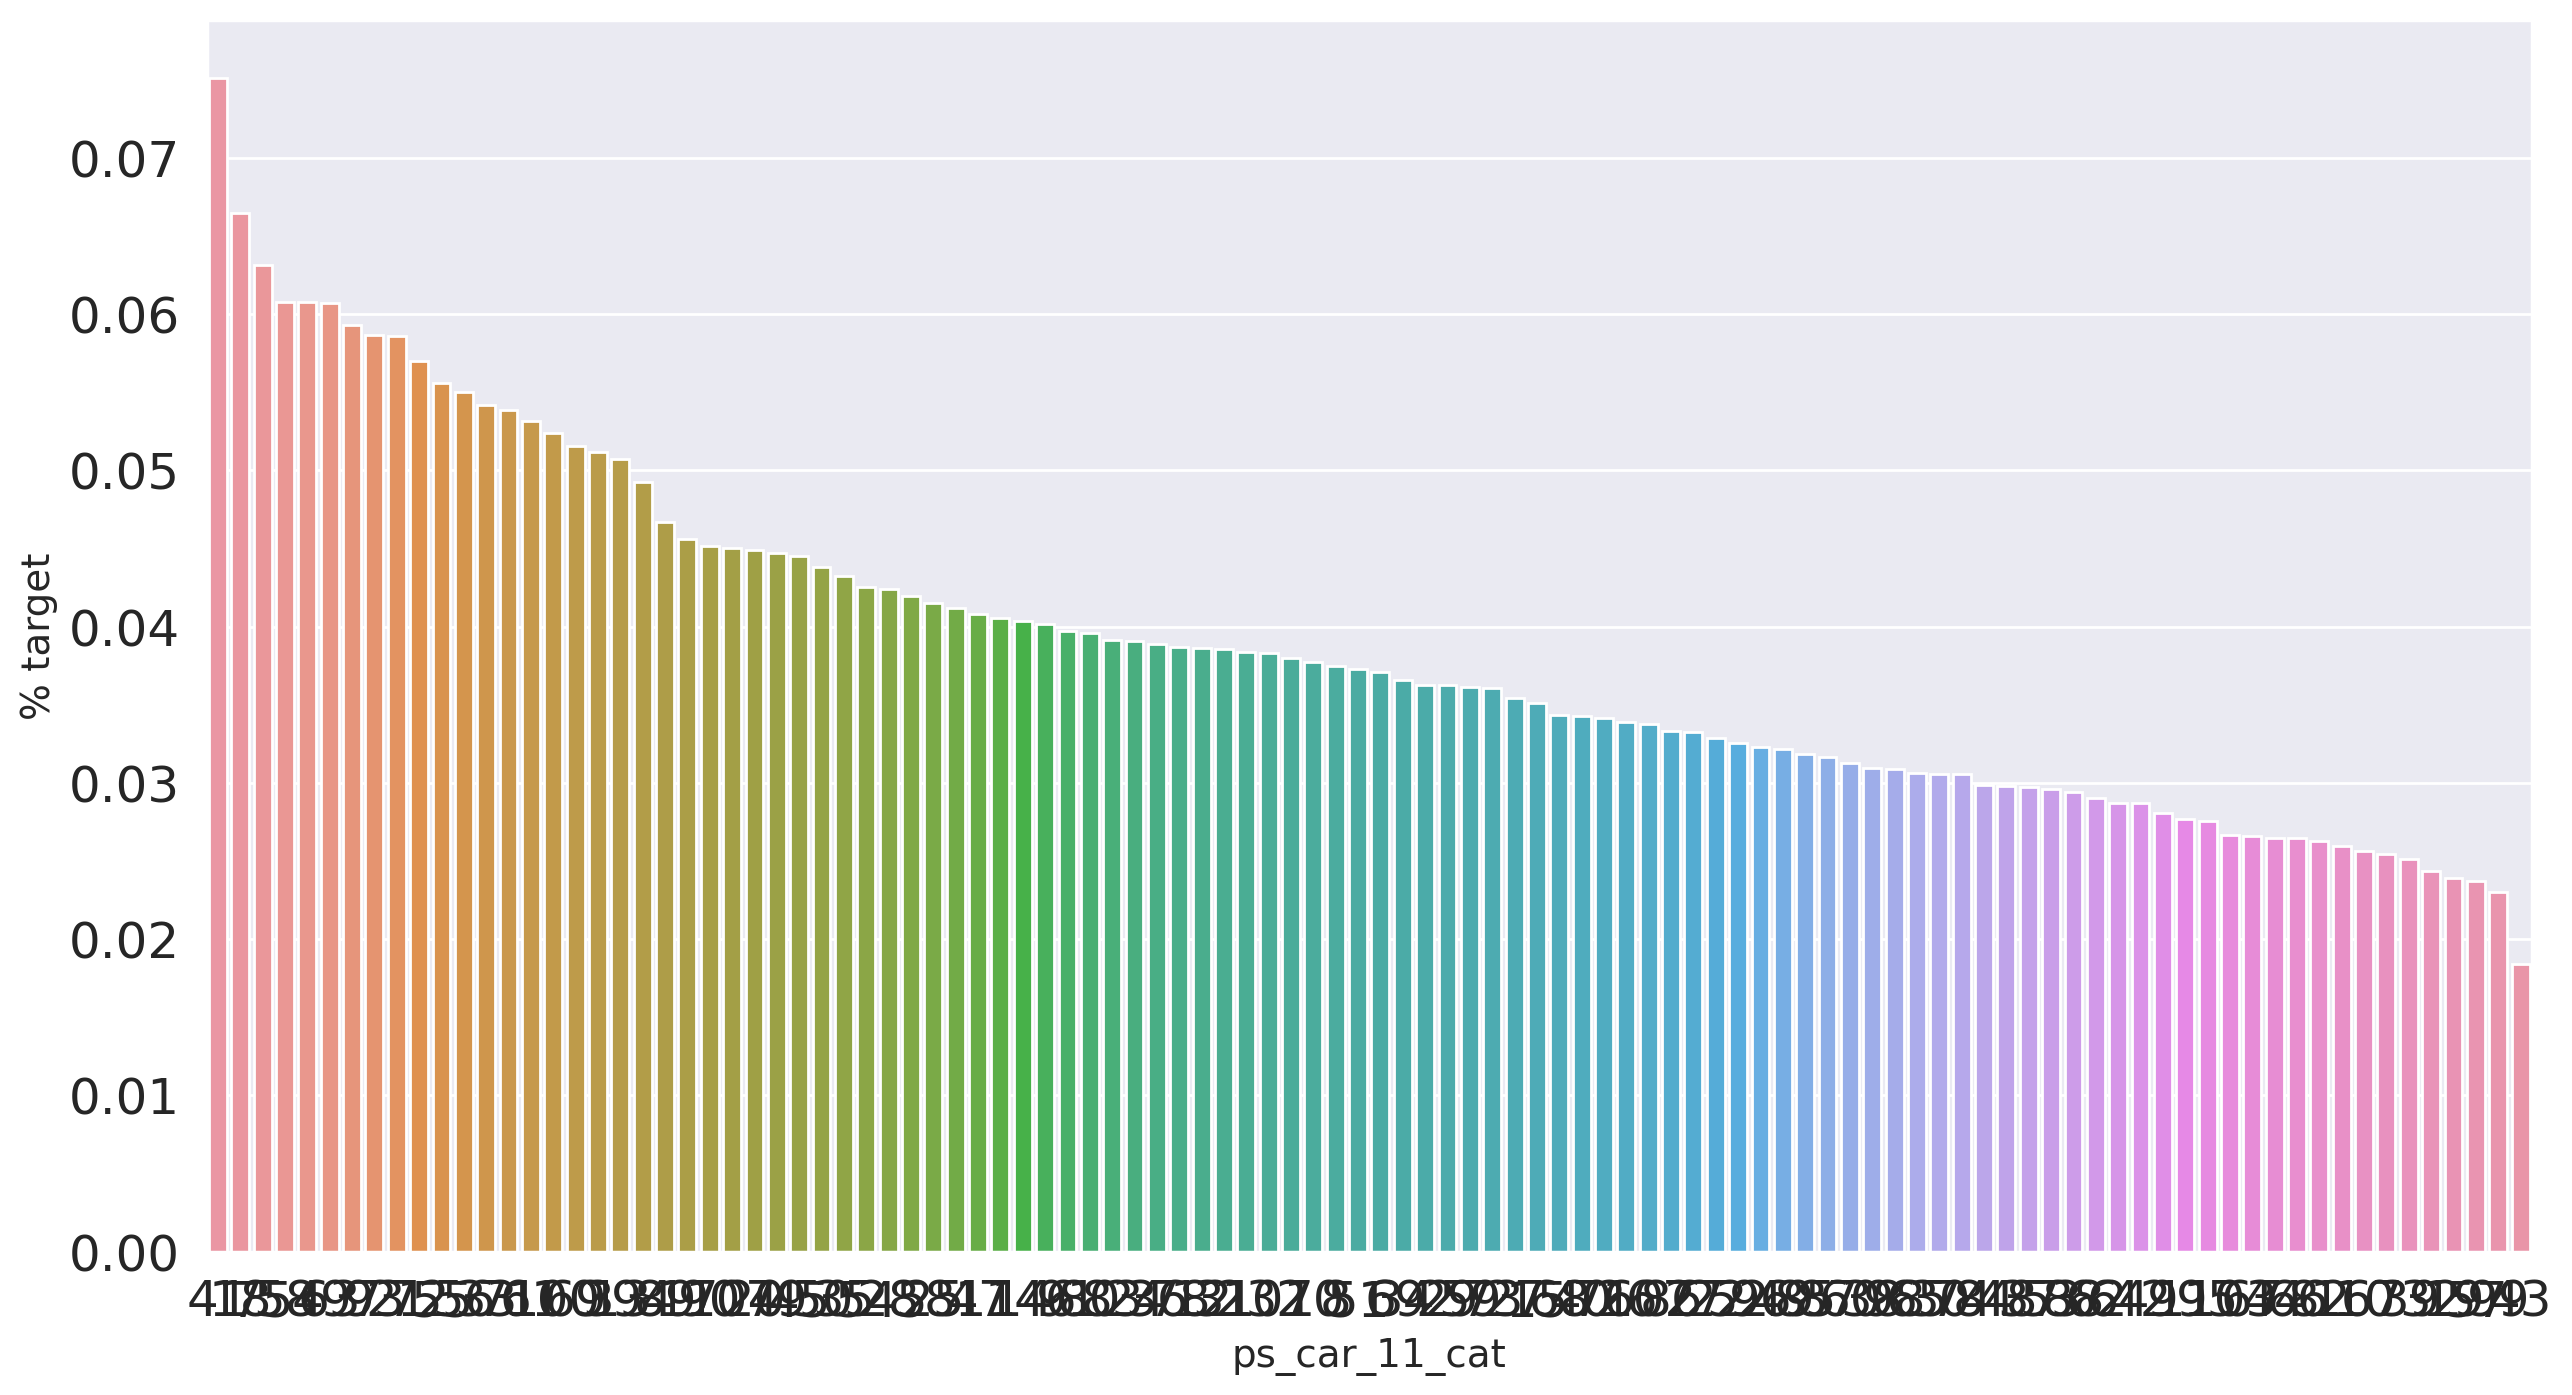

<Figure size 700x700 with 0 Axes>

In [84]:
v = meta[(meta.Feature_Type == 'categorical') & (meta.Keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 8))

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=14)
    plt.xlabel(f, fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()
    plt.tight_layout()

### Question 8 - Target Data Proportional or not?
<ul>
<li> After calculating the mean of the Target column, we find that only <b>3.64%</b> of people have filed the claim
<li> This shows that data is <b>not proportional rather highly imbalanced

In [85]:
x = statistics.mean(train.target)

print('Percentage of people who have claimed the insurance : {0}%\n'.format(
    round(x*100, 2)))

Percentage of people who have claimed the insurance : 3.64%



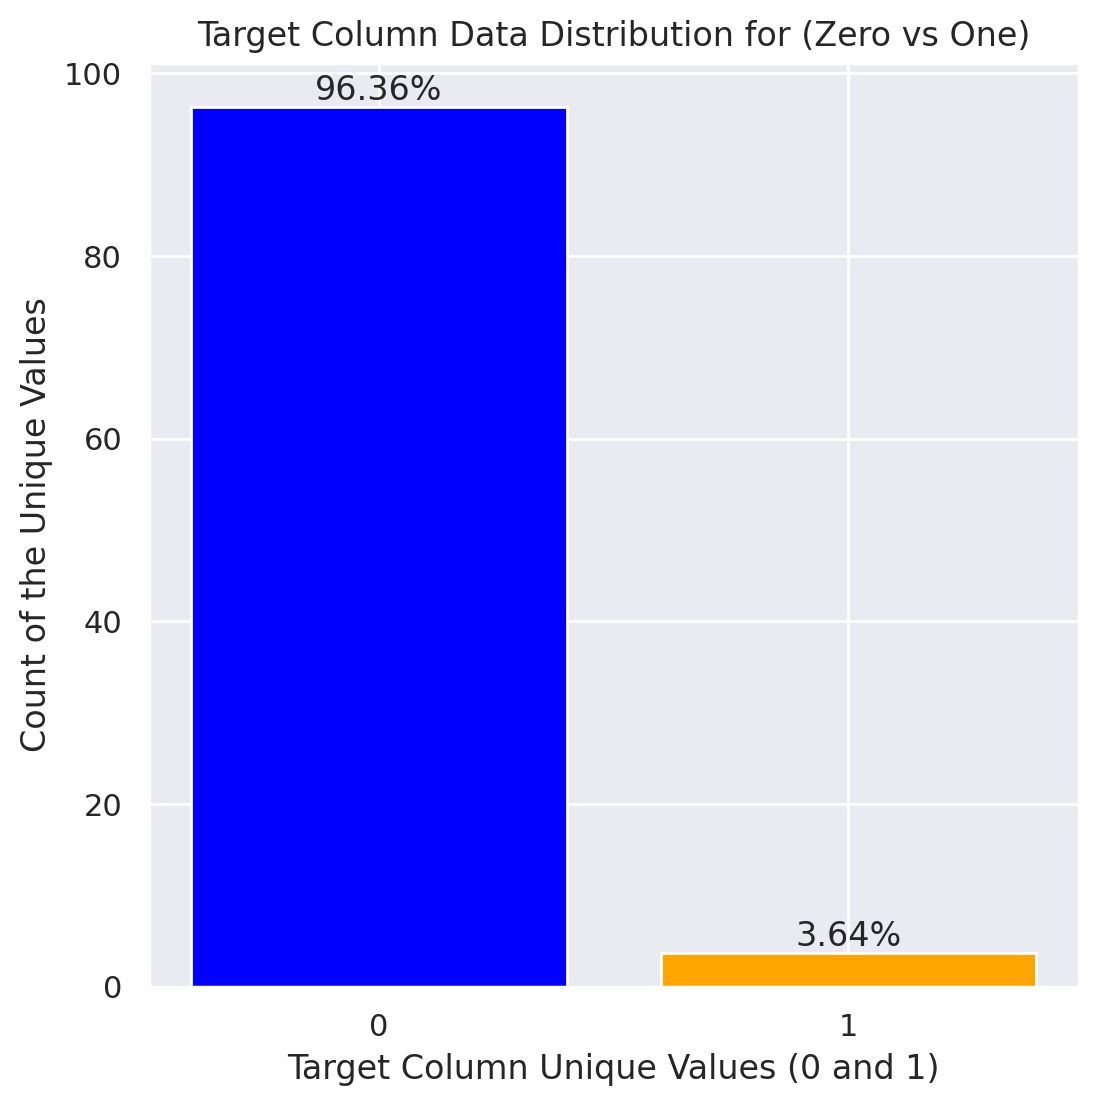

In [86]:
total_count = unique_df['Counts'].sum()

# Calculate percentages
unique_df['Percentage'] = (unique_df['Counts'] / total_count) * 100

# Create a bar plot with percentages and annotations
plt.figure(figsize=(6, 6))
bars = plt.bar(unique_df.index.astype(str), unique_df['Percentage'], color=['blue', 'orange'])

# Annotate bars with exact percentage values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel('Target Column Unique Values (0 and 1)')
plt.ylabel('Count of the Unique Values')
plt.title('Target Column Data Distribution for (Zero vs One)')
plt.show()

### Question 9 - Balancing the data
<ul>
<li> Calimed Insurance count (represented by 1 - minority class) is <b>21694</b>
<li> Unclaimed Insurance (represented by 1 - majority class) is <b>573518</b>
<li> Hence only <b>3.6% people have claimed the insurance</b>
<li> The data is <b>heavily imbalanced</b> (96.36% unclaimed vs 3.64% claimed)
<ul>
<li> This can lead to a model that has great accuracy but does have any added value in practice.
</ul>
<li> In order to balance the data, we will need to use <b> resampling technique </b>
<ul>
<li> Resampling is a methodology of economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter
<ul>
<li> <b>Undersampling</b>- it means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced
<li> <b>Oversampling</b>- it means using replicating the data of minority class (fraud class) so that we can have a balanced data
<li> <b>SMOTE</b>- it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data
</ul>
</ul>

### Question 10 - Number of training records after achieving balance of 12%
<ul>
<li> We need to downsample the insurance not claimed for 12% and leave insurance claimed untouched.
<li> Here we are calculating only the count and not actually performing downsampling. That will be done at the later stage.

In [87]:
# Counts per target feature (ct)
tar_cnt = train.target.value_counts()
print(
    f'Total Records: {train.shape[0]} | Unclaimed: {tar_cnt[0]} | Claimed: {tar_cnt[1]}')

# Total -(minus) Claimed (tt)
tot_cla = train.shape[0] - tar_cnt[1]

# Total Unclaimed to get 12% Balance (uc)
un_cla = np.floor(tot_cla * 0.88).astype(int)

print(f'\nTraining Records after achieving 12% balance ratio = {un_cla}')

Total Records: 595212 | Unclaimed: 573518 | Claimed: 21694

Training Records after achieving 12% balance ratio = 504695


<b> Checking for the number of uniques values per column </b>
<ul>
<li> We will be looking specifically for categorical column because the <b>higher number of unique values in categorical columns will lead to those many number of individual columns after One Hot Encoding.</b>
<li> The idea is to avoid <b>Curse of Dimensionality</b> - So, we will perform label encoding of the categorical column with highest number of unique values.
<ul>
<li> In our case, our target column <b>ps_car_11_cat</b> has <b>104</b> unique value.

In [88]:
train.nunique(dropna=True).sort_values(ascending=False).head(10)

id               595212
ps_car_13         70482
ps_reg_03          5013
ps_car_14           850
ps_car_12           184
ps_car_11_cat       104
ps_calc_10           26
ps_calc_14           24
ps_calc_11           20
ps_reg_02            19
dtype: int64

<b>Performing LabelEncoding for the column</b> ps_car_11_cat

In [89]:
le = LabelEncoder()
train.ps_car_11_cat = le.fit_transform(train['ps_car_11_cat'])
train.head()

id  target  ps_ind_01 ps_ind_02_cat  ps_ind_03 ps_ind_04_cat ps_ind_05_cat  \
0   7       0          2             2          5             1             0   
1   9       0          1             1          7             0             0   
2  13       0          5             4          9             1             0   
3  16       0          0             1          2             0             0   
4  17       0          0             2          0             1             0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  ps_ind_15  \
0              0              0              0          0         11   
1              0              0              0          0          3   
2              0              0              0          0         12   
3              0              0              0          0          8   
4              0              0              0          0          9   

   ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
0              0              1              0        0.7        0.2   
1              0              0              1        0.8        0.4   
2              1              0              0        0.0        0.0   
3              1              0              0        0.9        0.2   
4              1              0              0        0.7        0.6   

   ps_reg_03 ps_car_01_cat ps_car_02_cat ps_car_03_cat ps_car_04_cat  \
0   0.718070            10             1           NaN             0   
1   0.766078            11             1           NaN             0   
2  -1.000000             7             1           NaN             0   
3   0.580948             7             1             0             0   
4   0.840759            11             1           NaN             0   

  ps_car_05_cat ps_car_06_cat ps_car_07_cat ps_car_08_cat ps_car_09_cat  \
0             1             4             1             0             0   
1           NaN            11             1             1             2   
2           NaN            14             1             1             2   
3             1            11             1             1             3   
4           NaN            14             1             1             2   

  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  ps_car_14  \
0             1              8          2   0.400000   0.883679   0.370810   
1             1             15          3   0.316228   0.618817   0.388716   
2             1             61          1   0.316228   0.641586   0.347275   
3             1              6          1   0.374166   0.542949   0.294958   
4             1             85          3   0.316070   0.565832   0.365103   

   ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  \
0   3.605551         0.6         0.5         0.2           3           1   
1   2.449490         0.3         0.1         0.3           2           1   
2   3.316625         0.5         0.7         0.1           2           2   
3   2.000000         0.6         0.9         0.1           2           4   
4   2.000000         0.4         0.6         0.0           2           2   

   ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10  ps_calc_11  \
0          10           1          10           1           5           9   
1           9           5           8           1           7           3   
2           9           1           8           2           7           4   
3           7           1           8           4  

In [90]:
print('The dimension of the Dataframe after Label Encoding is:', train.shape)

The dimension of the Dataframe after Label Encoding is: (595212, 59)


### Question 11 - Features with most missing values
<ul>
<li> Top two features with most missing values <i>(these features can be dropped)</i>
<ul>
<li> <b>ps_car_03_cat</b> (69.09%)
<li> <b>ps_car_05_cat</b> (44.78%)

In [91]:
print('Top two features with most missing value counts are')
train.isna().sum().sort_values(ascending=False).head(2)

Top two features with most missing value counts are


ps_car_03_cat    411231
ps_car_05_cat    266551
dtype: int64

In [92]:
# Assuming df is your DataFrame and column_name is the name of the column you want to analyze
column_name = 'ps_car_03_cat'  # Replace 'your_column_name' with the actual column name

# Calculate the percentage of missing values
percentage_missing = train[column_name].isnull().mean() * 100

print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")

Percentage of missing values in 'ps_car_03_cat': 69.09%


In [93]:
# Assuming df is your DataFrame and column_name is the name of the column you want to analyze
column_name = 'ps_car_05_cat'  # Replace 'your_column_name' with the actual column name

# Calculate the percentage of missing values
percentage_missing = train[column_name].isnull().mean() * 100

print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")

Percentage of missing values in 'ps_car_05_cat': 44.78%


In [94]:
# Assuming df is your DataFrame and column_name is the name of the column you want to analyze
column_name = 'ps_car_07_cat'  # Replace 'your_column_name' with the actual column name

# Calculate the percentage of missing values
percentage_missing = train[column_name].isnull().mean() * 100

print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")

Percentage of missing values in 'ps_car_07_cat': 1.93%


In [95]:
# Assuming df is your DataFrame and column_name is the name of the column you want to analyze
column_name = 'ps_ind_05_cat'  # Replace 'your_column_name' with the actual column name

# Calculate the percentage of missing values
percentage_missing = train[column_name].isnull().mean() * 100

print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")

Percentage of missing values in 'ps_ind_05_cat': 0.98%


### Question 12 - Total number of Features with missing values
<ul>
<li> 12 variables with missing features

In [98]:
ft_miss = pd.DataFrame(
    train.isna().sum().sort_values(ascending=False).head(12))

ft_miss.reset_index(inplace=True)

ft_miss.columns = ['Feature Name', 'Missing Values Count']

num_mvals = len(ft_miss['Missing Values Count'])

print(f'In total, there are {num_mvals} variables with missing values')

In total, there are 12 variables with missing values


### Question 13 - Steps to handle missing data
<ul>
<li> The top 4 features with most missing values are
<ul>
<li> ps_car_03_cat
<li> ps_car_05_cat
<li> ps_car_07_cat
<li> ps_ind_05_cat
</ul>
<li> Instead of imputing the data, we will be dropping these features
<li> We will have to drop the columns that have more than 5% missing values

In [99]:
# Checking for Dataframe shape before dropping the columns
print(f'Shape of data before dropping: {train.shape}')

# Selecting top four columns to drop
col_drop = list(train.isna().sum().sort_values(ascending=False).head(4).index)

# Instead of imputating the values, we are dropping
train.drop(col_drop, inplace=True, axis=1)
train.dropna(inplace=True)
train.drop('id', axis=1, inplace=True)

print(f'\nColumns dropped: {col_drop}')
print(f'\nShape of data after dropping the columns: {train.shape}')

Shape of data before dropping: (595212, 59)

Columns dropped: ['ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_ind_05_cat']

Shape of data after dropping the columns: (594455, 54)


### Question 14 - Interval variables with strong correlation
<ul>
<li> Checking the correlations between interval variables
<li> A heatmap is a good way to visualize the correlation between variables

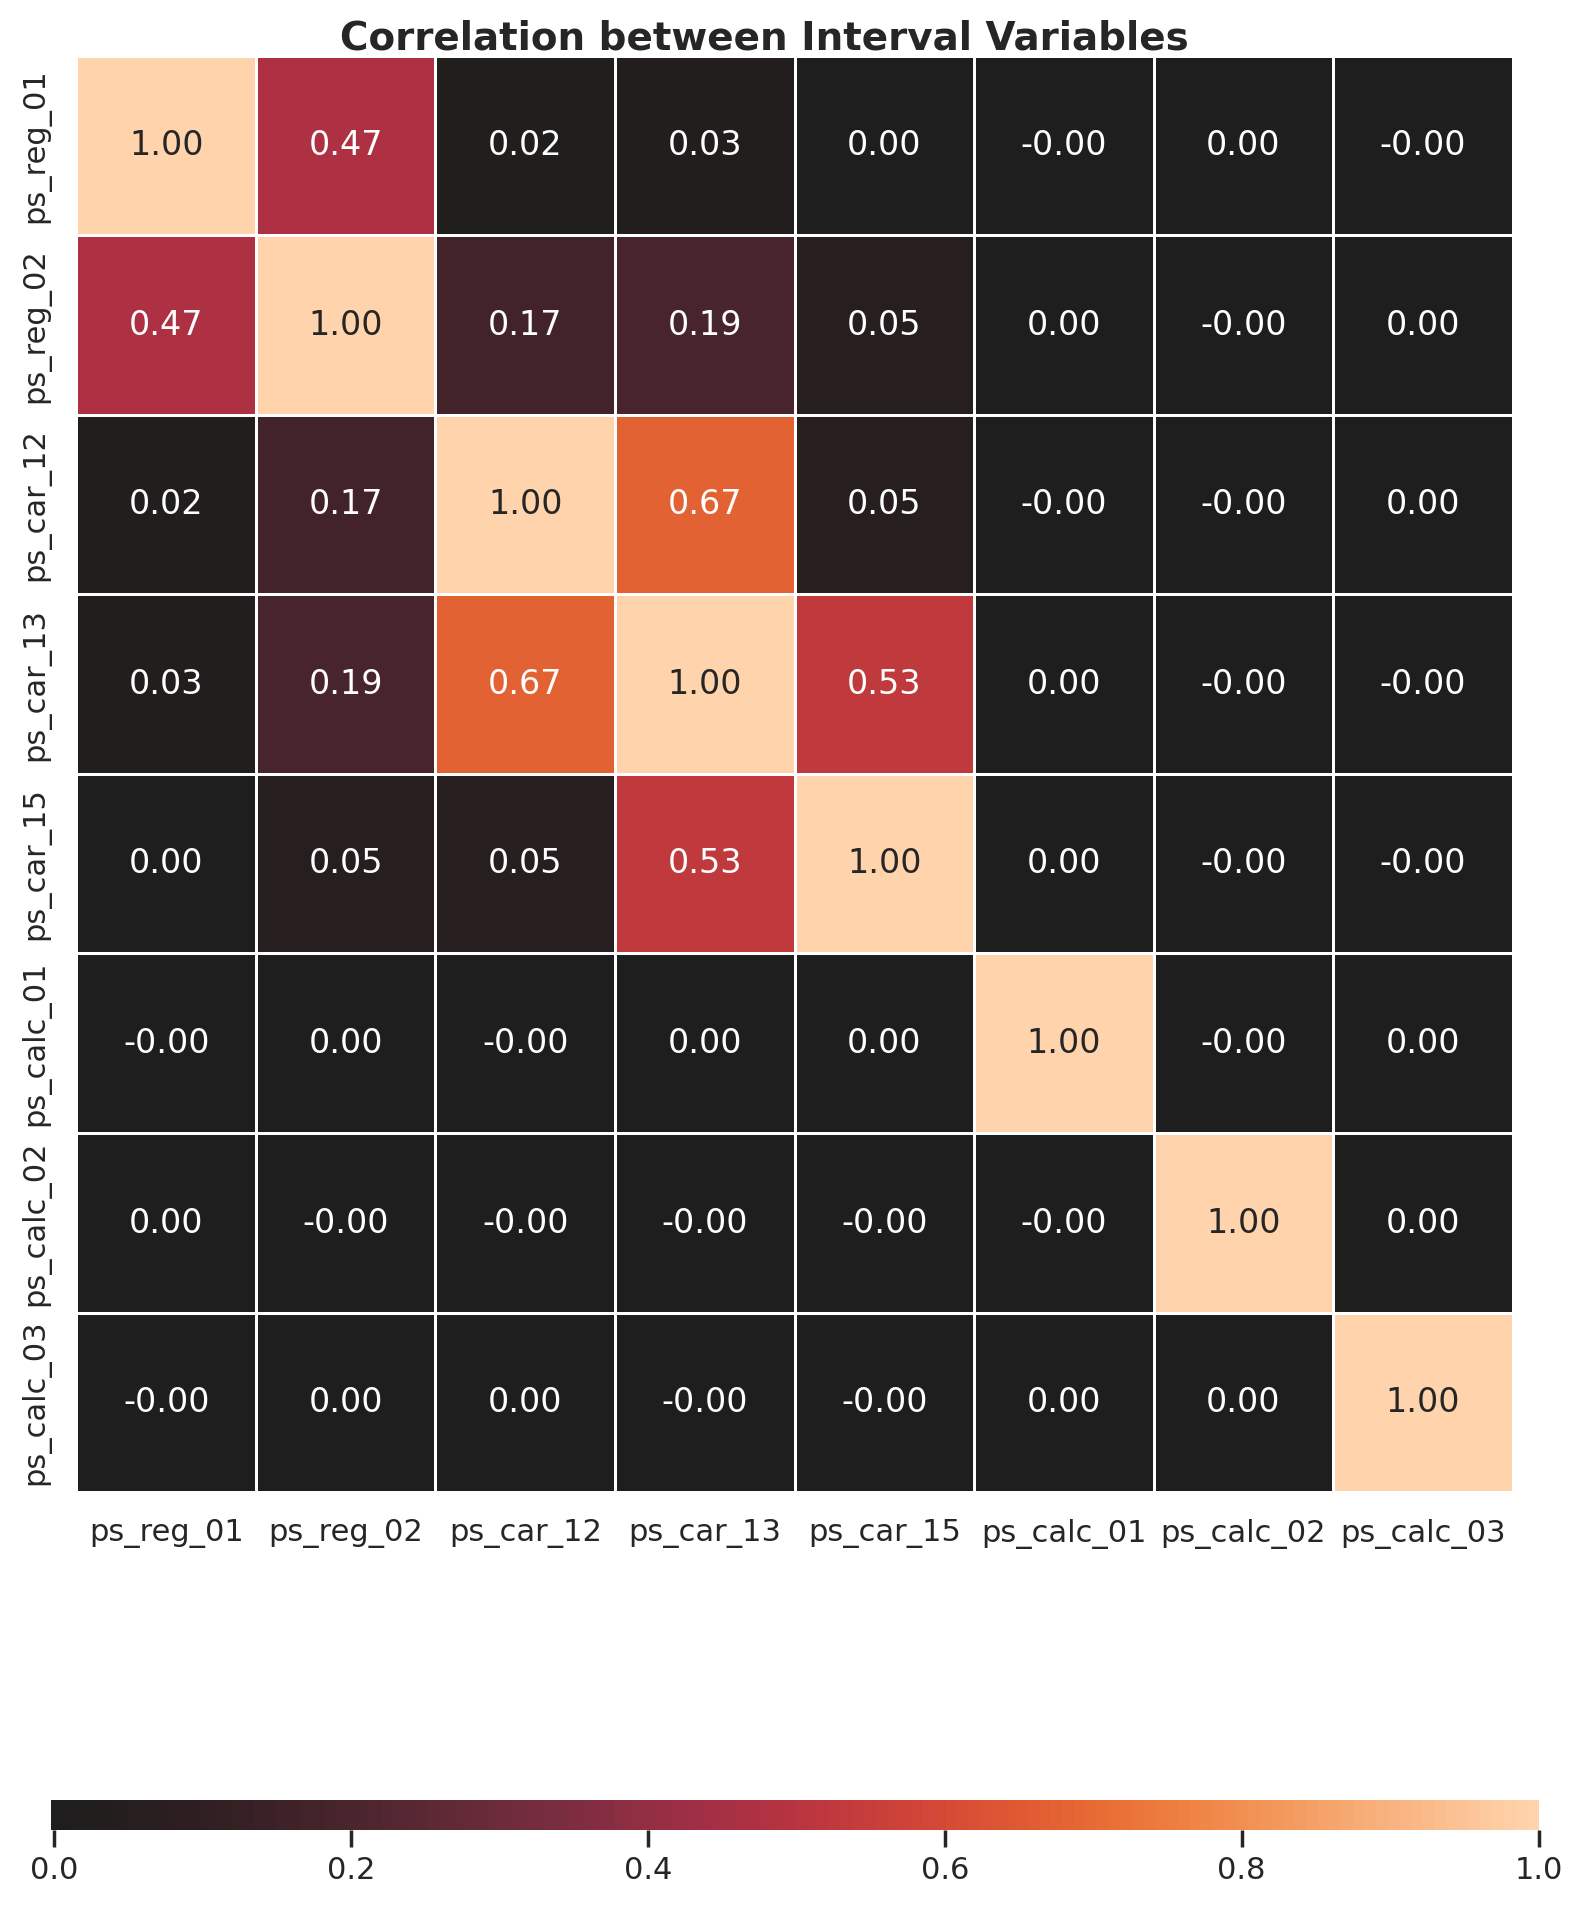

In [100]:
int_list = meta[meta.Feature_Type == 'interval']
flist = list(int_list.index)
flist.remove('ps_reg_03')
flist.remove('ps_car_14')


def intcorr_heatmap(v):
    Var_Corr = train[v].corr()

    fig, ax = plt.subplots(figsize=(12, 12))
    plt.suptitle('Correlation between Interval Variables',
                 fontsize=14, fontweight='bold')
    fig.subplots_adjust(top=.965)
    # setting parameters for Heatmap colorbar
    cbar_kws = {'orientation': "horizontal", 'aspect': 50, 'shrink': .8}

    # plot the heatmap with annotation on it
    sns.heatmap(Var_Corr,
                vmax=1.0,
                center=0,
                square=True,
                xticklabels=Var_Corr.columns,
                yticklabels=Var_Corr.columns,
                annot=True,
                fmt='.2f',
                linewidths=.5,
                cbar_kws=cbar_kws,
                ax=ax)
    plt.show()


# v = meta[(meta.Feature_Type == 'interval') & (meta.Keep)].index
intcorr_heatmap(flist)

<b> Inference about Interval Variable Correlation</b>
<ul>
<li> There are a strong correlations between the variables:
<ul>
<li> ps_reg_01 and ps_reg_02 (0.47)
<li> ps_car_13 and ps_car_15 (0.53)
<li> ps_car_12 and ps_car13 (0.67)

### Question - 15 - Ordinal variables with strong correlation
<ul>
<li> Checking the correlations between ordinal variables.
<li> A heatmap is a good way to visualize the correlation between variables.

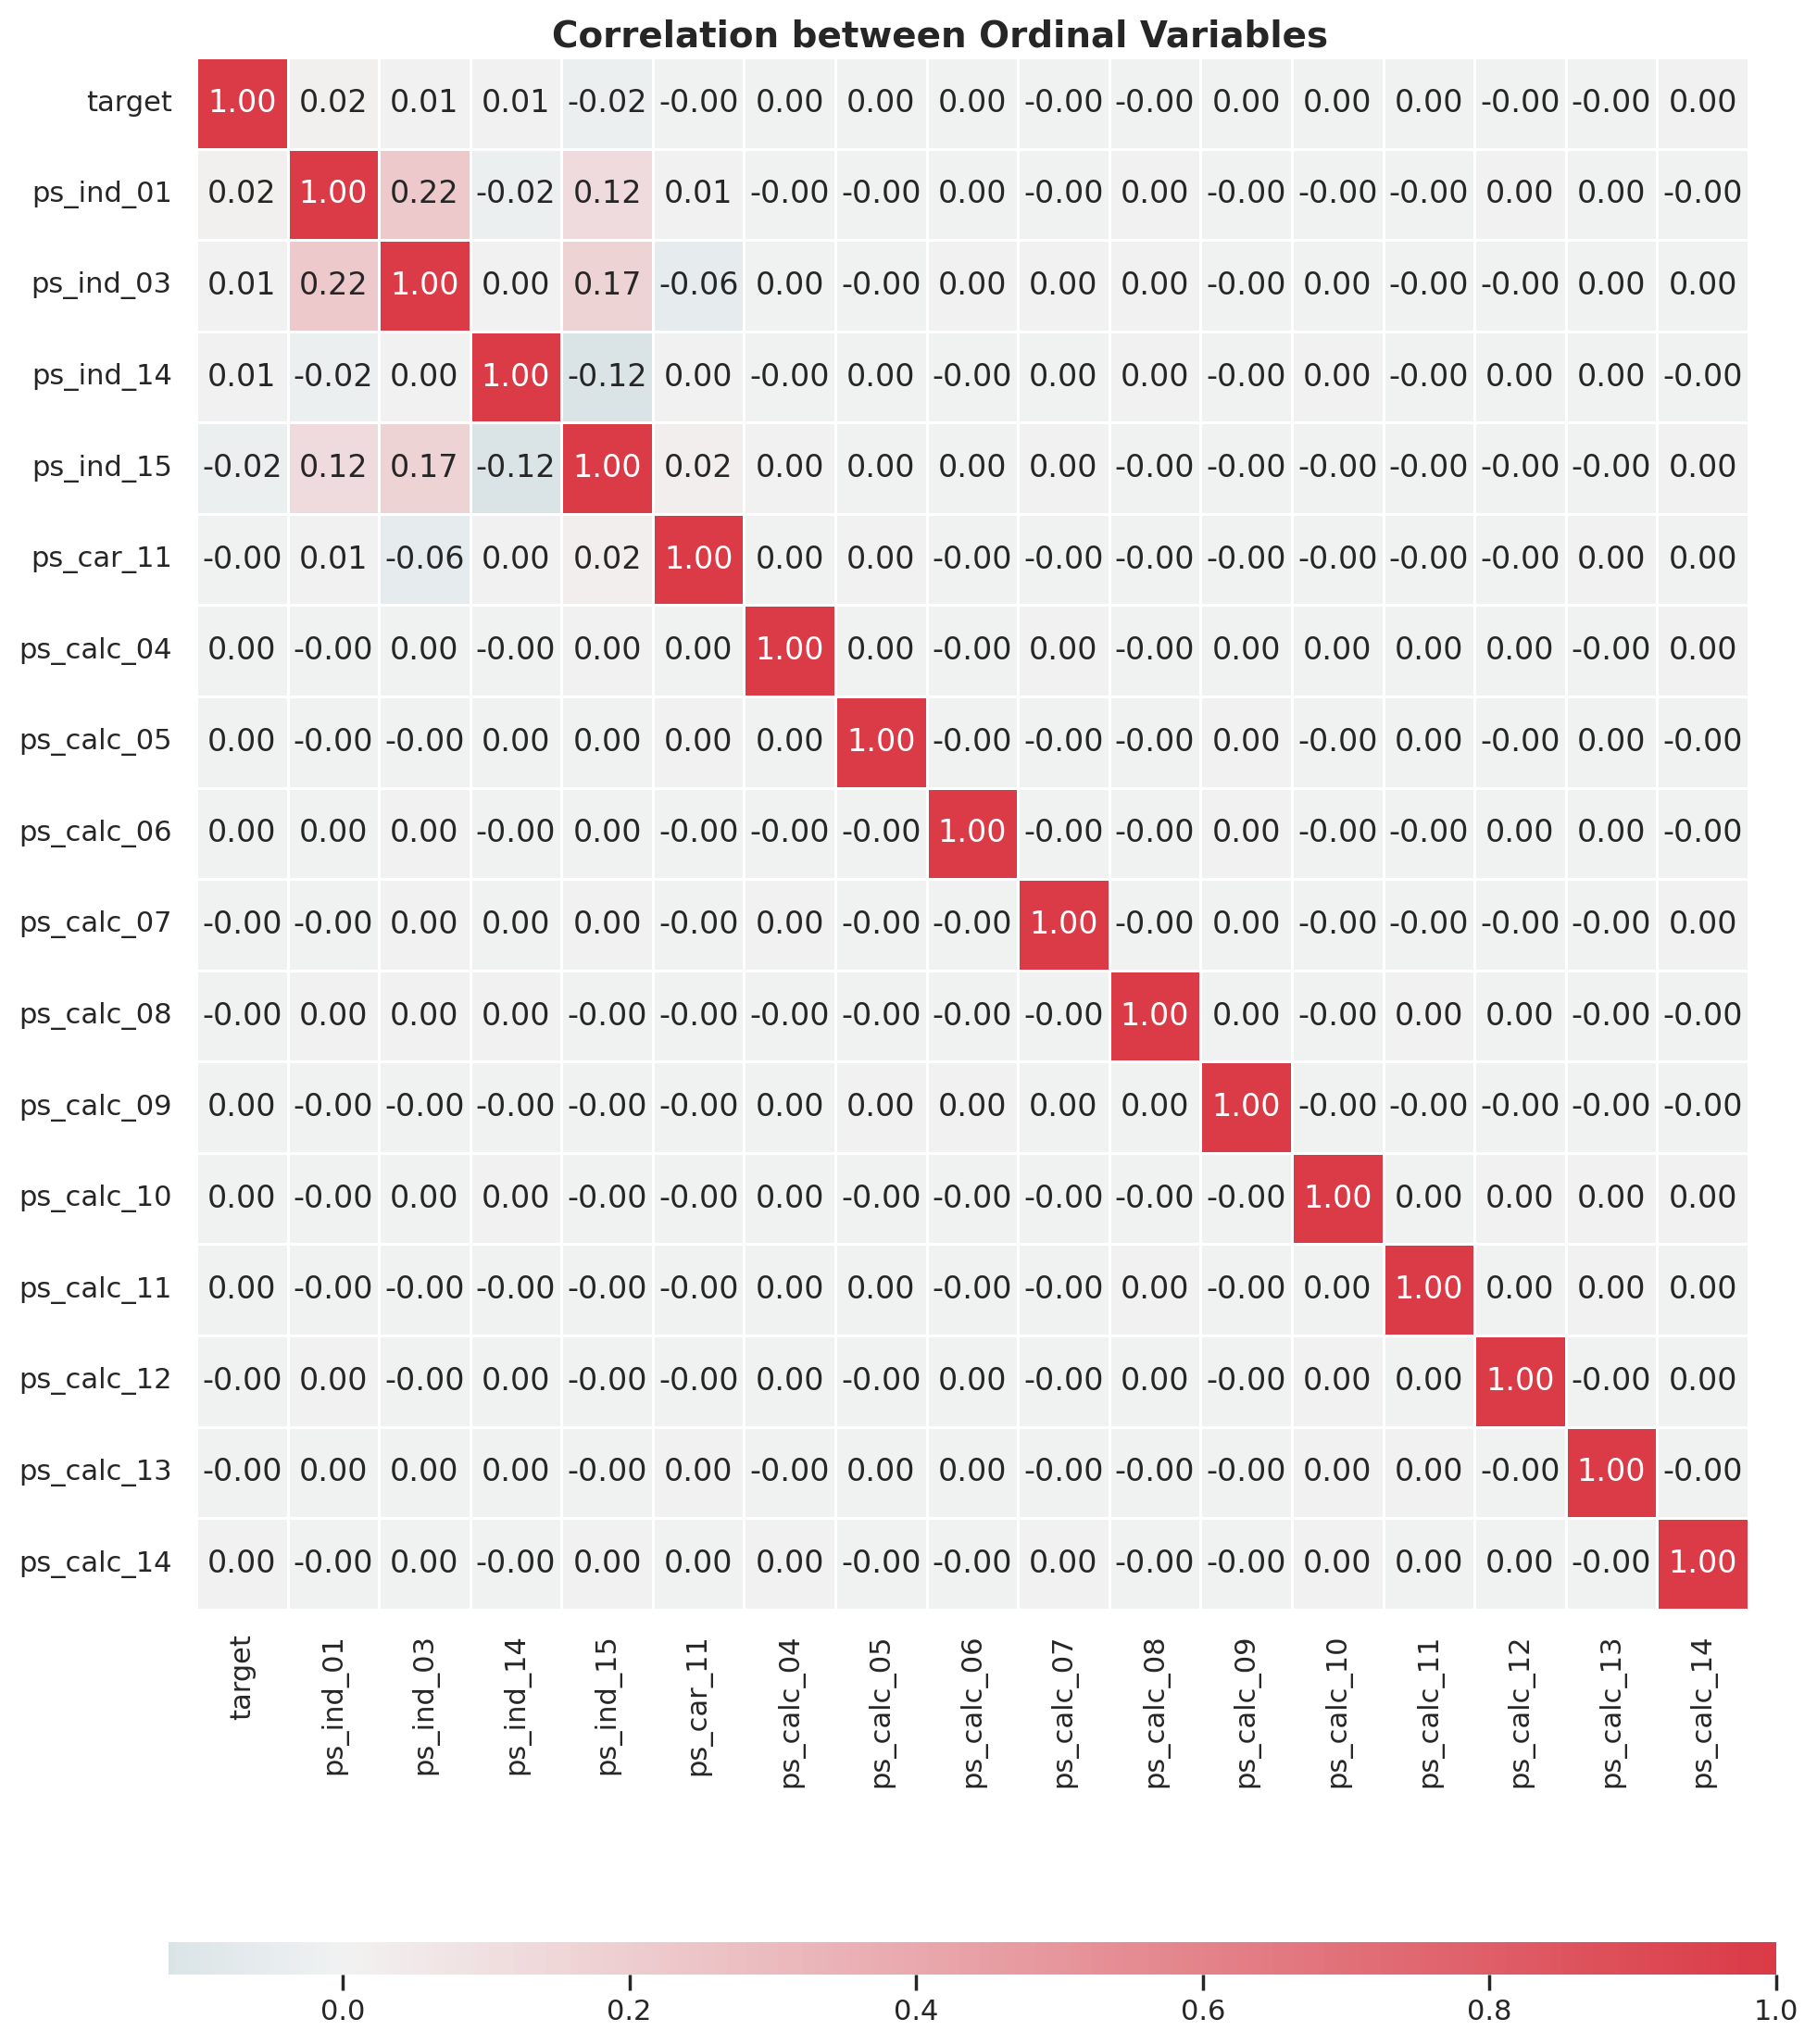

In [101]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(14, 14))
    fig.subplots_adjust(top=.965)
    plt.suptitle('Correlation between Ordinal Variables',
                 fontsize=14, fontweight='bold')
    cbar_kws = {'orientation': "horizontal", 'aspect': 50, 'shrink': .8}
    sns.heatmap(correlations,
                cmap=cmap,
                vmax=1.0,
                center=0,
                fmt='.2f',
                square=True,
                linewidths=.5,
                annot=True,
                cbar_kws=cbar_kws)
    plt.show()


v = meta[(meta.Feature_Type == 'ordinal') & (meta.Keep)].index
corr_heatmap(v)

<b> Inference about Interval Ordinal Correlation </b>
<ul>
<li> Red is positive correlation and Blue is negative correlation
<li> Deeper the color is, stronger the correlation is
<li> We notice that there are no significant/strong correlations between the variables but the correlation we have is
<ul>
<li> ps_ind_01 and ps_ind_03 (0.22)
<li> ps_ind_03 and ps_ind_15 (0.17)
<li> ps_ind_14 and ps_ind_15 (0.12)
</ul>
</ul>

<b>Plotting Correlation Heatmap for complete dataset so that we can determine which columns to keep and which to drop</b>
<ul>
<li> From the below heatmap, we deduce that the correlation between columns with word calc and not bin in them is 0.
<li> Hence we need to drop all the columns with word calc and not bin.

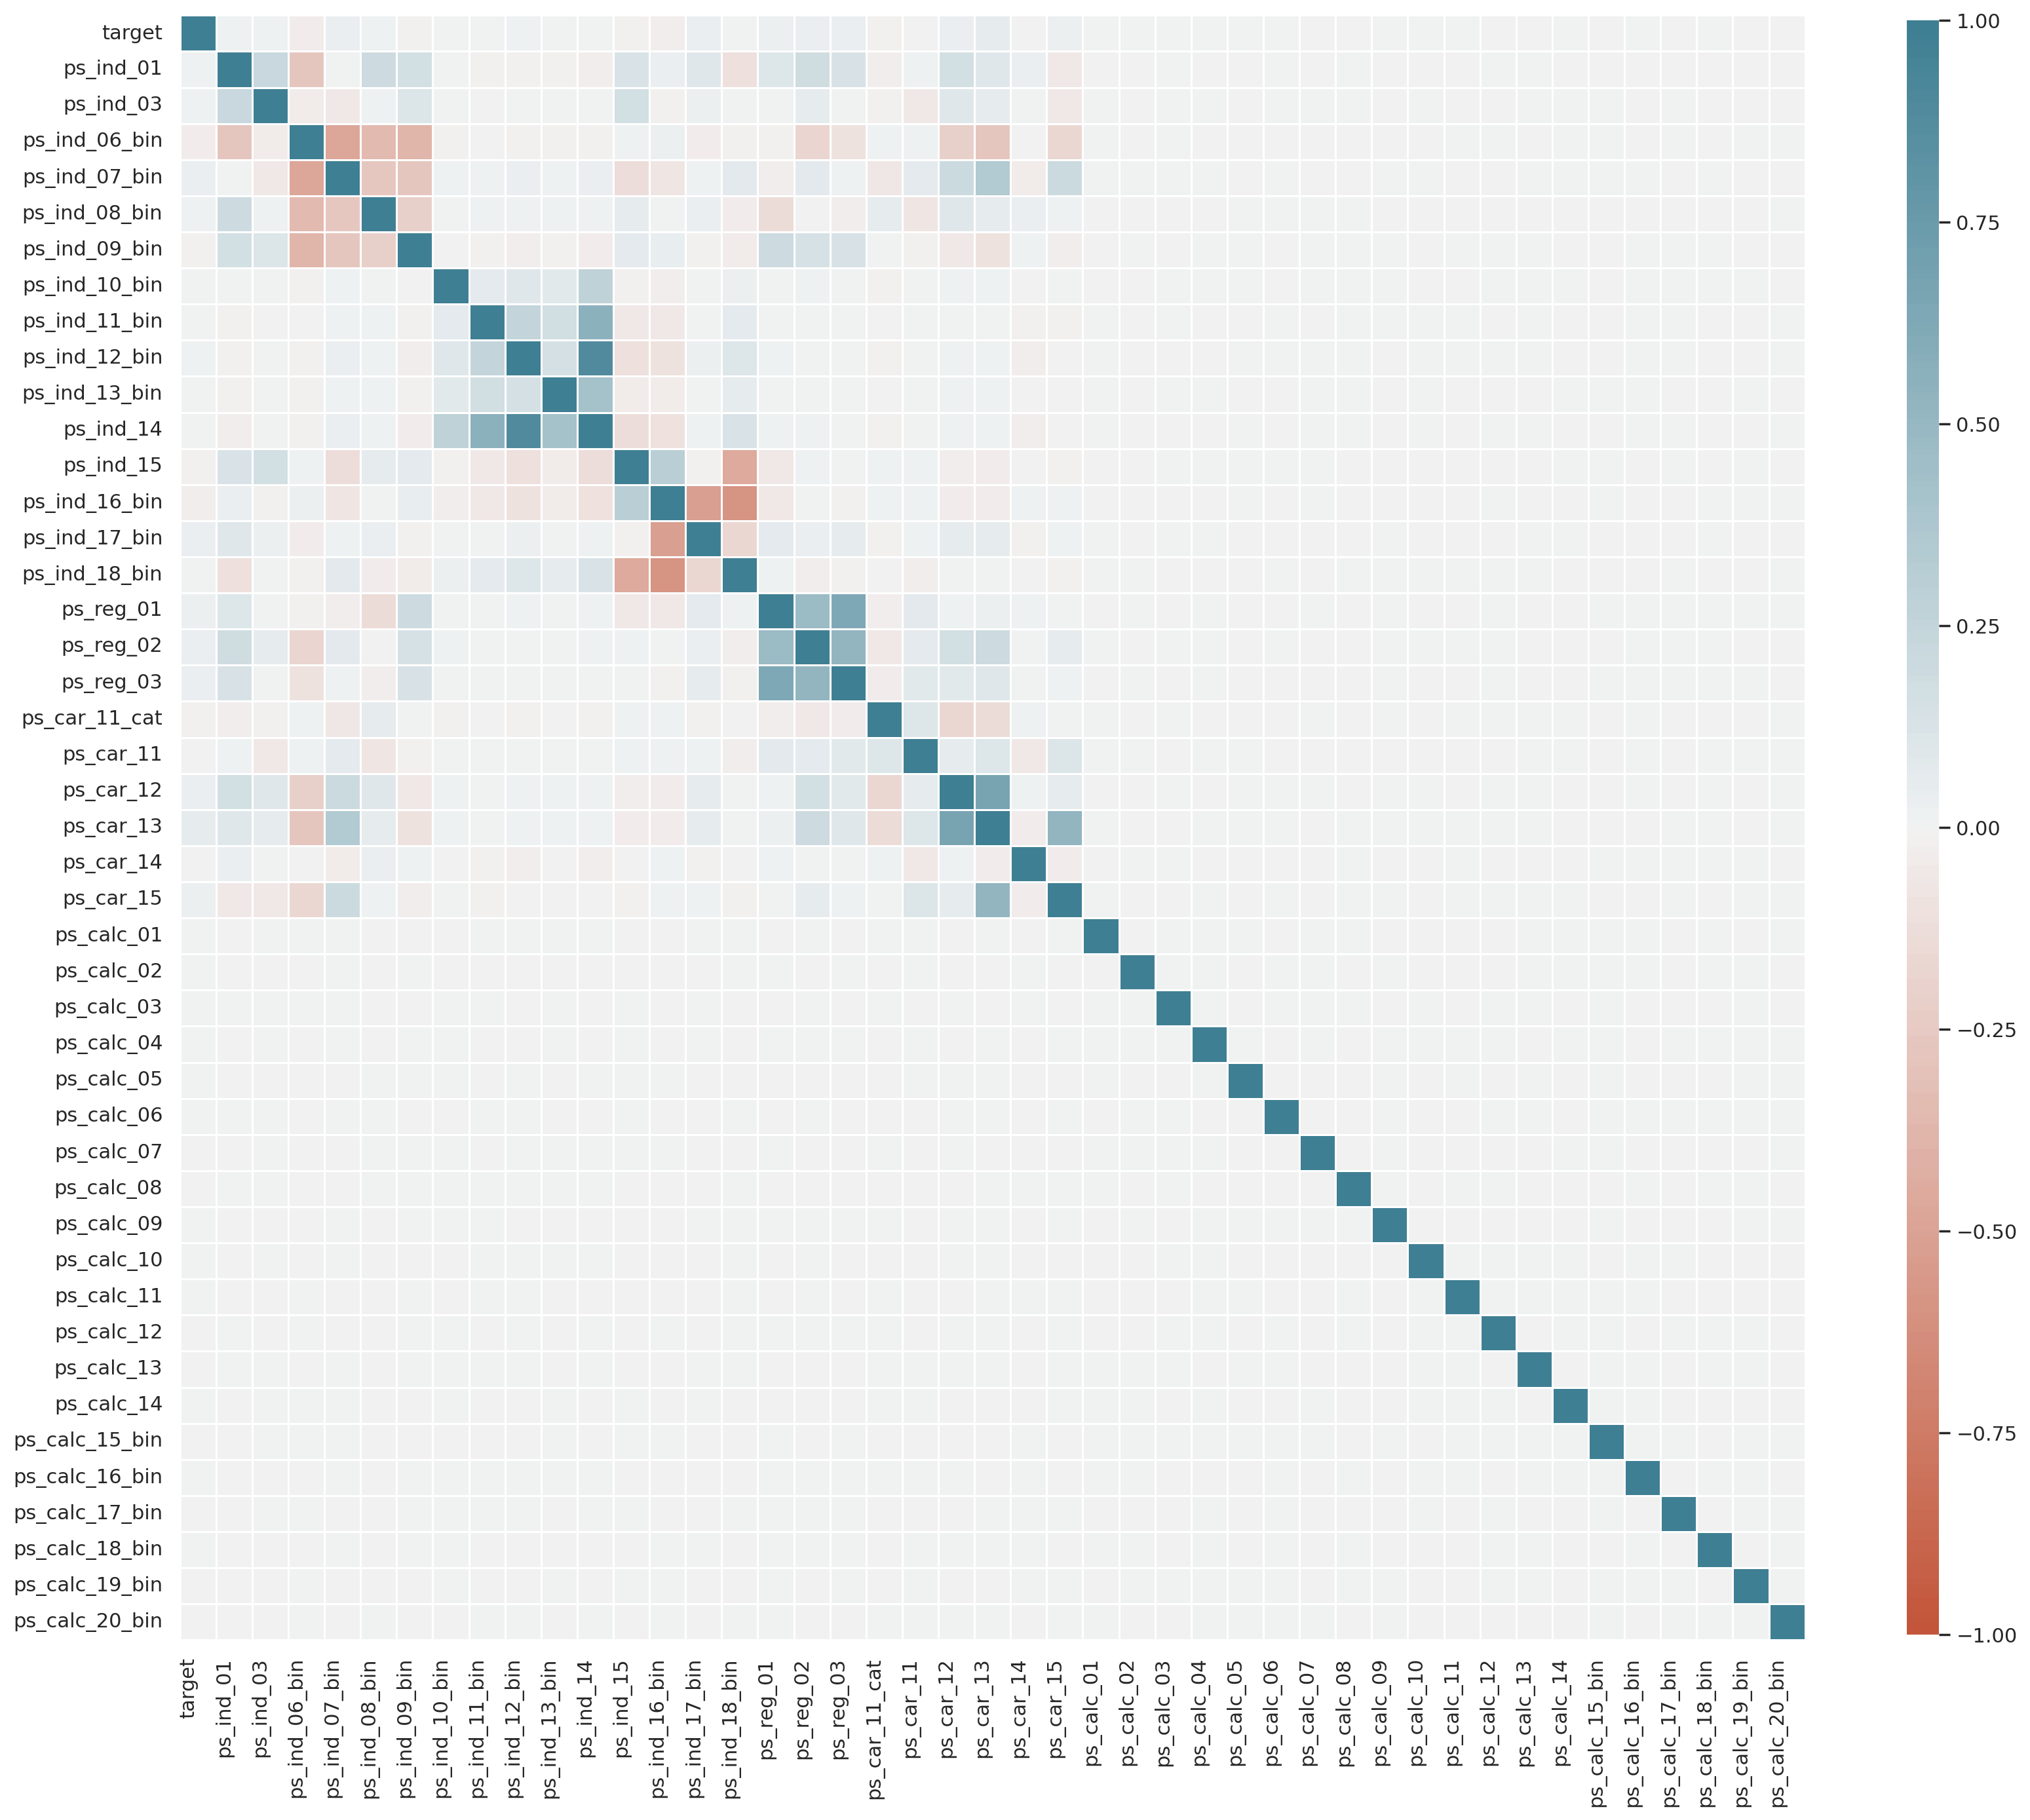

In [102]:
corr = train.corr()

fig, ax = plt.subplots(figsize=(20, 20))
cbar_kws = {'aspect': 50, 'shrink': .8}
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 fmt='.2f',
                 linewidths=.5,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True,
                 cbar_kws=cbar_kws
                 )

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90,
                   horizontalalignment='right'
                   )

plt.show()

In [103]:
print('Dimension of the Dataset prior to dropping Columns:', train.shape)

Dimension of the Dataset prior to dropping Columns: (594455, 54)


In [104]:
# Dropping calc columns
for i in train.columns:
    if 'calc' in i and 'bin' not in i:
        train.drop(i, axis=1, inplace=True)
train.head()

target  ps_ind_01 ps_ind_02_cat  ps_ind_03 ps_ind_04_cat  ps_ind_06_bin  \
0       0          2             2          5             1              0   
1       0          1             1          7             0              0   
2       0          5             4          9             1              0   
3       0          0             1          2             0              1   
4       0          0             2          0             1              1   

   ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  \
0              1              0              0              0              0   
1              0              1              0              0              0   
2              0              1              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  \
0              0              0          0         11              0   
1              0              0          0          3              0   
2              0              0          0         12              1   
3              0              0          0          8              1   
4              0              0          0          9              1   

   ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  \
0              1              0        0.7        0.2   0.718070   
1              0              1        0.8        0.4   0.766078   
2              0              0        0.0        0.0  -1.000000   
3              0              0        0.9        0.2   0.580948   
4              0              0        0.7        0.6   0.840759   

  ps_car_01_cat ps_car_02_cat ps_car_04_cat ps_car_06_cat ps_car_08_cat  \
0            10             1             0             4             0   
1            11             1             0            11             1   
2             7             1             0            14             1   
3             7             1             0            11             1   
4            11             1             0            14             1   

  ps_car_09_cat ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  \
0             0             1              8          2   0.400000   0.883679   
1             2             1             15          3   0.316228   0.618817   
2             2             1             61          1   0.316228   0.641586   
3             3             1              6          1   0.374166   0.542949   
4             2             1             85          3   0.316070   0.565832   

   ps_car_14  ps_car_15  ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  \
0   0.370810   3.605551               0               1               1   
1   0.388716   2.449490               0               1               1   
2   0.347275   3.316625               0               1               1   
3   0.294958   2.000000               0               0               0   
4   0.365103   2.000000               0               0               0   

   ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
0               0               0               1  
1               0               1               0  
2               0               1               0  
3               0               0               0  
4               1               1               0

In [105]:
print('Dimension of the Dataset after dropping Columns with "calc" but not "bin":', train.shape)

Dimension of the Dataset after dropping Columns with "calc" but not "bin": (594455, 40)


We have dropped 14 columns thus avoiding the <b>Curse of Dimensionality</b>.
<br><br>
<b>Heatmap after dropping the columns with calc

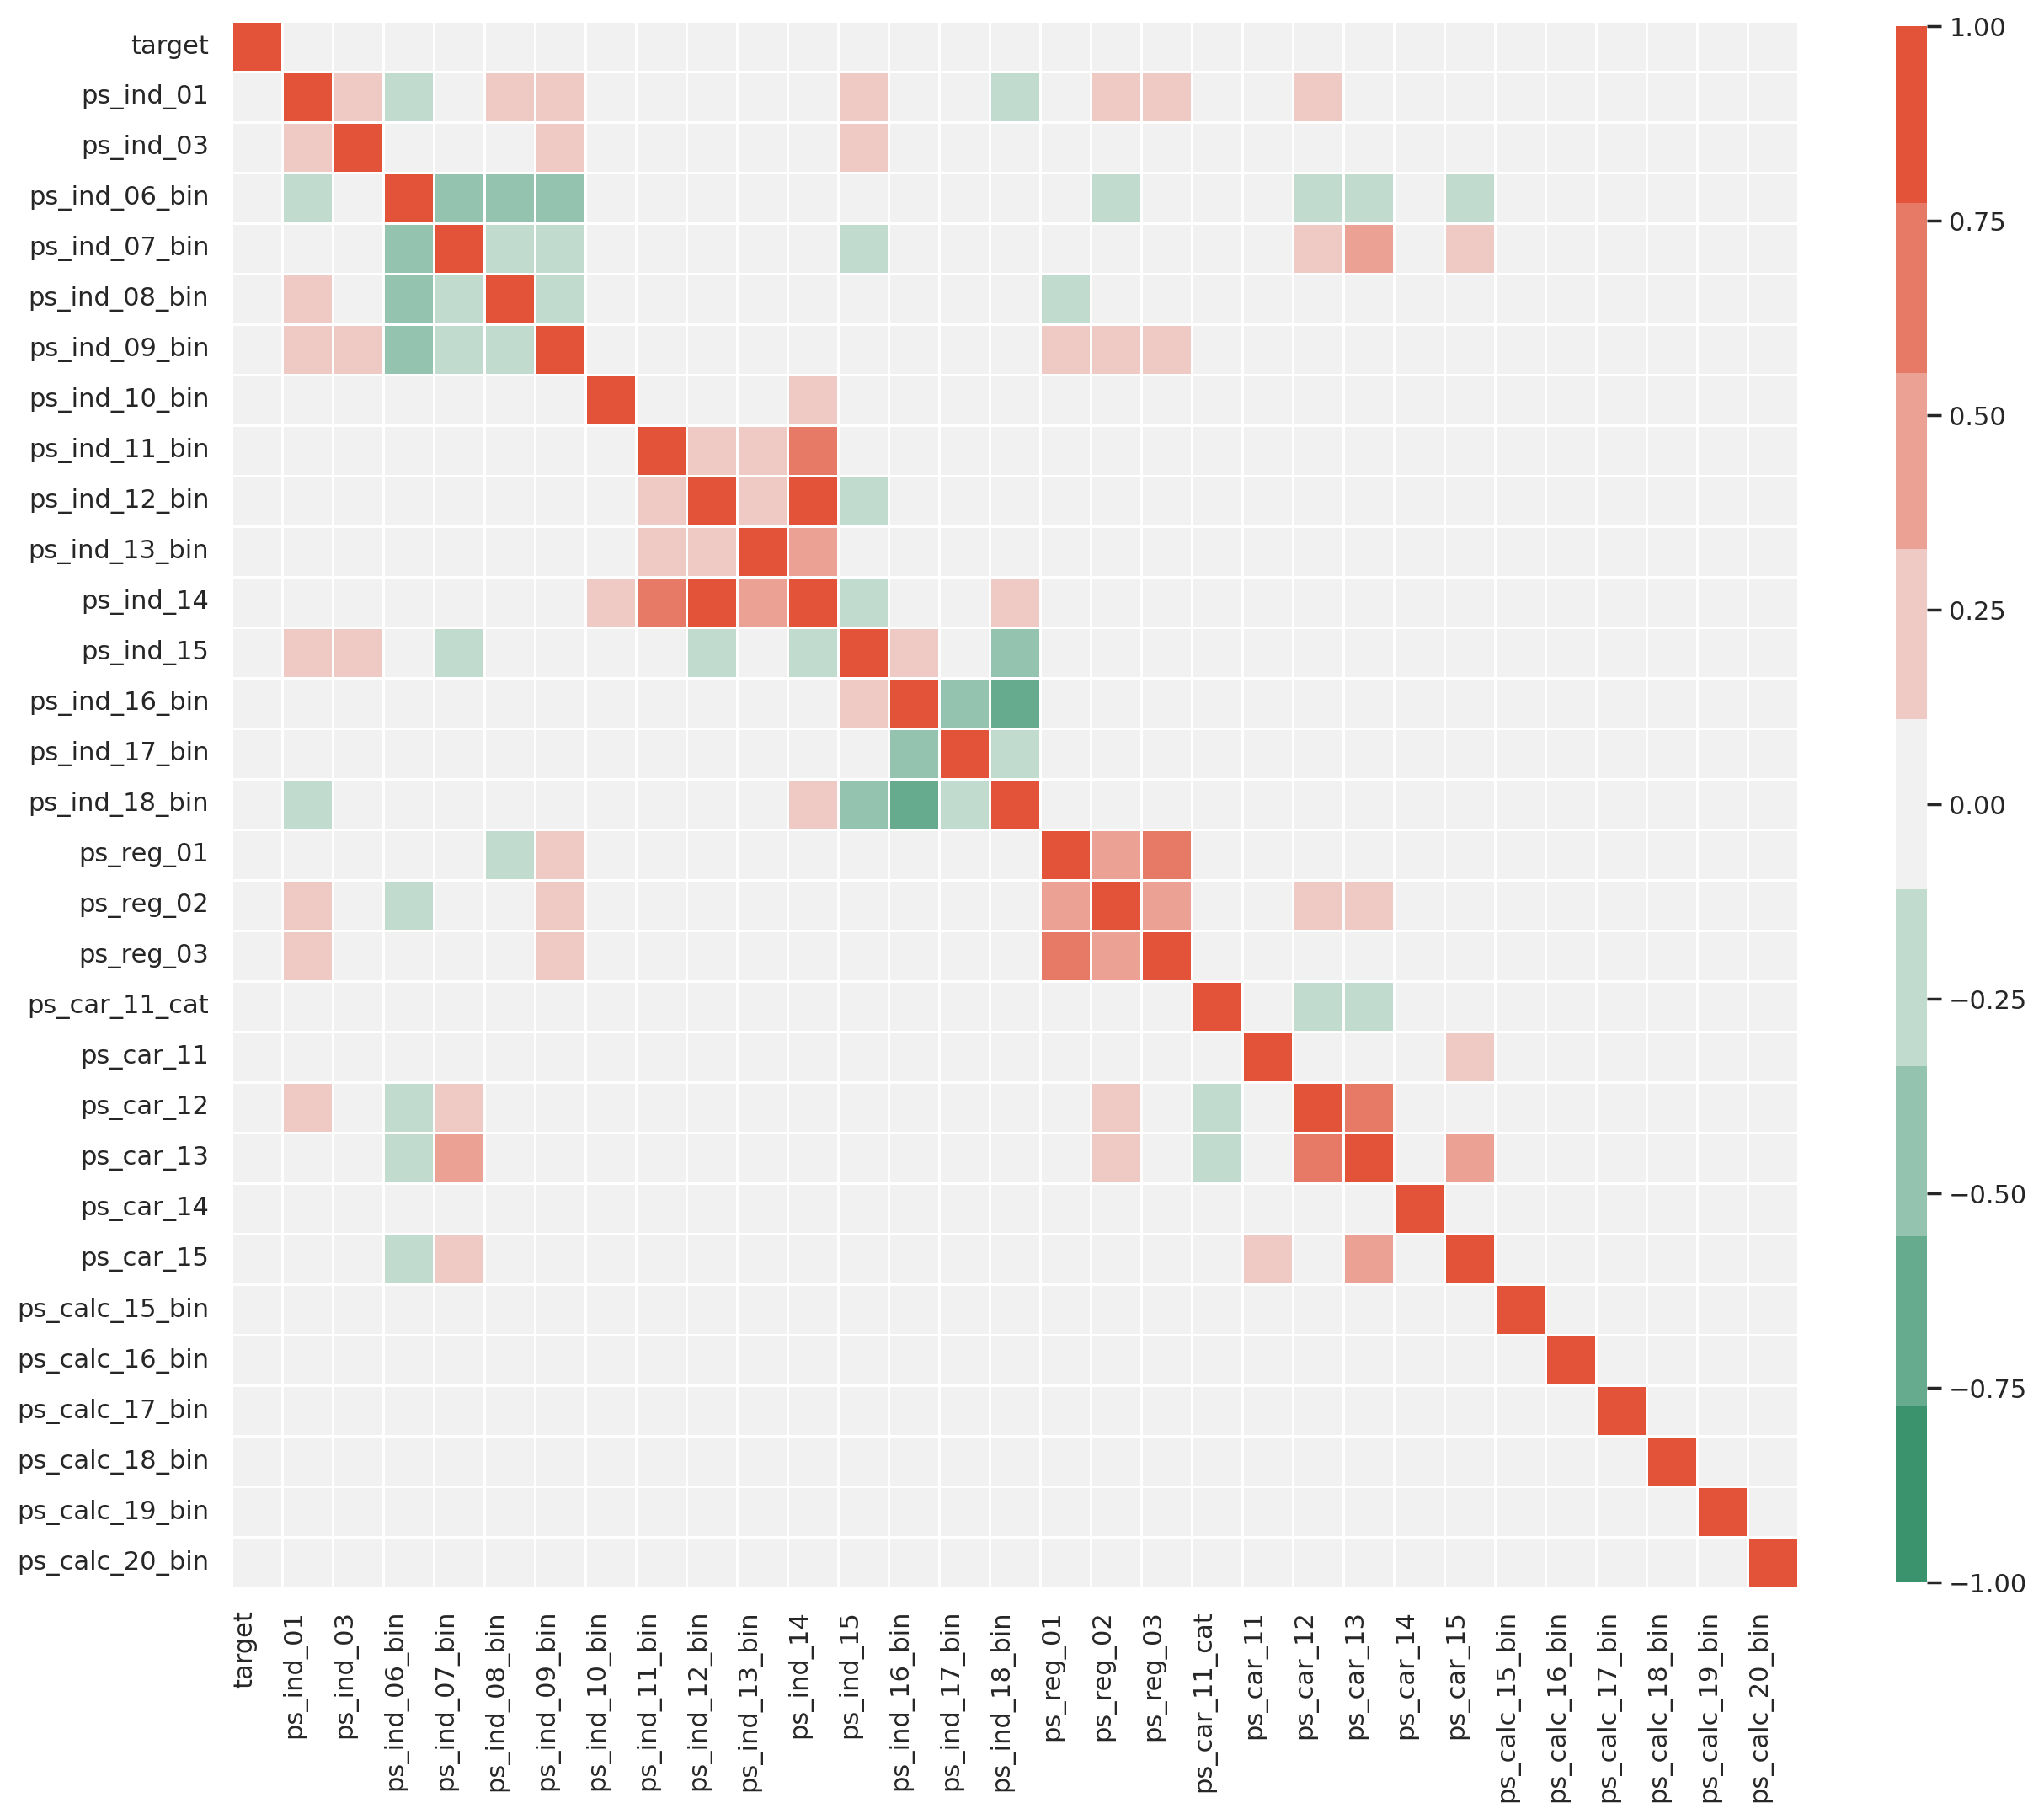

In [106]:
dcorr = train.corr()

fig, ax = plt.subplots(figsize=(15, 15))
cbar_kws = {'aspect': 50, 'shrink': .8}
ax = sns.heatmap(dcorr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 fmt='.2f',
                 linewidths=.5,
                 cmap=sns.diverging_palette(150, 17, s=80, l=55, n=9),
                 square=True,
                 cbar_kws=cbar_kws
                 )

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90,
                   horizontalalignment='right'
                   )

plt.show()

In [107]:
# Converting columns with cat as string
for i in train.columns:
    if 'cat' in i:
        train[i] = train[i].astype(str)
train.head()

target  ps_ind_01 ps_ind_02_cat  ps_ind_03 ps_ind_04_cat  ps_ind_06_bin  \
0       0          2             2          5             1              0   
1       0          1             1          7             0              0   
2       0          5             4          9             1              0   
3       0          0             1          2             0              1   
4       0          0             2          0             1              1   

   ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  \
0              1              0              0              0              0   
1              0              1              0              0              0   
2              0              1              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  \
0              0              0          0         11              0   
1              0              0          0          3              0   
2              0              0          0         12              1   
3              0              0          0          8              1   
4              0              0          0          9              1   

   ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  \
0              1              0        0.7        0.2   0.718070   
1              0              1        0.8        0.4   0.766078   
2              0              0        0.0        0.0  -1.000000   
3              0              0        0.9        0.2   0.580948   
4              0              0        0.7        0.6   0.840759   

  ps_car_01_cat ps_car_02_cat ps_car_04_cat ps_car_06_cat ps_car_08_cat  \
0            10             1             0             4             0   
1            11             1             0            11             1   
2             7             1             0            14             1   
3             7             1             0            11             1   
4            11             1             0            14             1   

  ps_car_09_cat ps_car_10_cat ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  \
0             0             1             8          2   0.400000   0.883679   
1             2             1            15          3   0.316228   0.618817   
2             2             1            61          1   0.316228   0.641586   
3             3             1             6          1   0.374166   0.542949   
4             2             1            85          3   0.316070   0.565832   

   ps_car_14  ps_car_15  ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  \
0   0.370810   3.605551               0               1               1   
1   0.388716   2.449490               0               1               1   
2   0.347275   3.316625               0               1               1   
3   0.294958   2.000000               0               0               0   
4   0.365103   2.000000               0               0               0   

   ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
0               0               0               1  
1               0               1               0  
2               0               1               0  
3               0               0               0  
4               1               1               0

In [109]:
# Dropping "na" values
train.dropna(inplace=True)

<b> Defining X & y before One Hot Encoding to answer Q-11 in Machine Learning Modeling section

In [110]:
X_wo_ohe = train.drop('target', axis=1)
y_wo_ohe = train.target

In [111]:
# Performing Train Test Split
X_wo_ohe_train, X_wo_ohe_test, y_wo_ohe_train, y_wo_ohe_test = train_test_split(
    X_wo_ohe, y_wo_ohe, test_size=0.2, random_state=42)

print(X_wo_ohe_train.shape, X_wo_ohe_test.shape,
      y_wo_ohe_train.shape, y_wo_ohe_test.shape)

(475564, 39) (118891, 39) (475564,) (118891,)


In [112]:
# Standard Scaling the data
std_scaler = StandardScaler()
X_wo_ohe_train = std_scaler.fit_transform(X_wo_ohe_train)
X_wo_ohe_test = std_scaler.transform(X_wo_ohe_test)

### Question 16 - One Hot Encoding for categorical Features

In [113]:
print('Before dummification we have {} variables in train'.format(
    train.shape[1]))

X = pd.get_dummies(train, drop_first=True)

print('\nAfter dummification we have {} variables in train'.format(X.shape[1]))
print(f'\nShape of data after One Hot Encoding: {train.shape}')

Before dummification we have 40 variables in train

After dummification we have 182 variables in train

Shape of data after One Hot Encoding: (594455, 40)


In [114]:
X = train.drop('target', axis=1)
y = train.target

In [115]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(475564, 39) (118891, 39) (475564,) (118891,)


In [117]:
# Assuming df is your DataFrame
column_with_most_unique_values = train.nunique().idxmax()

# Number of unique values in the column with the most unique values
highest_unique_value_count = train.nunique().max()

print(f"The column '{column_with_most_unique_values}' has the highest number of unique values: {highest_unique_value_count}")


The column 'ps_car_13' has the highest number of unique values: 70426


### Question 17 - Standard Scaler

In [58]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [59]:
print('Dimension of the Dataset after performing Standard Scaling:', train.shape)

Dimension of the Dataset after performing Standard Scaling: (594455, 40)


### Question 18 - Summarize the Learnings of ED
<ol>
<li> The dataset provided to us have
<ul>
<li> Columns - 59
<li> Rows - 595212
</ul>
<li> Out of the 59 columns, we have
<ul>
<li> 10 columns with datatype as float64
<li> 49 columns with datatype as int64
</ul>
<li> The target column signifies whether a claim was filed for that policy holder with
<ul>
<li> 0 representing unclaimed insurance count (573518 or 96.4%)
<li> 1 representing claimed insurance count (21694 or 3.6%)
</ul>
<li> Hence we can notice that <b>dataset is heavily imbalanced.</b>
<li> Dataset has
<ul>
<li> 14 Categorical Features
<li> 17 Binary Features
<li> 10 Interval Features
<li> 18 Ordinal Features
</ul>
<li> Some of the coulmns have significant percentage of the data missing. For example
<ul>
<li> <b>ps_car_03_cat</b> have <b>69.09%</b> of the data missing
<li> <b>ps_car_05_cat</b> have <b>44.78%</b> of the data missing
<li> <b>ps_car_07_cat</b> have <b>1.93%</b> of the data missing
<li> <b>ps_ind_05_cat</b> have <b>0.98%</b> of the data missing
<li> Hence, there is no point in imputing the data artificially, rather its best to drop such columns because our dataset is large enough to be trained and tested for Machine Learning models.
</ul>
<li> After plotting the heatmap, we deduced that the correlation between columns with name containing <b>calc and not bin</b> in them is 0. Hence we need to drop all the columns with name <b>calc and not bin</b>. This resulted in dropping of 14 columns.
<li> We also looked highest number of unique values in the categorical column because the higher number of unique values in categorical columns will lead to those many number of individual columns after One Hot Encoding. In this case, our target column <b>ps_car_13 has 70426 unique value</b>.
<li> By dropping columns or performing label encoding on categorical column, we are trying to avoid <b>CURSE OF DIMENSIONALITY</b>.


## Machine Learning Modeling

In [118]:
'''
Sum of '0' and '1' counts in Target column
target = 1 = claimed - majority class
target = 0 = unclaimed - minority class
'''

unique_df = train.target.value_counts().rename_axis(
    'Unique Values').to_frame('Counts')
unique_df

Counts
Unique Values        
0              572833
1               21622

Downsampling the minority class (target=0) using Sklearn Utilities Resample

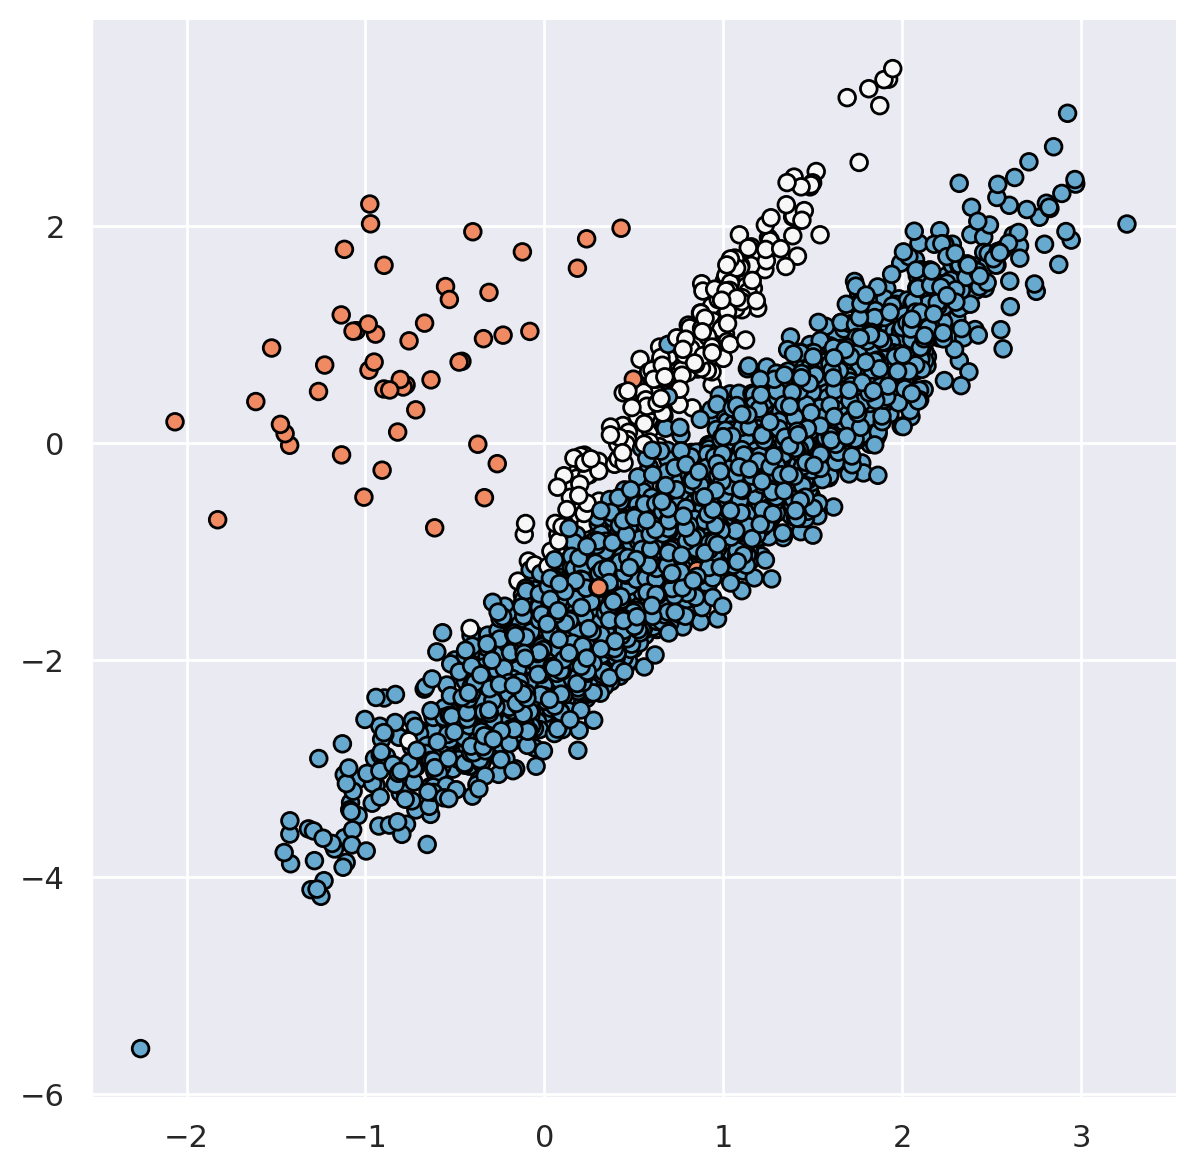

In [119]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v ==
          1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

In [120]:
# Defining Majority and Minority Class
train_majority = train[train.target == 0]
train_minority = train[train.target == 1]

In [121]:
# Downsample majority class
train_majority_downsampled = resample(train_majority,
                                      replace=False,     # sample without replacement
                                      n_samples=20742,   # to match minority class
                                      random_state=123)  # reproducible results

# Combine minority class with downsampled majority class
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

# Display new class counts
train_downsampled.target.value_counts()

1    21622
0    20742
Name: target, dtype: int64

In [122]:
print('- Length of Undersampled data is', len(train_downsampled))

print('\n- Number of no subscription in Undersampled data', len(
    train_downsampled[train_downsampled['target'] == 0]))

print('\n- Number of subscription', len(
    train_downsampled[train_downsampled['target'] == 1]))

print('\n- Proportion of no subscription data in Undersampled data is', len(
    train_downsampled[train_downsampled['target'] == 0])/len(train_downsampled))

print('\n- Proportion of subscription data in Undersampled data is', len(
    train_downsampled[train_downsampled['target'] == 1])/len(train_downsampled))

- Length of Undersampled data is 42364

- Number of no subscription in Undersampled data 20742

- Number of subscription 21622

- Proportion of no subscription data in Undersampled data is 0.4896138230573128

- Proportion of subscription data in Undersampled data is 0.5103861769426872


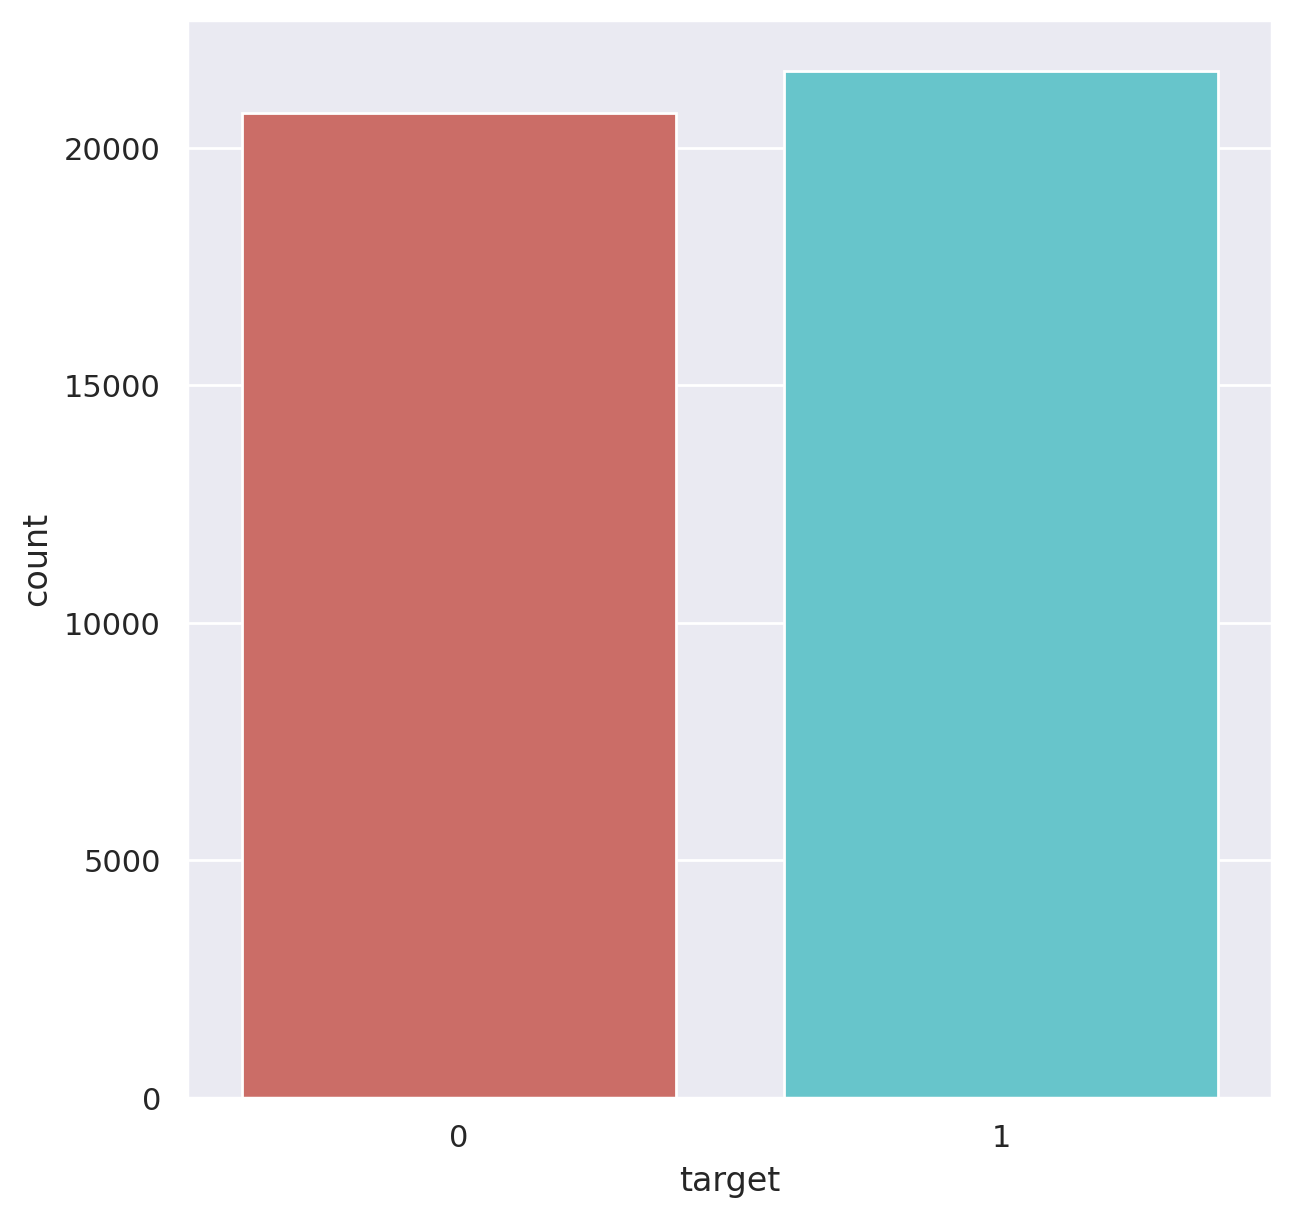

In [123]:
sns.countplot(x='target', data=train_downsampled, palette='hls')
plt.show()

In [124]:
# Separate input features (X) and target variable (y)
X_dsampled = train_downsampled.drop('target', axis=1)
y_dsampled = train_downsampled.target

# Train Test Split for the Downsampled DataFrame
X_dsampled_train, X_dsampled_test, y_dsampled_train, y_dsampled_test = train_test_split(
    X_dsampled, y_dsampled, test_size=0.2, random_state=42)

In [125]:
# Standard Scaling for Downsampled DataFrame
std_scaler = StandardScaler()
X_dsampled_train = std_scaler.fit_transform(X_dsampled_train)
X_dsampled_test = std_scaler.transform(X_dsampled_test)

print(X_dsampled_train.shape, X_dsampled_test.shape,
      y_dsampled_train.shape, y_dsampled_test.shape)

(33891, 39) (8473, 39) (33891,) (8473,)


In [126]:
# This function will create a plot of an Confusion Matrix using a Seaborn heatmap visualization

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''

     # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(
            value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(
        group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2*precision*recall / (precision + recall)
            stats_text = "\n\n\nAccuracy = {:0.3f}\nPrecision = {:0.3f}\nRecall = {:0.3f}\nF1-Score = {:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\n\n- Accuracy = {:0.3f}".format(accuracy)
    else:
        stats_text = ""

     # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


labels = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
categories = ['Zero', 'One']

Initializing the Machine Learning Model

In [127]:
log_reg = LogisticRegression()
lsvc = LinearSVC()
svc = SVC()
xg_boost = XGBClassifier
ada_boost = AdaBoostClassifier
mlp = MLPClassifier

### Question 1 - Simple Logistics Regression
<ul>
<li> The Simple Logistic Regression Model seems to have high accuracy.
<li> Is that what we need at all?
<li> What is the problem with this model?

<b>Performing Simple Logistics Regression on the original dataset

In [128]:
# Using log_reg = LogisticRegression() as the Model Classifier
log_reg.fit(X_train, y_train)
log_reg_pred_od = log_reg.predict(X_test)

print('Target column class on which model is predicting:',
      np.unique(log_reg_pred_od))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
report = classification_report(y_test, log_reg_pred_od, output_dict=True)
df_od = pd.DataFrame(report).transpose()

for i in df_od.columns:
    df_od[i] = round(df_od[i], 2)

df_od

Target column class on which model is predicting: [0]

		The Classification Report
		-------------------------



precision  recall  f1-score    support
0                  0.96    1.00      0.98  114572.00
1                  0.00    0.00      0.00    4319.00
accuracy           0.96    0.96      0.96       0.96
macro avg          0.48    0.50      0.49  118891.00
weighted avg       0.93    0.96      0.95  118891.00

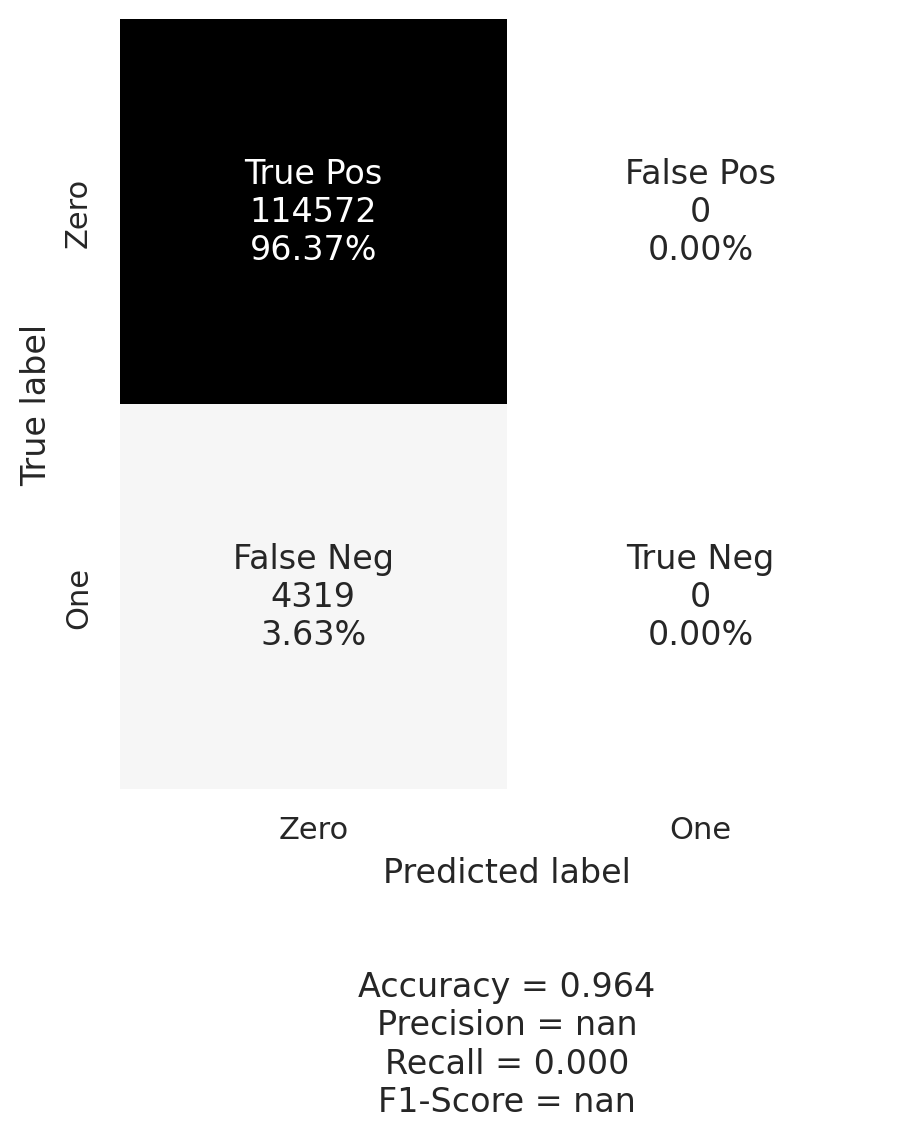

In [129]:
log_reg_od_cfm = confusion_matrix(y_test, log_reg_pred_od)

make_confusion_matrix(log_reg_od_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='gist_yarg')

<b>Inference</b>
<ol>
<li> In Machine Learning, the model accuracy is the one of the most important aspect. But when we have <b>Imbalanced Dataset</b>, the model accuracy does not hold any meaning.
<li> This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.
<li> Standard accuracy no longer reliably measures performance, which makes model training much trickier.
<li> In our dataset
<ul>
<li> Unclaimed Insurance data is 96.4% (target = 0)
<li> Claimed Insurance data is 3.6% (target = 1)
</ul>
<li> If we use just the majority data i.e. Unclaimed Insurance for the model building then the accuracy will be really high (96%) in our case but that does not mean the model is of any use.
<li> This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy.
<li> In order to address this issue, we need to <b>either downsample the majority dataset or upsample the minority dataset</b> (depending on the requirement).
<li> Looking at the output of the Target column class on which model is predicting, we notice that this model is only predicting only on 0, which means its completely ignoring the minority class (1) in favor of the majority class (0).

<b> Performing Simple Logistics Regression on the downsampled dataset

In [131]:
# Using log_reg = LogisticRegression() as the Model Classifier
log_reg.fit(X_dsampled_train, y_dsampled_train)
log_reg_pred_d = log_reg.predict(X_dsampled_test)

print('\nTarget column classes on which model is predicting:',
      np.unique(log_reg_pred_d))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')

report = classification_report(
    y_dsampled_test, log_reg_pred_d, output_dict=True)

df_d = pd.DataFrame(report).transpose()

for i in df_d.columns:
    df_d[i] = round(df_d[i], 2)
df_d


Target column classes on which model is predicting: [0 1]

		The Classification Report
		-------------------------



precision  recall  f1-score  support
0                  0.57    0.57      0.57  4166.00
1                  0.58    0.59      0.59  4307.00
accuracy           0.58    0.58      0.58     0.58
macro avg          0.58    0.58      0.58  8473.00
weighted avg       0.58    0.58      0.58  8473.00

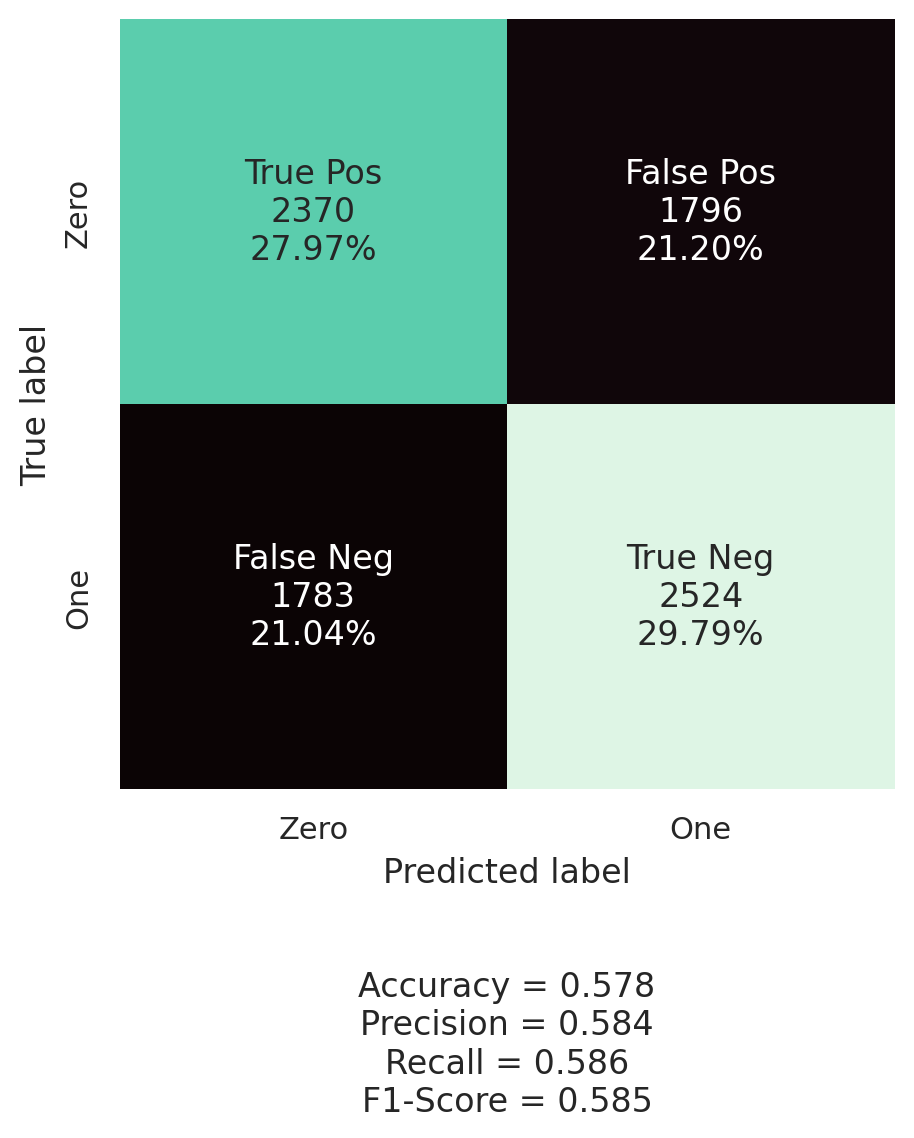

In [132]:
log_reg_d_cfm = confusion_matrix(y_dsampled_test, log_reg_pred_d)

make_confusion_matrix(log_reg_d_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='mako')

### Question 2 - Why do you think f1-score is 0.0
<b> Inference </b><br>
Logistic Regression on Original Dataset (Imbalanced Dataset)
<ul>
<li> <b>Precision = 0</b> means that model has produced only false positives.
<li> <b>Recall = 0</b> means that model has produced only false negatives.
<li> To fully evaluate the effectiveness of a model, we must examine both precision and recall.
<li> Unfortunately, precision and recall are often in tension; i.e., <b>improving precision typically reduces recall and vice versa</b>.
<li> When we ran Logistic Regression on imbalanced dataset, for <b>target = 1</b>
<ul>
<li> the <b>precision</b> and <b>recall</b> got calculated to 0, hence, <b>the F1 score also got calculated to 0</b>
<li> which <b>reflects the worst performance of the model</b>.
</ul>
</ul>
<br>
<hr>

<b> What does F1-score, Accuracy, Precision and Recall parameters mean and how are connected with each other?</b>
<ul>
<li> F1 Score - The <b>F1 score</b> is used to measure a test’s accuracy, and it balances the use of <b>precision</b> and <b>recall</b> to do it.
<li> F1-score combines precision and recall through the harmonic mean (harmonic mean penalizes more extreme values, opposed to the mean, which is naïve in that it weights all errors the same)
<li> The F score can provide a more realistic measure of a test’s performance by using both precision and recall. The F score is often used in information retrieval for measuring search, document classification, and query classification performance.
<li> <b>F1 score</b> is used when the <b>False Negatives</b> and <b>False Positives</b> are crucial.
<li> F1 score is calculated as <br>
F1 = (2 * Precision * Recall) / (Precision + Recall)
</ul>
<hr>

<ul>
<li> <b>Accuracy</b> is one metric for evaluating classification models and is used when the <b>True Positives</b> and <b>True negatives</b> are more important
<li> <b> Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels.</b>
<li> Accuracy is calculated as <br>
Accuracy = Number of Correct Predictions / Total Number of Predictions
</ul>

For binary classification, accuracy can also be calculated in terms of positives and negatives <br>
Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
<hr>

<b>IMBALANCED DATASET -- Why to use F1-score and not Accuracy</b>
- F1 Score is needed when you want to seek a balance between Precision and Recall.
- Accuracy can be largely contributed by a large number of <b>True Negatives</b> which in most business circumstances, we do not focus on much; whereas <b>False Negative</b> and <b>False Positive</b> usually has business costs (tangible & intangible)
- Thus, F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND <b>there is an uneven class distribution (large number of Actual Negatives).</b>

The F1 score should be used when not making mistakes is more important (False Positives and False Negatives being penalized more heavily)

Accuracy should be used when the model’s goal is to optimize performance.

### Question 3 - What is the precision and recall score for the model?
- For <b>Imblanced Dataset</b>
 - <b>Precision = 0</b> means that model has only false positives.
 - <b> Recall = 0</b> means that model has produced only false negatives.
- For <b>Downsampled Dataset</b>
 - <b>Precision = 58%</b>
 - <b>Recall = 59%</b>

### Question 4 - What is the most important inference you can draw from the result?
- After downsampling the majority class (target = 0), the values for minority class (target = 1) are
 - <b>Precision = 58%
 - Recall = 59%
 - F1 Score = 59%
- This means that our model is able to distinguish between the False Negatives and False Positives with 58% accuracy.</b>
- For such an imbalanced dataset, the accuracy is not bad.
- However, we can look at other Machine Learning models to improve the accuracy.

### Question 5 - What is the accuracy score and f1-score for the improved Logistic Regression model?
- After downsampling the majority class (target = 0), the values for minority class (target = 1) are
 - <b>Accuracy = 58%
 - Precision = 58%
 - Recall = 59%
 - F1 Score = 59%</b>

### Question 6 - Why do you think f1-score has improved?
<b>Inference</b>
- After downsampling the majority class (target = 0), we notice that
 - <b>Precision = 58%
 - Recall = 59%
 - Accuracy</b> of the model has gone down to 58% from 95% <i>(this is not necessarily a bad thing, because our model is using both minority and majority class for the prediction)</i>
- F1 score is calculated as <br>
F1 = (2 * Precision * Recall) / (Precision + Recall)
- Since, the <b>Precision</b> and <b>Recall</b> values have improved, it has led to improved <b>F1 score</b> of 59%.

### Question 7 - Linear SVC
- For model LinearSVC play with parameters and see if there is any improvement
 - dual
 - max_iter

<b>GridSearchCV for Hyper-parameter Tuning</b>
- <b>Dual</b> - can assume <b>True or False</b> value. After running the model, I found that it does have any effect on the output.
- <b>Max_Iter</b> - the default value is -1 but I have used values ranging from <b>1 to 11</b>. After running the model, its determined that best value is 9.

In [133]:
tuners = [{'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}]
clf_lsvc = GridSearchCV(estimator=LinearSVC(dual=True),
                        param_grid=tuners,
                        verbose=2,
                        n_jobs=-1,
                        scoring='f1')

clf_lsvc.fit(X_dsampled_train, y_dsampled_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid=[{'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}],
             scoring='f1', verbose=2)

<b>Performing Linear SVC on the downsampled dataset

In [134]:
# Using lsvc = LinearSVC() as model classifier
lsvc = LinearSVC()
lsvc.fit(X_dsampled_train, y_dsampled_train)
lsvc_pred_d = lsvc.predict(X_dsampled_test)

print('\nTarget column classes on which model is predicting:', np.unique(lsvc_pred_d))
print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
report = classification_report(y_dsampled_test, lsvc_pred_d, output_dict=True)
df_lsvc = pd.DataFrame(report).transpose()
for i in df_lsvc.columns:
    df_lsvc[i] = round(df_lsvc[i], 2)

df_lsvc


Target column classes on which model is predicting: [0 1]

		The Classification Report
		-------------------------



precision  recall  f1-score  support
0                  0.57    0.57      0.57  4166.00
1                  0.58    0.58      0.58  4307.00
accuracy           0.58    0.58      0.58     0.58
macro avg          0.58    0.58      0.58  8473.00
weighted avg       0.58    0.58      0.58  8473.00

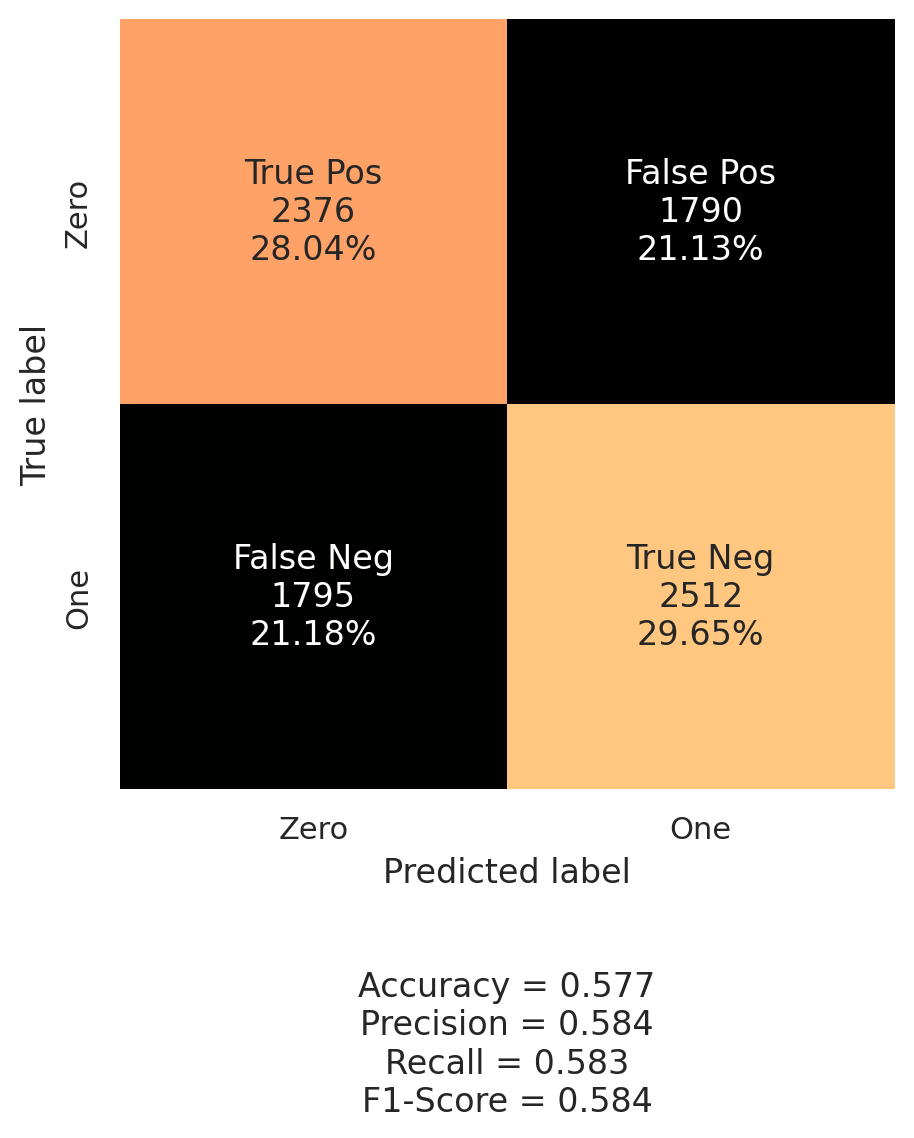

In [135]:
lsvc_d_cfm = confusion_matrix(y_dsampled_test, lsvc_pred_d)

make_confusion_matrix(lsvc_d_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='copper')

In [137]:
print(f'- Best F1 Score: {round(clf_lsvc.best_score_, 2)}')
print(f'- Best Max Iter value:', clf_lsvc.best_estimator_.max_iter)

- Best F1 Score: 0.54
- Best Max Iter value: 9


### Question 8
SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

<b>Using Sklearn Utilities Resample, we will perform</b>

- Upsampling the majority class (target=1)
- Downsampling the minority class (target=0)

In [138]:
'''
For reference
train_majority = train[train.target==0]
train_minority = train[train.target==1]

Question requires to use 100K records in total
100K records will be split even between the majority and minority (50,000 records in each)
'''

# Upsample minority class (records = 50,000)
train_minority_upsampled = resample(train_minority,
                                    replace=True,     # sample with replacement
                                    n_samples=50000,   # as per question 8
                                    random_state=123)  # reproducible results

# Downsample majority class (records = 50,000)
train_majority_downsampled = resample(train_majority,
                                      replace=False,     # sample without replacement
                                      n_samples=50000,   # to match minority class
                                      random_state=123)  # reproducible results

# Combine upsampled minority and downsampled majority class
train_sampled = pd.concat(
    [train_minority_upsampled, train_majority_downsampled])

# Display new class counts
train_sampled.target.value_counts()

1    50000
0    50000
Name: target, dtype: int64

In [139]:
print('- Length of total data is', len(train_sampled))

print('\n- Number of no subscription in evenly split sampled data is', len(
    train_sampled[train_sampled['target'] == 0]))

print('\n- Proportion of no subscription data in Upsampled data is', len(
    train_sampled[train_sampled['target'] == 0])/len(train_sampled))

print('\n- Proportion of subscription data in Downsampled data is', len(
    train_sampled[train_sampled['target'] == 1])/len(train_sampled))

- Length of total data is 100000

- Number of no subscription in evenly split sampled data is 50000

- Proportion of no subscription data in Upsampled data is 0.5

- Proportion of subscription data in Downsampled data is 0.5


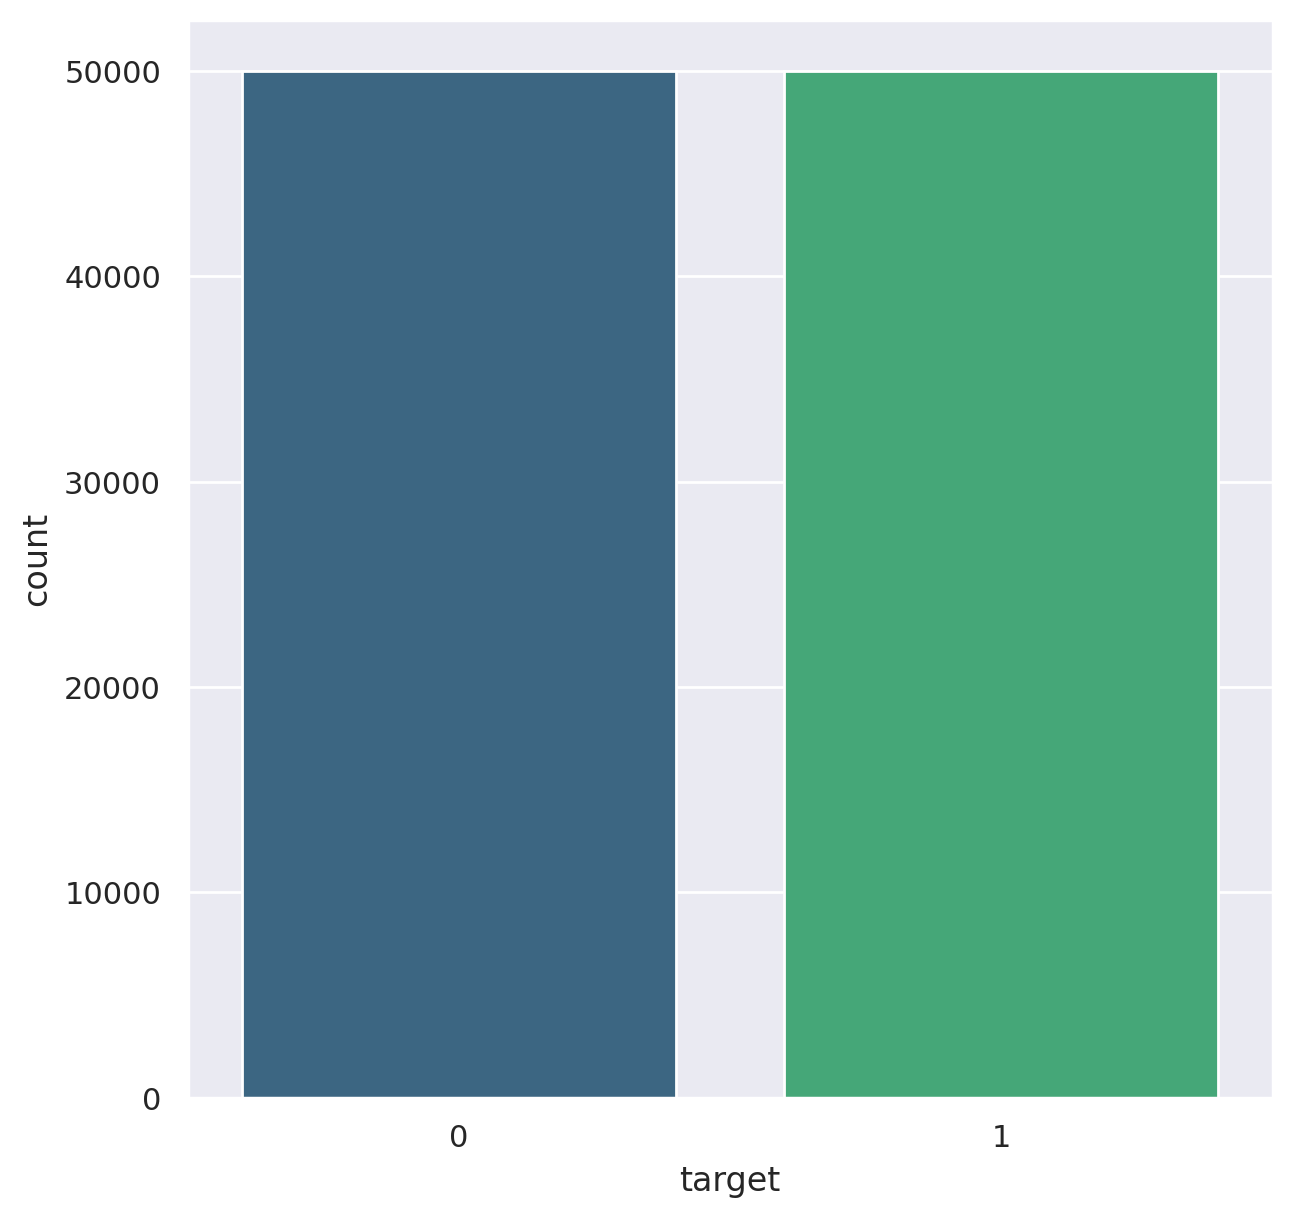

In [140]:
sns.countplot(x='target', data=train_sampled, palette='viridis')
plt.show()

In [141]:
# Separate input features (X) and target variable (y)
X_sampled = train_sampled.drop('target', axis=1)
y_sampled = train_sampled.target

# Train Test Split for the Downsampled DataFrame
X_sampled_train, X_sampled_test, y_sampled_train, y_sampled_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42)

In [142]:
# Standard Scaling for Downsampled DataFrame
std_scaler = StandardScaler()
X_sampled_train = std_scaler.fit_transform(X_sampled_train)
X_sampled_test = std_scaler.transform(X_sampled_test)

print(X_sampled_train.shape, X_sampled_test.shape,
      y_sampled_train.shape, y_sampled_test.shape)

(80000, 39) (20000, 39) (80000,) (20000,)


<b>Performing SVC Model on the sampled dataset of 100K records (50K records in Up and Down sampled datasets)

In [143]:
tuners = [{'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}]
clf_lsvc_s = GridSearchCV(estimator=LinearSVC(dual=True),
                          param_grid=tuners,
                          verbose=2,
                          n_jobs=-1,
                          scoring='f1')

clf_lsvc_s.fit(X_sampled_train, y_sampled_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid=[{'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}],
             scoring='f1', verbose=2)

In [144]:
# Using lsvc = LinearSVC() as model classifier
lsvc = LinearSVC()
lsvc.fit(X_sampled_train, y_sampled_train)
lsvc_pred_ds = lsvc.predict(X_sampled_test)

print('\nTarget column classes on which model is predicting:',
      np.unique(lsvc_pred_ds))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
report = classification_report(y_sampled_test, lsvc_pred_ds, output_dict=True)
df_lsvc_s = pd.DataFrame(report).transpose()
for i in df_lsvc_s.columns:
    df_lsvc_s[i] = round(df_lsvc_s[i], 2)

df_lsvc_s


Target column classes on which model is predicting: [0 1]

		The Classification Report
		-------------------------



precision  recall  f1-score   support
0                  0.57    0.61      0.59   9965.00
1                  0.59    0.54      0.56  10035.00
accuracy           0.58    0.58      0.58      0.58
macro avg          0.58    0.58      0.58  20000.00
weighted avg       0.58    0.58      0.58  20000.00

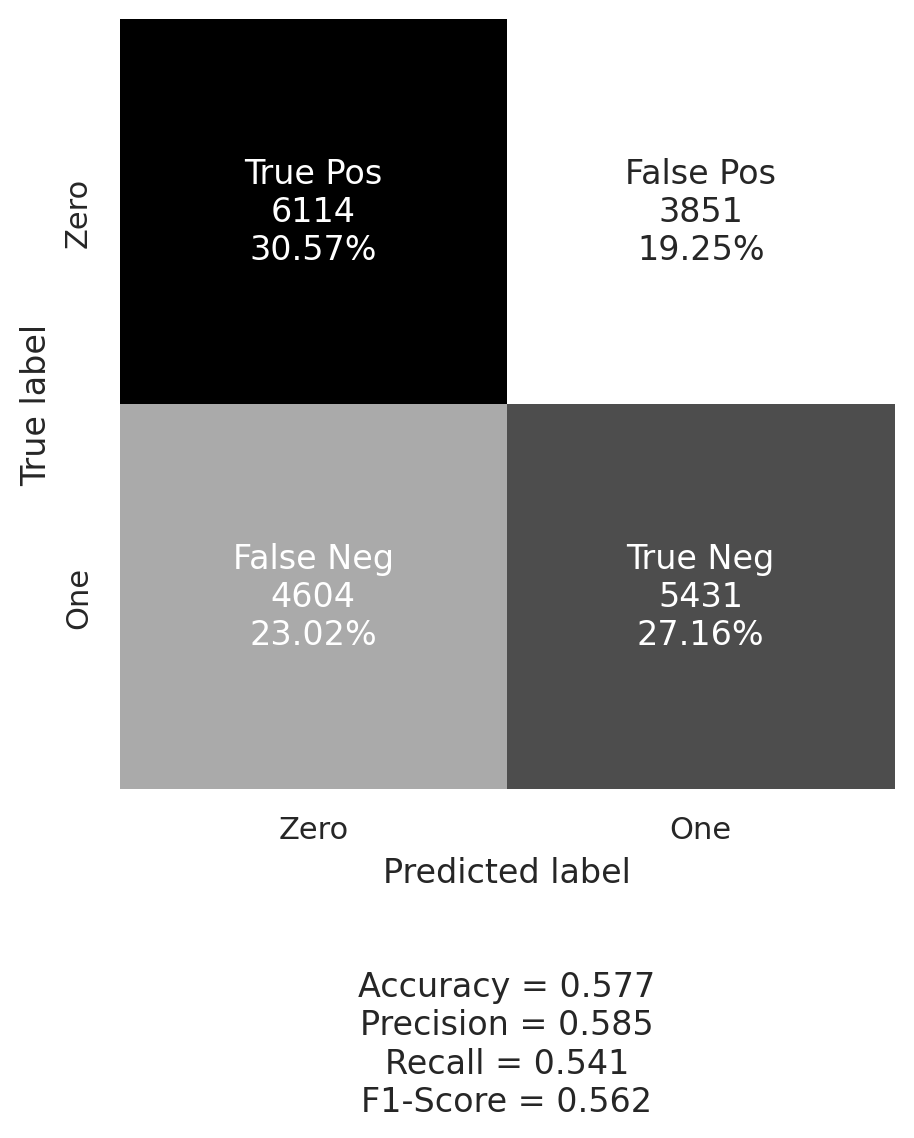

In [145]:
lsvc_ds_cfm = confusion_matrix(y_sampled_test, lsvc_pred_ds)

make_confusion_matrix(lsvc_ds_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='binary')

In [146]:
print(f'- Best F1 Score: {round(clf_lsvc_s.best_score_, 2)}')
print(f'- Best Max Iter value:', clf_lsvc_s.best_estimator_.max_iter)

- Best F1 Score: 0.54
- Best Max Iter value: 5


<b>Inference</b>
<table>
<tr>
<th> Parameters
<th> LR <br>(original dataset)
<th> LR <br>(downsampled dataset)
<th> LSVC Model <br>(with hyper-parameter)
<th> LSVC Model <br>(with sampled data of 100k)
</tr>
<tr>
<td> Accuracy
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.95
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
</tr>
<tr>
<td> Precision
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
</tr>
<tr>
<td> Recall
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.54
</tr>
<tr>
<td> F1-score
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.56
</tr>

- Looing at the above table for comparison between the models
 - Best Accuracy is of Logistic Regression (on imbalanced dataset). But as explained earlier, this accuracy means nothing when dataset is imbalanced.
 - Best Precision is of Linear SVC model (with sampled data of 100k)
 - Best Recall is of Logistic Regression model (on downsampled dataset)
 - Best F1-score is of Logistic Regression model (on downsampled dataset)
- In realistic terms, both <b>Logistic Regression and Linear SVC model on downsampled dataset, have performed best with accuracy of 58%

### Question 9 - XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

In [147]:
# Using xg_boost = XGBClassifier as the model classifier
xg_boost = XGBClassifier(learning_rate=0.05,
                         n_estimators=1000,
                         max_depth=4,
                         min_child_weight=1,
                         gamma=5,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         objective='binary:logistic',
                         nthread=4,
                         scale_pos_weight=5,  # impose greater penalties for errors on the minor class
                         seed=1234)

xg_boost.fit(X_sampled_train, y_sampled_train)
xg_boost_pred_ds = xg_boost.predict(X_sampled_test)

print('\nTarget column classes on which model is predicting:',
      np.unique(xg_boost_pred_ds))
print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')

report = classification_report(
    y_sampled_test, xg_boost_pred_ds, output_dict=True)
df_xgb_s = pd.DataFrame(report).transpose()

for i in df_xgb_s.columns:
    df_xgb_s[i] = round(df_xgb_s[i], 2)

df_xgb_s


Target column classes on which model is predicting: [0 1]

		The Classification Report
		-------------------------



precision  recall  f1-score  support
0                  0.92    0.01      0.01   9965.0
1                  0.50    1.00      0.67  10035.0
accuracy           0.50    0.50      0.50      0.5
macro avg          0.71    0.50      0.34  20000.0
weighted avg       0.71    0.50      0.34  20000.0

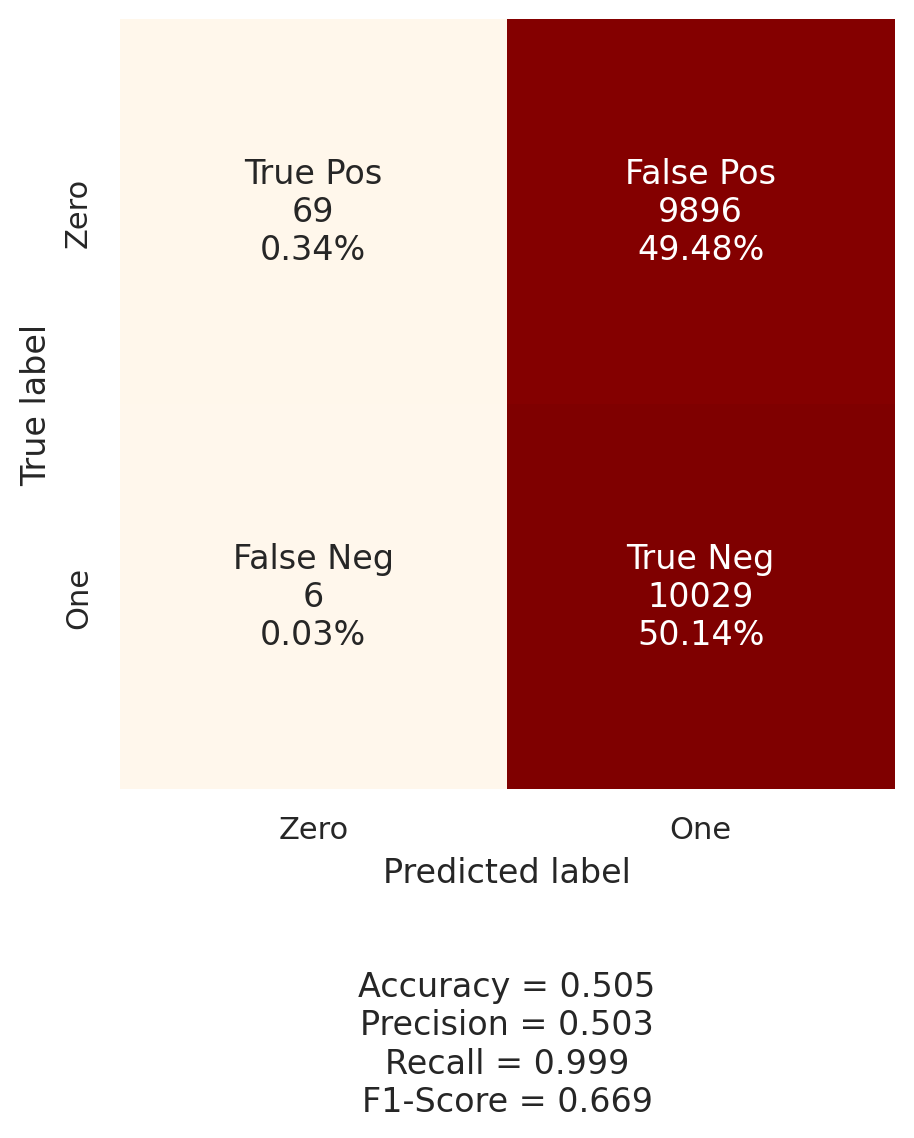

In [148]:
xgb_ds_cfm = confusion_matrix(y_sampled_test, xg_boost_pred_ds)

make_confusion_matrix(xgb_ds_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='OrRd')

<b>Inference - F1-score is very low. What could be the reason?</b>
- The accuracy in terms of the f1-score (53%) is quite low
- The F1-Score is low for XGBoost, even with <b>scale_pos_weight set to 5</b> (i.e. imposing greater penalties for errors on the minor class)
- The recall score for class 1 (claimed insurance) is 99% which means that the model is generating many false positives which reduces the overall accuracy
 - But this has had the effect of increasing recall to 99%, i.e. the model is almost 100% successful at identifying all the customers who will claim the insurance, even if this results in some false positives.
- F1-Score being harmonic mean of Precision and Recall; and Recall being almost 100%, it led to really low F1-Score.

<hr>

<b>Boosting Technique and how XGBoost works</b>
- Boosting is quite a popular technique in machine learning, which aims to improve prediction accuracy by combining many weak models into one strong model.
- XGBoost is a boosting technique takes a more iterative approach and has become renowned for
 - its execution speed
 - model performance
 - is increasingly being relied upon as a default boosting method
- XGBoost trains models
 - in succession
 - each new model being trained to correct the errors made by the previous ones
 - models are added sequentially until no further improvements can be made
 - the advantage of this iterative approach is that the new models being added are focused on correcting the mistakes which were caused by other models

### Question 10 - Increase in number of of features after One Hot Encoding

In [150]:
print('- Before dummification we have {} variables in train'.format(
    train.shape[1]))

X = pd.get_dummies(train, drop_first=True)

print(
    '\n- After dummification we have {} variables in train'.format(X.shape[1]))
print(f'\n- Increase in number of features after One Hot Encoding: 147')

- Before dummification we have 40 variables in train

- After dummification we have 182 variables in train

- Increase in number of features after One Hot Encoding: 147


### Question 11 - Any improvement in scores after One Hot Encoding
In order to answer the above question, I am going to take the following steps
- In the previous questions, I have already ran the ML model on datasets created after OHE
- Below, I will be running ML Models on datasets without OHE
- The results of these models (with and without OHE) will be zipped and printed as a DataFrame for better readability
- Once the DataFrame is created, the inference drawn will be written

<b> Regression models on the Dataset prior to One Hot Encoding

In [151]:
# Using log_reg = LogisticRegression() as the Model Classifier
log_reg.fit(X_wo_ohe_train, y_wo_ohe_train)
log_reg_pred_wo_ohe = log_reg.predict(X_wo_ohe_test)
print('Running Regression Models on the Dataset prior to One Hot Encoding to understand if there are any improvement.\n')
print('Logistic Regression - Target column class on which model is predicting:',
      np.unique(log_reg_pred_wo_ohe))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
logreg_report = classification_report(
    y_wo_ohe_test, log_reg_pred_wo_ohe, output_dict=True)
df_lr = pd.DataFrame(logreg_report).transpose()

for i in df_lr.columns:
    df_lr[i] = round(df_lr[i], 2)

df_lr

Running Regression Models on the Dataset prior to One Hot Encoding to understand if there are any improvement.

Logistic Regression - Target column class on which model is predicting: [0]

		The Classification Report
		-------------------------



precision  recall  f1-score    support
0                  0.96    1.00      0.98  114572.00
1                  0.00    0.00      0.00    4319.00
accuracy           0.96    0.96      0.96       0.96
macro avg          0.48    0.50      0.49  118891.00
weighted avg       0.93    0.96      0.95  118891.00

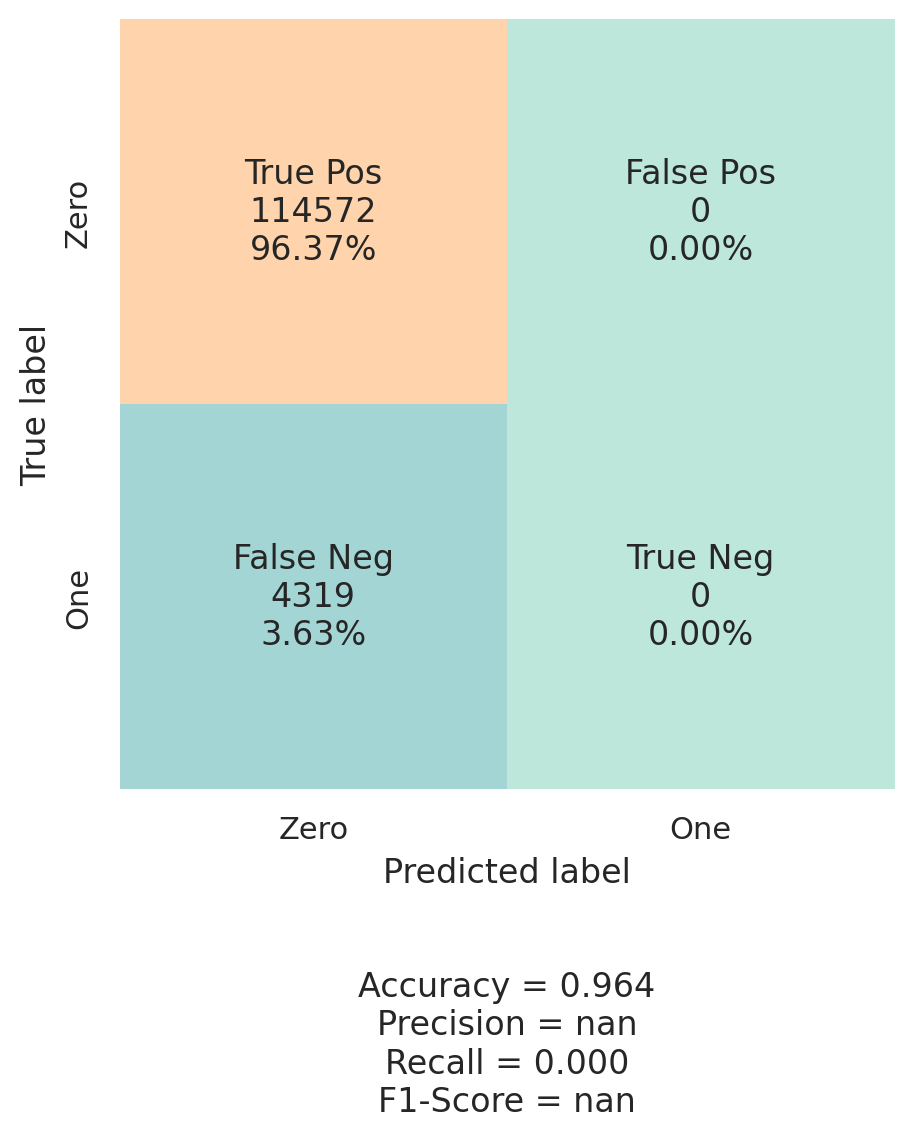

In [152]:
lgrg_wohe_cfm = confusion_matrix(y_wo_ohe_test, log_reg_pred_wo_ohe)

make_confusion_matrix(lgrg_wohe_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='icefire')

In [153]:
# using lsvc = LinearSVC() as the Model Classifier
lsvc.fit(X_wo_ohe_train, y_wo_ohe_train)
lsvc_pred_wo_ohe = log_reg.predict(X_wo_ohe_test)

print('\nLinear SVC - Target column class on which model is predicting:',
      np.unique(lsvc_pred_wo_ohe))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
lsvc_report = classification_report(
    y_wo_ohe_test, lsvc_pred_wo_ohe, output_dict=True)
df_lsvc = pd.DataFrame(lsvc_report).transpose()
for i in df_lsvc.columns:
    df_lsvc[i] = round(df_lsvc[i], 2)

df_lsvc


Linear SVC - Target column class on which model is predicting: [0]

		The Classification Report
		-------------------------



precision  recall  f1-score    support
0                  0.96    1.00      0.98  114572.00
1                  0.00    0.00      0.00    4319.00
accuracy           0.96    0.96      0.96       0.96
macro avg          0.48    0.50      0.49  118891.00
weighted avg       0.93    0.96      0.95  118891.00

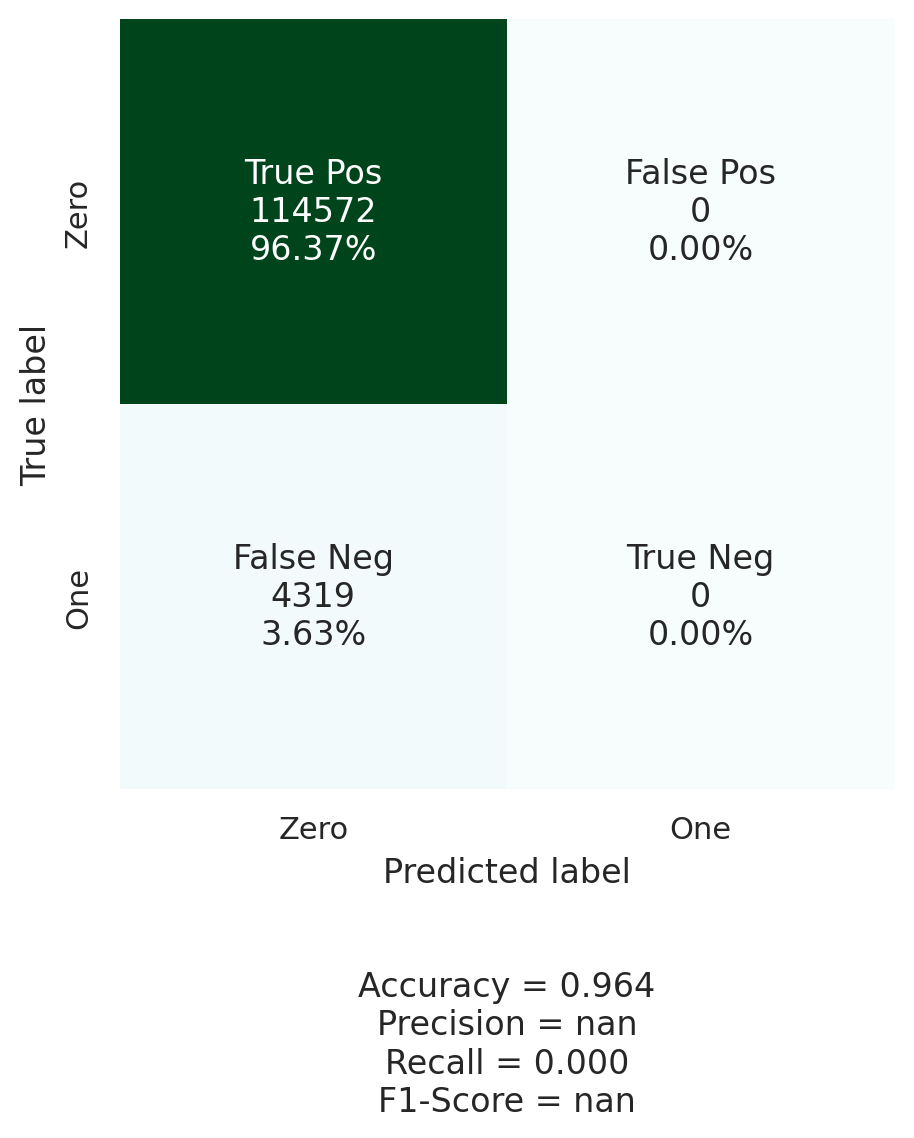

In [154]:
lsvc_wohe_cfm = confusion_matrix(y_wo_ohe_test, lsvc_pred_wo_ohe)

make_confusion_matrix(lsvc_wohe_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='BuGn')

In [155]:
# Precision Scores
log_reg_wohe_ps = round(precision_score(y_wo_ohe_test, log_reg_pred_wo_ohe), 2) # LogReg without OHE
lsvc_wohe_ps = round(precision_score(y_wo_ohe_test, lsvc_pred_wo_ohe), 2) # LSVC without OHE
log_reg_od_ps = round(precision_score(y_test, log_reg_pred_od), 2) # LogReg on Original Dataset
log_reg_d_ps = round(precision_score(y_dsampled_test, log_reg_pred_d), 2) # LogReg on Downsampled Dataset
lsvc_d_ps = round(precision_score(y_dsampled_test, lsvc_pred_d), 2) # Linear SVC on Downsampled Dataset
lsvc_ds_ps = round(precision_score(y_sampled_test, lsvc_pred_ds), 2) # Linear SVC on Sampled Dataset of 100K records
xgboost_ds_ps = round(precision_score(y_sampled_test, xg_boost_pred_ds), 2) # XGBoost on Downsampled Dataset

# Recall Scores
log_reg_wohe_rs = round(recall_score(y_wo_ohe_test, log_reg_pred_wo_ohe), 2) # LogReg without OHE
lsvc_reg_wohe_rs = round(recall_score(y_wo_ohe_test, lsvc_pred_wo_ohe), 2) # LSVC without OHE
log_reg_od_rs = round(recall_score(y_test, log_reg_pred_od), 2) # LogReg on Original Dataset
log_reg_d_rs = round(recall_score(y_dsampled_test, log_reg_pred_d), 2) # LogReg on Downsampled Dataset
lsvc_d_rs = round(recall_score(y_dsampled_test, lsvc_pred_d), 2) # Linear SVC on Downsampled Dataset
lsvc_ds_rs = round(recall_score(y_sampled_test, lsvc_pred_ds), 2) # Linear SVC on Sampled Dataset of 100K records
xgboost_ds_rs = round(recall_score(y_sampled_test, xg_boost_pred_ds), 2) # XGBoost on Downsampled Dataset


# F1-Scores
log_reg_wohe_fs = round(f1_score(y_wo_ohe_test, log_reg_pred_wo_ohe), 2) # LogReg without OHE
lsvc_reg_wohe_fs = round(f1_score(y_wo_ohe_test, lsvc_pred_wo_ohe), 2) # LSVC without OHE
log_reg_od_fs = round(f1_score(y_test, log_reg_pred_od), 2) # LogReg on Original Dataset
log_reg_d_fs = round(f1_score(y_dsampled_test, log_reg_pred_d), 2) # LogReg on Downsampled Dataset
lsvc_d_fs = round(f1_score(y_dsampled_test, lsvc_pred_d), 2) # Linear SVC on Downsampled Dataset
lsvc_ds_fs = round(f1_score(y_sampled_test, lsvc_pred_ds), 2) # Linear SVC on Sampled Dataset of 100K records
xgboost_ds_fs = round(f1_score(y_sampled_test, xg_boost_pred_ds), 2) # XGBoost on Downsampled Dataset


# Accuracy
log_reg_wohe_as = round(accuracy_score(y_wo_ohe_test, log_reg_pred_wo_ohe), 2) # LogReg without OHE
lsvc_reg_wohe_as = round(accuracy_score(y_wo_ohe_test, lsvc_pred_wo_ohe), 2) # LSVC without OHE
log_reg_od_as = round(accuracy_score(y_test, log_reg_pred_od), 2) # LogReg on Original Dataset
log_reg_d_as = round(accuracy_score(y_dsampled_test, log_reg_pred_d), 2) # LogReg on Downsampled Dataset
lsvc_d_as = round(accuracy_score(y_dsampled_test, lsvc_pred_d), 2) # Linear SVC on Downsampled Dataset
lsvc_ds_as = round(accuracy_score(y_sampled_test, lsvc_pred_ds), 2) # Linear SVC on Sampled Dataset of 100K records
xgboost_ds_as = round(accuracy_score(y_sampled_test, xg_boost_pred_ds), 2) # XGBoost on Downsampled Dataset

In [156]:
# Creating Dataframe with scores for every ML models
modelscores_wohe = pd.DataFrame({'Precision': [log_reg_wohe_ps, lsvc_wohe_ps, log_reg_od_ps, log_reg_d_ps, lsvc_d_ps, lsvc_ds_ps, xgboost_ds_ps],
                                 'Recall': [log_reg_wohe_rs, lsvc_reg_wohe_rs, log_reg_od_rs, log_reg_d_rs, lsvc_d_rs, lsvc_ds_rs, xgboost_ds_rs],
                                 'F1-Score': [log_reg_wohe_fs, lsvc_reg_wohe_fs, log_reg_od_fs, log_reg_d_fs, lsvc_d_fs, lsvc_ds_fs, xgboost_ds_fs],
                                 'Accuracy': [log_reg_wohe_as, lsvc_reg_wohe_as, log_reg_od_as, log_reg_d_as, lsvc_d_as, lsvc_ds_as, xgboost_ds_as],
                                 '': ['LogReg (Before OHE)', 'LinearSVC (Before OHE)',
                                      'LogReg (Original Dataset)', 'LogReg (Downsampled Dataset)',
                                      'LinearSVC (Downsampled Dataset)', 'LinearSVC (Hyper-Parametrized + 100K Records)',
                                      'XGboost (Downsampled Dataset)'
                                      ]
                                 })
modelscores_wohe.set_index('', drop=True, inplace=True)

modelscores_wohe

Precision  Recall  F1-Score  \
                                                                             
LogReg (Before OHE)                                 0.00    0.00      0.00   
LinearSVC (Before OHE)                              0.00    0.00      0.00   
LogReg (Original Dataset)                           0.00    0.00      0.00   
LogReg (Downsampled Dataset)                        0.58    0.59      0.59   
LinearSVC (Downsampled Dataset)                     0.58    0.58      0.58   
LinearSVC (Hyper-Parametrized + 100K Records)       0.59    0.54      0.56   
XGboost (Downsampled Dataset)                       0.50    1.00      0.67   

                                               Accuracy  
                                                         
LogReg (Before OHE)                                0.96  
LinearSVC (Before OHE)                             0.96  
LogReg (Original Dataset)                          0.96  
LogReg (Downsampled Dataset)                       0.58  
LinearSVC (Downsampled Dataset)                    0.58  
LinearSVC (Hyper-Parametrized + 100K Records)      0.58  
XGboost (Downsampled Dataset)                      0.50

<b>Inference</b>
- Taking look at the above datafame (which has been created after running Logistic Regression and Linear SVC)
 - Precion
   - 0 for Logistic Regression and Linear SVC before One Hot Encoding or on Original Dataset (after OHE)
   - 59% - After Downsampling or Sampling the datatset to 100K records
 - Recall
   - 0 for Logistic Regression and Linear SVC before One Hot Encoding or on Original Dataset (after OHE)
   - 59% - Best Recall score is for Logistic Regression on the downsampled dataset.
 - F1-Score
   - 0 for Logistic Regression and Linear SVC before One Hot Encoding or on Original Dataset (after OHE)
   - 59% - Best F1-score is for Logistic Regression on the downsampled dataset.
 - Accuracy
   - We see the accuracy is really high for the models running on original dataset (with and without OHE).
   - However, please remember that since our original dataset is heavily imbalanced, the accuracy of the model does not reflect the actual picture.
   - Hence, its best to discard this parameter.
 - So, addressing the original question - <b>Has the score improved after One Hot Encoding?</b> → we can see that <b>F1-score</b> has improved vastly after the One Hot Encoding, hence <b>YES</b>.

- <b>True Positive</b> is an outcome where the model <b>correctly predicts the positive class</b>.
- <b>True Negative</b> is an outcome where the model <b>correctly predicts the negative class</b>.
- <b>False Positive</b> is an outcome where the model <b>incorrectly predicts the positive class</b>.
- <b>False Negative</b> is an outcome where the model <b>incorrectly predicts the negative class</b>.

### Question 12 - If not missing a positive sample is the priority, which model is best so far?
- The question says, <b>If not missing a positive sample</b> ... by which I understand that the ML Model that has returned <b>maximum TRUE POSITIVES</b> is the right answer.
- Looking at the Confusion Matrix printed, we notice that <b>AdaBoost Classifier</b> is the one with least missing postive sample.
- Hence, the answer to this question is <b>AdaBoost Classifier</b>

<i>For the complete comparison of all the ML Models, please read conclusion* at the end of the file.*

### Question 13 - If not marking negative sample as positive is top priority, which model is best so far?
- The question says, <b>If not marking negative sample as positive</b> ... by which I understand that the ML Model that has returned <b>maximum FALSE POSITIVES</b> is the right answer.
- Looking at the Confusion Matrix printed, we notice that <b>XGBoost Classifier</b> is the one with most false sample.
- Hence, the answer to this question is <b>XGBoost Classifier</b>

<i> For the complete comparison of all the ML Models, please read conclusion* at the end of the file.*

### Question 14 - Do you think using AdaBoost can give any significant improvement over XGBoost?

In [157]:
# Using ada_boost = AdaBoostClassifier as the model classifier
ada_boost = AdaBoostClassifier(RandomForestClassifier(), n_estimators=200)
ada_boost.fit(X_sampled_train, y_sampled_train)
ada_boost_pred_ds = ada_boost.predict(X_sampled_test)

print('\nTarget column classes on which model is predicting:',
      np.unique(ada_boost_pred_ds))

print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')

report = classification_report(
    y_sampled_test, ada_boost_pred_ds, output_dict=True)
df_ada_s = pd.DataFrame(report).transpose()
for i in df_ada_s.columns:
    df_ada_s[i] = round(df_ada_s[i], 2)

df_ada_s


Target column classes on which model is predicting: [0 1]

		The Classification Report
		-------------------------



precision  recall  f1-score   support
0                  0.87    0.91      0.89   9965.00
1                  0.91    0.87      0.89  10035.00
accuracy           0.89    0.89      0.89      0.89
macro avg          0.89    0.89      0.89  20000.00
weighted avg       0.89    0.89      0.89  20000.00

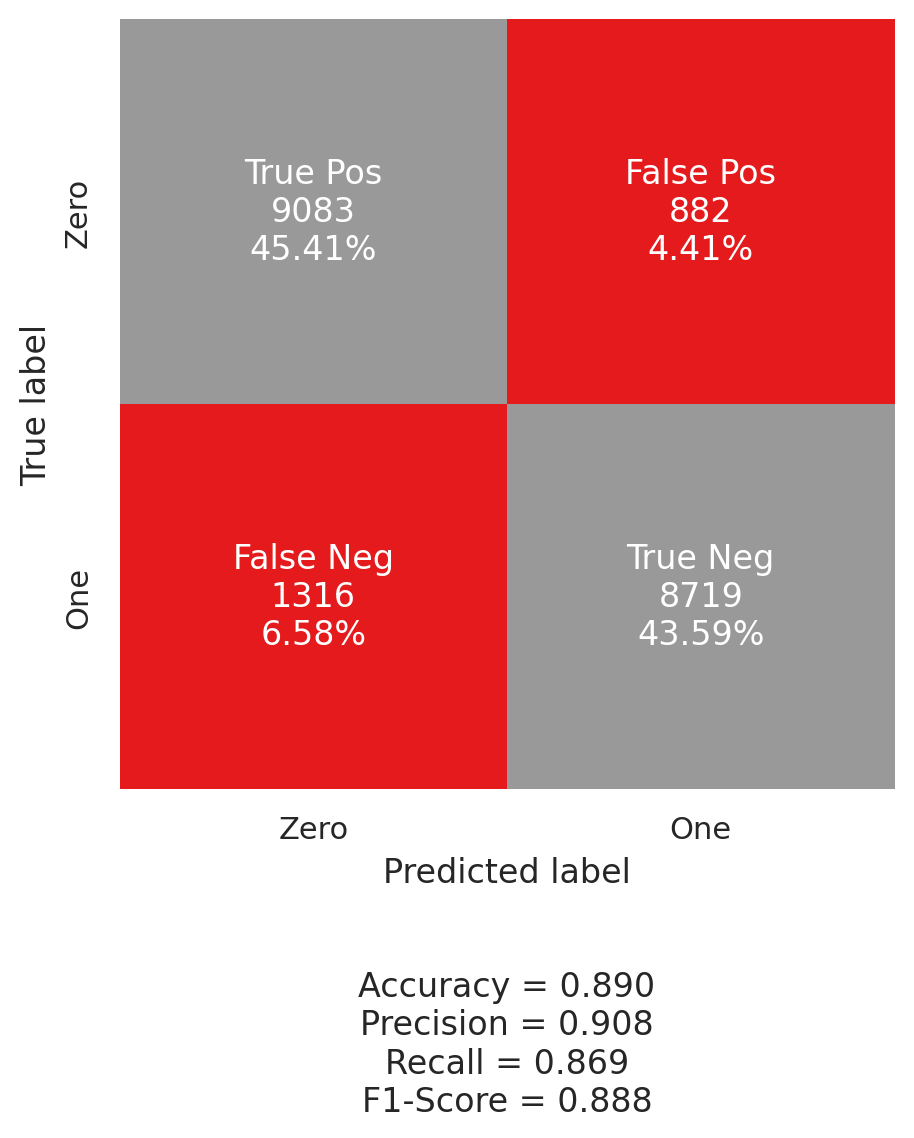

In [158]:
adab_ds_cfm = confusion_matrix(y_sampled_test, ada_boost_pred_ds)

make_confusion_matrix(adab_ds_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='Set1')

<b>Inferences</b>
- Lets take a look at the Classification report of XGBoost and AdaBoost to determine if there is any significant improvement with AdaBoost.

- <b>XGBoost</b>
 - Accuracy = 50%
 - Precision = 50%
 - Recall = 99%
 - F1 Score = 67%

- <b>AdaBoost</b>
 - Accuracy = 89%
 - Precision = 90%
 - Recall = 87%
 - F1 Score = 89%

- The <b>F1-score for the AdaBoost is 89% while for XGBoost its only 67%</b>.
- Hence, <b>YES</b>, there has been significant improvement with <b>AdaBoost</b>

### Question 15 - MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?
- Choosing right number of <b>hidden_layer_sizes</b> - Let's look at few important point that needs to considered
  - A model with zero hidden layers will resolve linearly separable data.
  - If model is linearly separable then a simpler technique will work, but a Perceptron will do the job as well.
  - In our case, data is separable using a MLP, hence we start with one hidden layer. As we run the model, we relaize that increasing the hidden layer in combination with <b>max_iter</b> yields better accuracy.
  - A rule of thumb is for the size of this hidden layer to be somewhere between the input layer size and the output layer size.
  - To calculate the number of hidden nodes we use a general rule of: (Number of inputs + outputs) x 2/3
  - After few trials, I found <b>4 hidden layers</b> to produce best result.

In [159]:
# Using mlp = MLPClassifier as the model classifier
mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50, 50),
                    max_iter=160,
                    activation='relu',
                    solver='adam',
                    random_state=1,
                    verbose=2)

mlp.fit(X_sampled_train, y_sampled_train)
mlp_pred_ds = mlp.predict(X_sampled_test)

print('\nTarget column classes on which model is predicting:', np.unique(mlp_pred_ds))
print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
# print(classification_report(y_dsampled_test, LSVC_pred_d))
report = classification_report(y_sampled_test, mlp_pred_ds, output_dict=True)
df_mlp_s = pd.DataFrame(report).transpose()
for i in df_mlp_s.columns:
    df_mlp_s[i] = round(df_mlp_s[i], 2)

df_mlp_s

Iteration 1, loss = 0.67373351
Iteration 2, loss = 0.66394593
Iteration 3, loss = 0.65531843
Iteration 4, loss = 0.64443922
Iteration 5, loss = 0.63274917
Iteration 6, loss = 0.61644437
Iteration 7, loss = 0.59893556
Iteration 8, loss = 0.58091495
Iteration 9, loss = 0.56166920
Iteration 10, loss = 0.54364988
Iteration 11, loss = 0.52631937
Iteration 12, loss = 0.51118334
Iteration 13, loss = 0.49398956
Iteration 14, loss = 0.48108877
Iteration 15, loss = 0.46564218
Iteration 16, loss = 0.45353833
Iteration 17, loss = 0.44067623
Iteration 18, loss = 0.43008482
Iteration 19, loss = 0.41912654
Iteration 20, loss = 0.40668304
Iteration 21, loss = 0.39640666
Iteration 22, loss = 0.38896144
Iteration 23, loss = 0.37826247
Iteration 24, loss = 0.37047625
Iteration 25, loss = 0.36268516
Iteration 26, loss = 0.35417960
Iteration 27, loss = 0.34788203
Iteration 28, loss = 0.33961430
Iteration 29, loss = 0.33502964
Iteration 30, loss = 0.32751044
Iteration 31, loss = 0.32142067
Iteration 32, los

precision  recall  f1-score   support
0                  0.85    0.65      0.74   9965.00
1                  0.72    0.89      0.79  10035.00
accuracy           0.77    0.77      0.77      0.77
macro avg          0.78    0.77      0.76  20000.00
weighted avg       0.78    0.77      0.76  20000.00

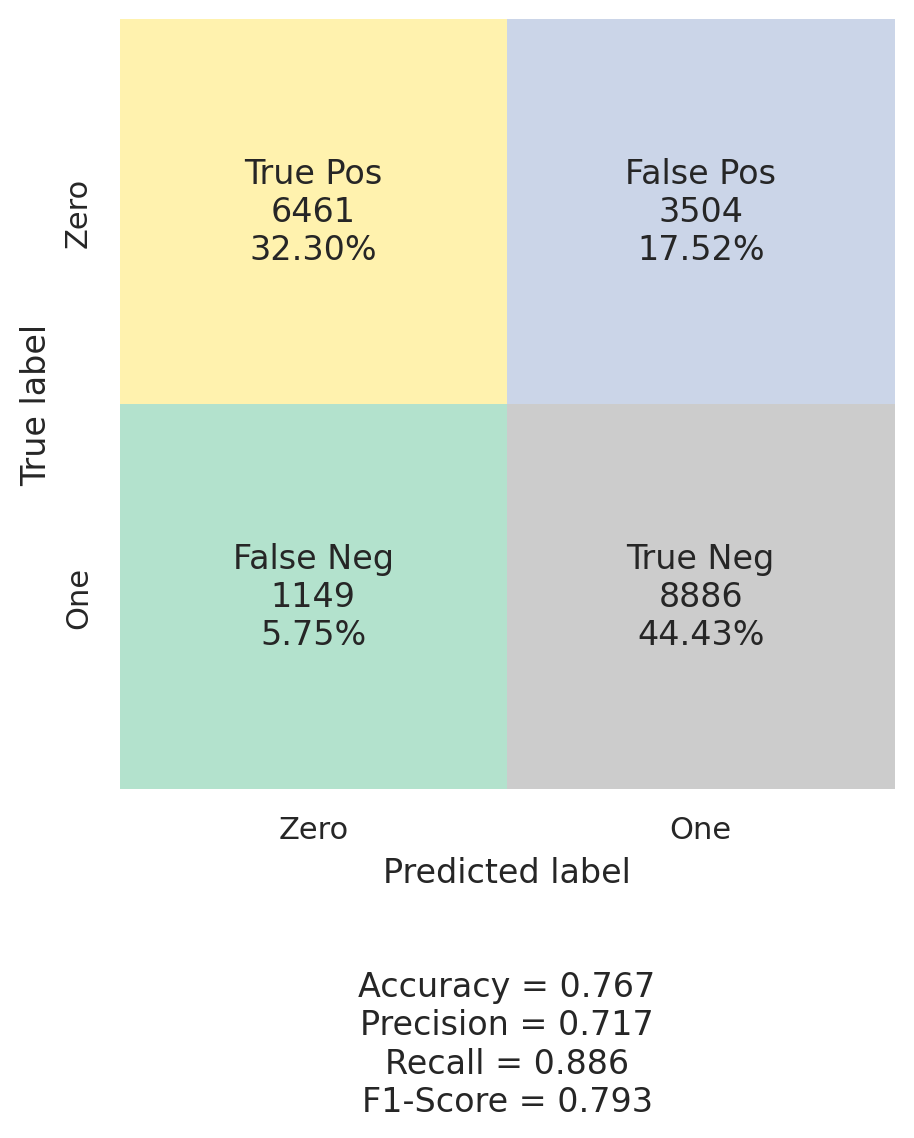

In [160]:
mlp_ds_cfm = confusion_matrix(y_sampled_test, mlp_pred_ds)

make_confusion_matrix(mlp_ds_cfm,
                      group_names=labels,
                      categories=categories,
                      figsize=(5, 5),
                      cbar=False,
                      cmap='Pastel2')

### Question 16 - At what layer size we get the best f1-score?
- I got best F1-Score of 78% at following values
  - 4 Hidden Layers - (150, 100, 50, 50)
  - max_iter = 150 (I ran the classifier with 160 epochs but training loss did not improve with increment of more than 0.000100* after 150 epochs. Hence best number of epochs to use is 150*)
  - Activation as ReLU
  - Solver as Adam

### Creating a DataFrame with all the ML Models for easier comparison

In [161]:
# Precision Scores
adaboost_ds_ps = round(precision_score(y_sampled_test, ada_boost_pred_ds), 2) # AdaBoost on Downsampled Dataset
mlp_ds_ps = round(precision_score(y_sampled_test, mlp_pred_ds), 2) # MLPClassifier on Downsampled Dataset

# Recall Scores
adaboost_ds_rs = round(recall_score(y_sampled_test, ada_boost_pred_ds), 2) # AdaBoost on Downsampled Dataset
mlp_ds_rs = round(recall_score(y_sampled_test, mlp_pred_ds), 2) # MLPClassifier on Downsampled Dataset


# F1-Scores
adaboost_ds_fs = round(f1_score(y_sampled_test, ada_boost_pred_ds), 2) # AdaBoost on Downsampled Dataset
mlp_ds_fs = round(f1_score(y_sampled_test, mlp_pred_ds), 2) # MLPClassifier on Downsampled Dataset


# Accuracy
adaboost_ds_as = round(accuracy_score(y_sampled_test, ada_boost_pred_ds), 2) # AdaBoost on Downsampled Dataset
mlp_ds_as = round(accuracy_score(y_sampled_test, mlp_pred_ds), 2) # MLPClassifier on Downsampled Dataset

In [162]:
# Creating Dataframe with scores for every ML models
modelscores_final = pd.DataFrame({'Precision': [log_reg_wohe_ps, lsvc_wohe_ps, log_reg_od_ps, log_reg_d_ps, lsvc_d_ps, lsvc_ds_ps, xgboost_ds_ps, adaboost_ds_ps, mlp_ds_ps],
                                  'Recall': [log_reg_wohe_rs, lsvc_reg_wohe_rs, log_reg_od_rs, log_reg_d_rs, lsvc_d_rs, lsvc_ds_rs, xgboost_ds_rs, adaboost_ds_rs, mlp_ds_rs],
                                  'F1-Score': [log_reg_wohe_fs, lsvc_reg_wohe_fs, log_reg_od_fs, log_reg_d_fs, lsvc_d_fs, lsvc_ds_fs, xgboost_ds_fs, adaboost_ds_fs, mlp_ds_fs],
                                  'Accuracy': [log_reg_wohe_as, lsvc_reg_wohe_as, log_reg_od_as, log_reg_d_as, lsvc_d_as, lsvc_ds_as, xgboost_ds_as, adaboost_ds_as, mlp_ds_as],
                                  '': ['LogReg (Before OHE)', 'LinearSVC (Before OHE)',
                                       'LogReg (Original Dataset)', 'LogReg (Downsampled Dataset)',
                                       'LinearSVC (Downsampled Dataset)', 'LinearSVC (Hyper-Parametrized + 100K Records)',
                                       'XGboost (Downsampled Dataset)', 'AdaBoost (Downsampled Dataset', 'NN MLP Classifier (Downsampled Dataset)'
                                       ]
                                  })
modelscores_final.set_index('', drop=True, inplace=True)

# Converting the value to percentage and rounding it off to 2 digits
for i in modelscores_final.columns:
    modelscores_final[i] = (modelscores_final[i] *
                            100).round(2).astype(str) + '%'

# highlighting the maximum value in F1-Score Column
modelscores_final.style.highlight_max(subset=['F1-Score'])

## Conclusion:-
### The aim of the project is to build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.
<ol>
<li> In Machine Learning, the model accuracy is the one of the most important aspect. But when we have <b>Imbalanced Dataset</b>, the model accuracy does not hold any meaning.</li>
<li> So, how are we going to determine usefulness of any model in our case

- To fully evaluate the effectiveness of a model, we must examine both precision and recall.
- The F1 score is used to measure a test’s accuracy, and it balances the use of precision and recall to do it.
- Let's understand in detail</li>

<b>IMBALANCED DATASET — Why to use F1-score and not Accuracy?</b> - F1 Score is needed when you want to seek a balance between Precision and Recall. - Accuracy can be largely contributed by a large number of <b>True Negatives</b> which in most business circumstances, we do not focus on much; whereas <b>False Negative</b> and <b>False Positive</b> usually has business costs (tangible & intangible) - Thus, F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND <b>there is an uneven class distribution (large number of Actual Negatives)</b>.

- The F1 score should be used when not making mistakes is more important (False Positives and False Negatives being penalized more heavily)
- Accuracy should be used when the model’s goal is to optimize performance.

<li> We have implemented various Machine Learning model including few boosting methods to predict auto insurance claim.</li>
<li> Looking at the <b>F1-score</b> of the models, we can determine how good a model is</li>
<li> Based on the <b>F1-score of 89%</b> we can see that <b>AdaBoost with RandomForest Classifier</b> is the best model predicting insurance claims for next year.
<li> The boosting method in this instance was set to impose greater penalties on the minor class, which had the result of lowering the overall accuracy as measure by the f1-score since there were more false positives present.
<li> However, the recall score increased vastly as a result — if it is assumed that false positives are more tolerable than false negatives in this situation — then one could argue that the model has performed quite well on this basis.

<table>
<tr>
<th> Parameters
<th> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LR <br>(original dataset)
<th> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LR <br>(downsampled dataset)
<th> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LSVC Model <br>(with hyper-parameter)
<th> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LSVC Model <br>(with sampled data of 100k)
<th> XGBoost
<th> AdaBoost <br> &nbsp;(with RF)
<th> MLPClassifier
</tr>
<tr>
<td> Accuracy
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.95
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;0.50
<td> &nbsp;&nbsp;&nbsp;&nbsp;0.89
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.77
</tr>
<tr>
<td> Precision
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
<td> &nbsp;&nbsp;&nbsp;0.50
<td> &nbsp;&nbsp;&nbsp;&nbsp;0.91
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.72
</tr>
<tr>
<td> Recall
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.54
<td> &nbsp;&nbsp;&nbsp;1.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;0.87
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.89
</tr>
<tr>
<td> F1-score
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.00
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.59
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.58
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.56
<td> &nbsp;&nbsp;&nbsp;0.67
<td> &nbsp;&nbsp;&nbsp;&nbsp;0.89
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.79
</tr>

# Created By Tanveer Dalal ;)